In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , RandomizedSearchCV ,GridSearchCV,learning_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from lazypredict.Supervised import LazyRegressor
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from scipy.stats import randint, uniform
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df=pd.read_csv("ml_dataset.csv")

In [4]:
df

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,...,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,condition
0,885.16,853.76,140.97,15.55,15.55,9.06,69.50,11.13,0.53,-0.86,...,0.42,1.51,3686.67,65.02,0.02,11.00,199.06,2.14,1.16,0.00
1,939.43,948.36,81.32,12.96,12.96,6.27,64.36,5.60,0.00,-0.41,...,0.07,0.30,3006.49,28.82,0.00,9.17,114.63,2.17,1.08,1.00
2,898.19,907.01,84.50,16.31,16.31,5.18,67.45,13.07,0.20,0.35,...,0.51,1.05,2685.88,94.28,0.01,11.53,118.94,2.14,1.18,1.00
3,881.76,893.46,90.37,15.72,15.72,5.75,68.81,11.80,0.13,-0.50,...,0.53,1.78,3434.52,55.33,0.02,11.12,127.32,2.18,1.18,0.00
4,809.63,811.18,62.77,19.21,19.21,3.27,74.57,20.20,0.20,-0.55,...,1.84,3.28,2621.18,29.49,0.03,13.59,87.72,2.22,1.25,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,841.55,844.46,166.24,15.33,15.33,10.84,74.12,6.60,1.73,0.02,...,0.40,2.63,6535.99,37.02,0.03,10.84,234.85,1.97,1.12,0.00
99996,811.18,811.15,53.45,9.56,9.56,5.59,74.29,1.60,0.00,-0.54,...,2.11,6.01,1112.53,15.64,0.06,6.77,75.29,2.21,1.23,2.00
99997,932.24,928.01,70.21,12.50,12.50,5.61,64.72,4.07,0.13,-0.27,...,0.27,1.28,2467.87,77.34,0.01,8.85,98.90,2.19,1.15,0.00
99998,807.97,816.11,59.97,14.38,14.38,4.17,74.69,8.60,0.07,-0.19,...,3.50,9.63,1836.78,9.38,0.11,10.17,84.20,2.16,1.29,1.00


In [5]:
X=df.drop("HR",axis=1)
y=df.HR

In [6]:
X_train, X_test, y_train, y_valid = train_test_split(X, y, test_size=0.24, random_state=42)

In [7]:
X_train

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,pNN25,pNN50,KURT,SKEW,...,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,condition
1030,842.22,843.04,71.93,13.16,13.16,5.47,5.53,0.07,-0.16,0.01,...,1.07,4.14,2572.77,23.13,0.04,9.31,101.29,2.19,1.20,2.00
23907,650.36,625.63,103.62,9.09,9.09,11.40,2.47,0.00,0.04,-0.06,...,2.49,11.82,1860.30,7.46,0.13,6.43,146.40,2.13,1.21,0.00
21364,1073.69,1044.01,82.73,17.45,17.43,5.96,10.67,2.07,-1.48,0.03,...,0.80,6.72,6301.04,13.88,0.07,12.33,116.37,1.96,1.08,0.00
61980,697.34,705.04,73.73,18.31,18.31,4.03,10.07,2.13,1.31,-0.81,...,1.04,3.35,2053.80,3.75,0.03,12.95,103.46,2.08,1.32,0.00
28120,865.66,868.68,68.54,16.90,16.90,4.06,13.00,0.80,1.89,-0.64,...,1.41,2.69,2238.02,36.17,0.03,11.95,96.19,2.03,1.25,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1001.94,948.62,82.73,16.52,16.51,5.96,11.33,1.60,-0.64,0.58,...,0.69,6.88,2803.66,13.52,0.07,11.68,116.37,1.91,1.10,1.00
54886,820.45,820.34,56.04,19.32,19.32,2.90,21.13,0.33,-0.31,-0.12,...,1.71,2.65,2147.00,36.70,0.03,13.67,78.07,2.20,1.29,0.00
76820,789.52,788.81,52.23,11.97,11.97,4.36,2.07,0.13,-0.25,0.10,...,1.16,1.92,1474.43,50.97,0.02,8.47,73.37,2.20,1.14,0.00
860,807.99,811.16,62.64,18.76,18.76,3.34,19.80,0.00,-0.19,-0.17,...,2.37,3.88,2174.67,24.79,0.04,13.27,87.58,2.20,1.29,0.00


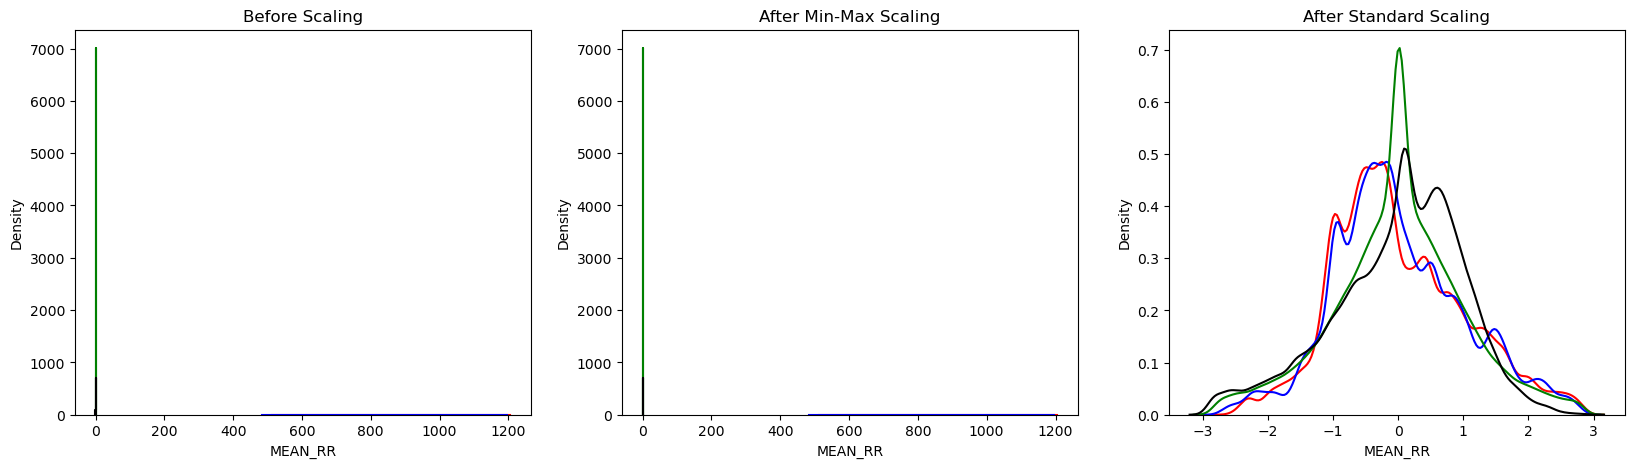

In [8]:
#this plot to show best scaler should we chose
scaler = StandardScaler()
standard_df = scaler.fit_transform(X[['MEAN_RR','MEDIAN_RR','MEAN_REL_RR','MEDIAN_REL_RR']])
standard_df = pd.DataFrame(standard_df, columns =['MEAN_RR','MEDIAN_RR','MEAN_REL_RR','MEDIAN_REL_RR'])
 
scaler0 = MinMaxScaler()
minmax_df = scaler0.fit_transform(X[['MEAN_RR','MEDIAN_RR','MEAN_REL_RR','MEDIAN_REL_RR']])
minmax_df = pd.DataFrame(df, columns =['MEAN_RR','MEDIAN_RR','MEAN_REL_RR','MEDIAN_REL_RR'])
 
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize =(20, 5))
sns.kdeplot(X['MEAN_RR'],ax=ax1,color='r')
sns.kdeplot(X['MEDIAN_RR'],ax=ax1,color='blue')
sns.kdeplot(X['MEAN_REL_RR'],ax=ax1,color='g')
sns.kdeplot(X['MEDIAN_REL_RR'],ax=ax1,color='black')

ax1.set_title('Before Scaling') 
sns.kdeplot(minmax_df['MEAN_RR'], ax = ax2, color ='red')
sns.kdeplot(minmax_df['MEDIAN_RR'], ax = ax2, color ='blue')
sns.kdeplot(minmax_df['MEAN_REL_RR'], ax = ax2, color ='g')
sns.kdeplot(minmax_df['MEDIAN_REL_RR'], ax = ax2, color ='black')

ax2.set_title('After Min-Max Scaling')
 
sns.kdeplot(standard_df['MEAN_RR'], ax = ax3, color ='red')
sns.kdeplot(standard_df['MEDIAN_RR'], ax = ax3, color ='blue')
sns.kdeplot(standard_df['MEAN_REL_RR'], ax = ax3, color ='g')
sns.kdeplot(standard_df['MEDIAN_REL_RR'], ax = ax3, color ='black')

ax3.set_title('After Standard Scaling')

plt.show()

after this figure i will use standard scaler

In [9]:
X_train.shape,y_train.shape

((76000, 34), (76000,))

In [10]:
# Create a pipeline with StandardScaler
pipeline = Pipeline([
    ('standard_scaler', StandardScaler())])

# Fit and transform the dataset using the pipeline
scaled_data1 = pipeline.fit_transform(X_train)
scaled_data2 = pipeline.transform(X_test)

In [11]:
X_train=pd.DataFrame(scaled_data1,columns=X_train.columns)
X_valid=pd.DataFrame(scaled_data2,columns=X_test.columns)

### PCA

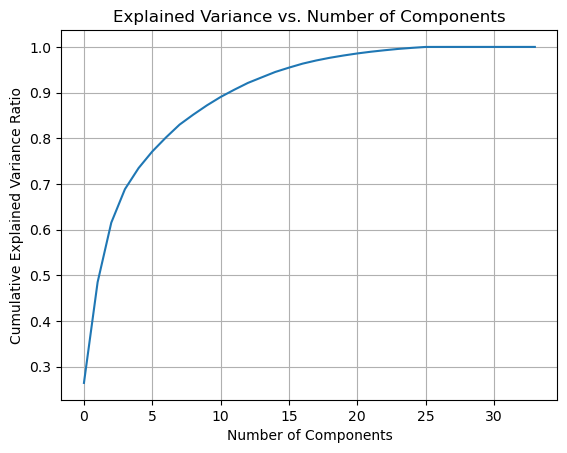

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Fit PCA and get explained variance ratios
pca = PCA()
pca.fit(X_train)
explained_variances = pca.explained_variance_ratio_

# Plot cumulative explained variance ratio
cumulative_variance = np.cumsum(explained_variances)
plt.plot(cumulative_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Explained Variance vs. Number of Components")
plt.grid()
plt.show()

i will chose 22 n_components

In [13]:
# Fit PCA
pca = PCA(n_components=22)
pca.fit(X_train)

# Transform the data
X_train_pca = pca.transform(X_train)
X_valid_pca = pca.transform(X_valid)


### LinearRegression using PCA-transformed data

In [13]:
regressor = LinearRegression()
regressor.fit(X_train_pca, y_train)

# Predict on validation data
y_pred = regressor.predict(X_valid_pca)

# Calculate Mean Squared Error
mse = mean_squared_error(y_valid, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Root Squared Error
mse = mean_squared_error(y_valid, y_pred)
print("Mean Root Squared Error:", np.sqrt(mse))

# You can also calculate R-squared
r_squared = regressor.r2_score(y_pred, y_valid)
print("R-squared:", r_squared)


Mean Squared Error: 12.047351514873563
Mean Root Squared Error: 3.470929488605835
R-squared: 0.867824377855668


In [14]:
# Cross-Validation
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(regressor, X_train_pca, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -np.mean(cross_val_scores)
print("Mean Cross-Validation MSE:", mean_cv_mse)


Mean Cross-Validation MSE: 11.849965846588345


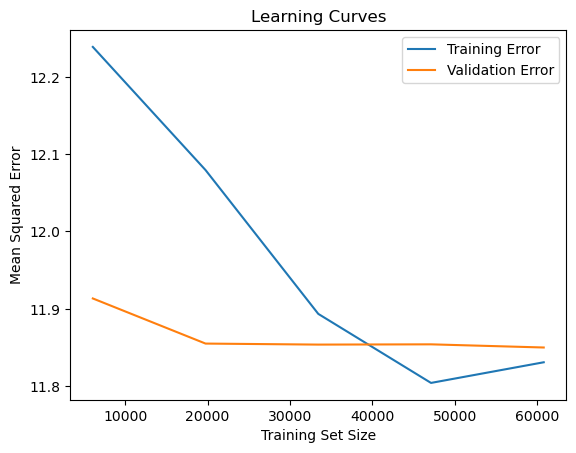

In [15]:
# Learning Curves
train_sizes, train_scores, valid_scores = learning_curve(
    regressor, X_train_pca, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, scoring='neg_mean_squared_error')

plt.figure()
plt.plot(train_sizes, -np.mean(train_scores, axis=1), label='Training Error')
plt.plot(train_sizes, -np.mean(valid_scores, axis=1), label='Validation Error')
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves")
plt.legend()
plt.show()

degree 1
Mean Squared Error: 12.047351514873563
Mean Root Squared Error: 3.470929488605835
R-squared: 0.867824377855668


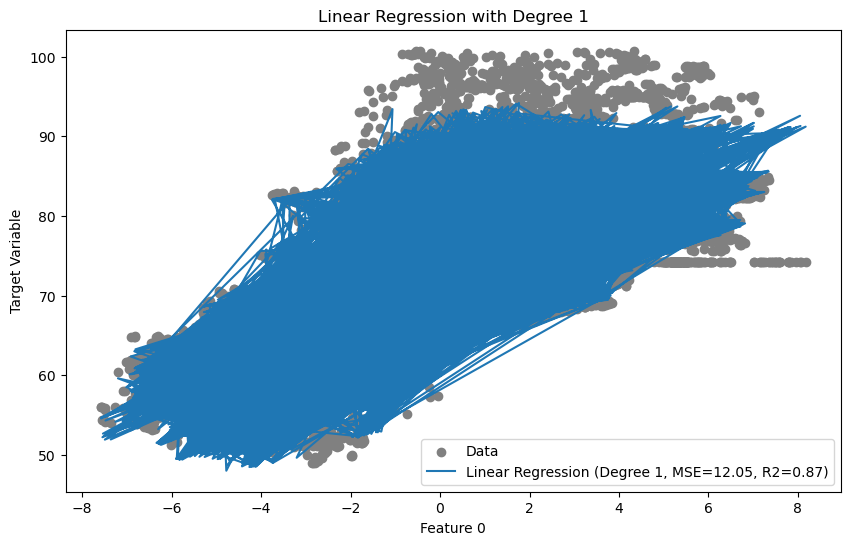

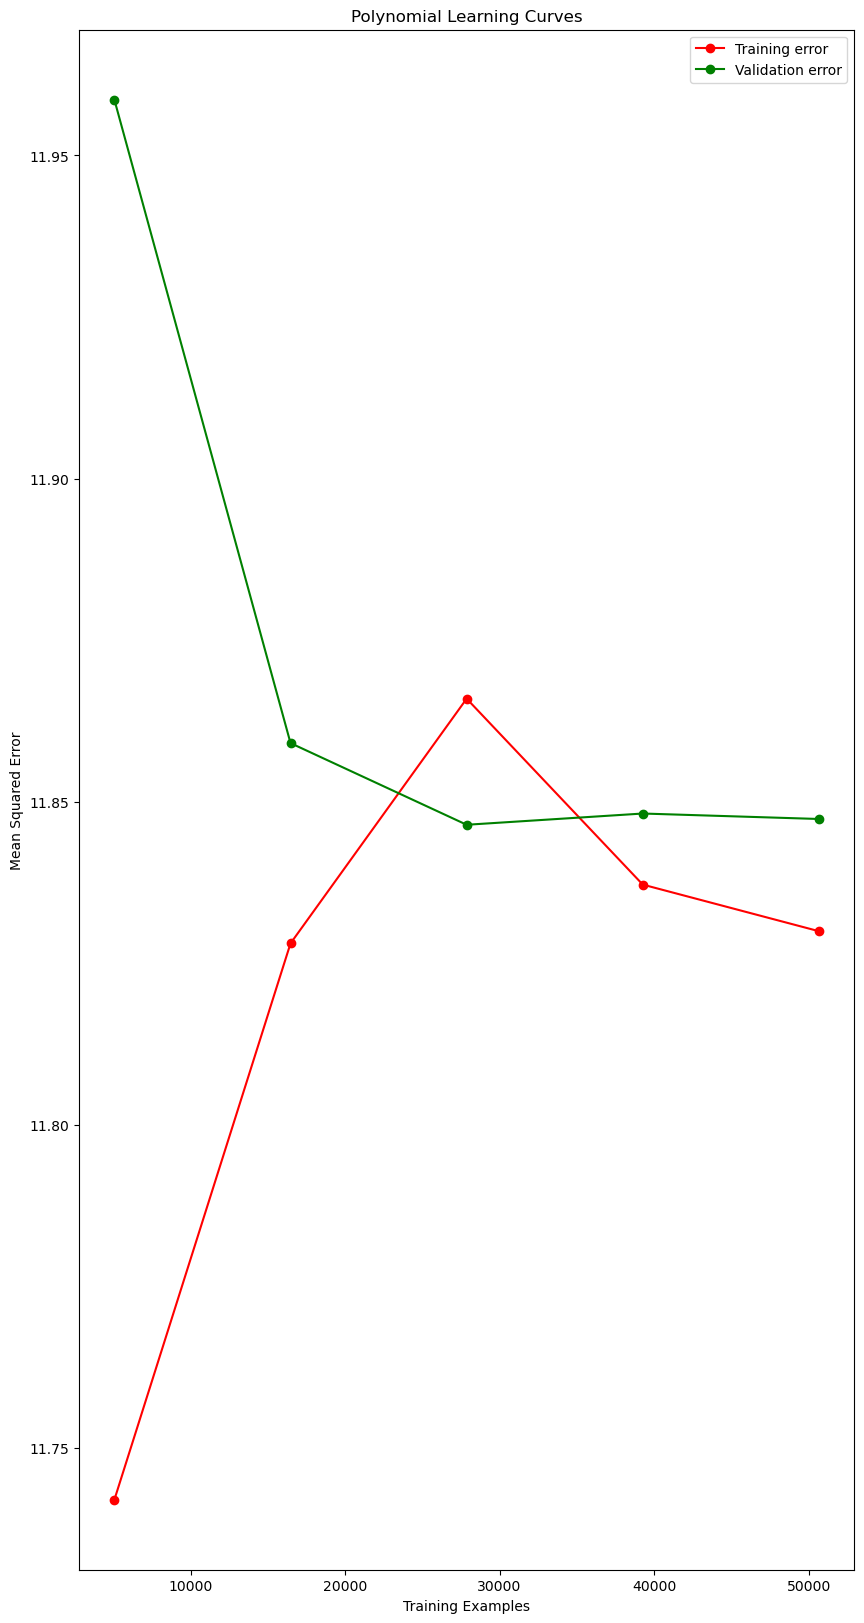

degree 2
Mean Squared Error: 3.7119143926653595
Mean Root Squared Error: 1.9266329159093487
R-squared: 0.9592753151104354


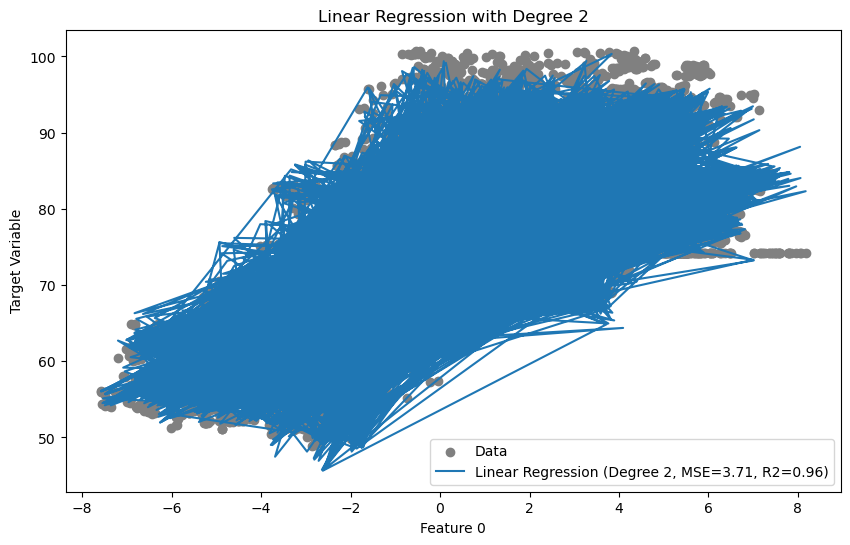

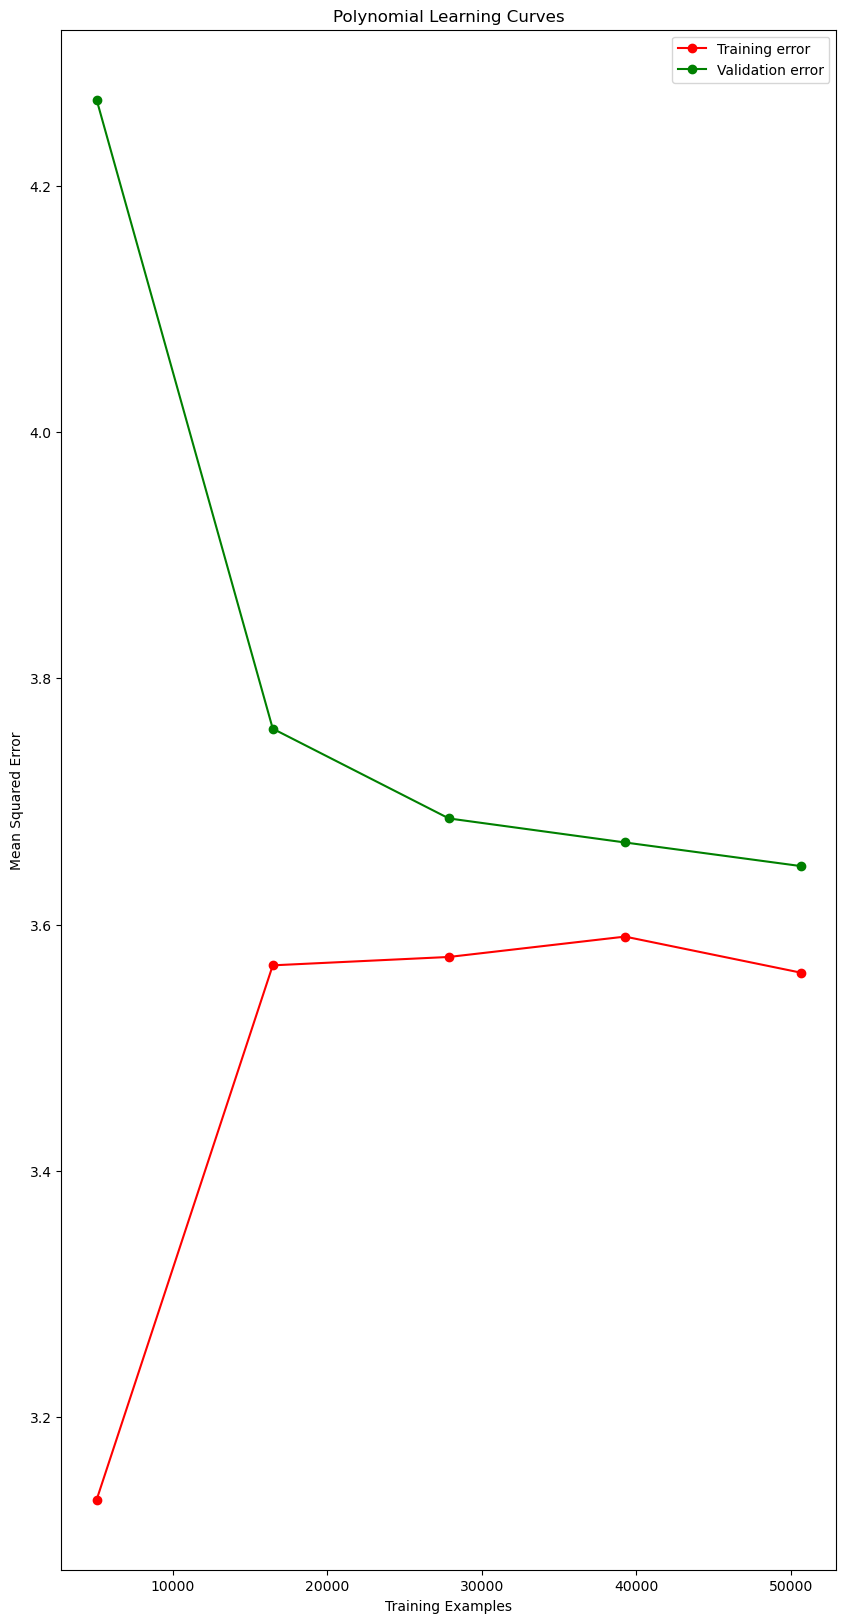

degree 3
Mean Squared Error: 0.6444233877654929
Mean Root Squared Error: 0.8027598568472971
R-squared: 0.9929298101664003


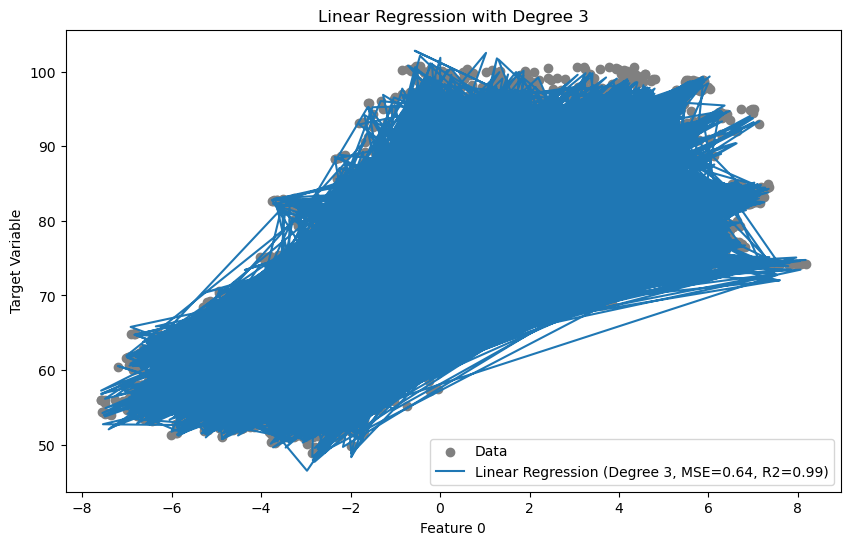

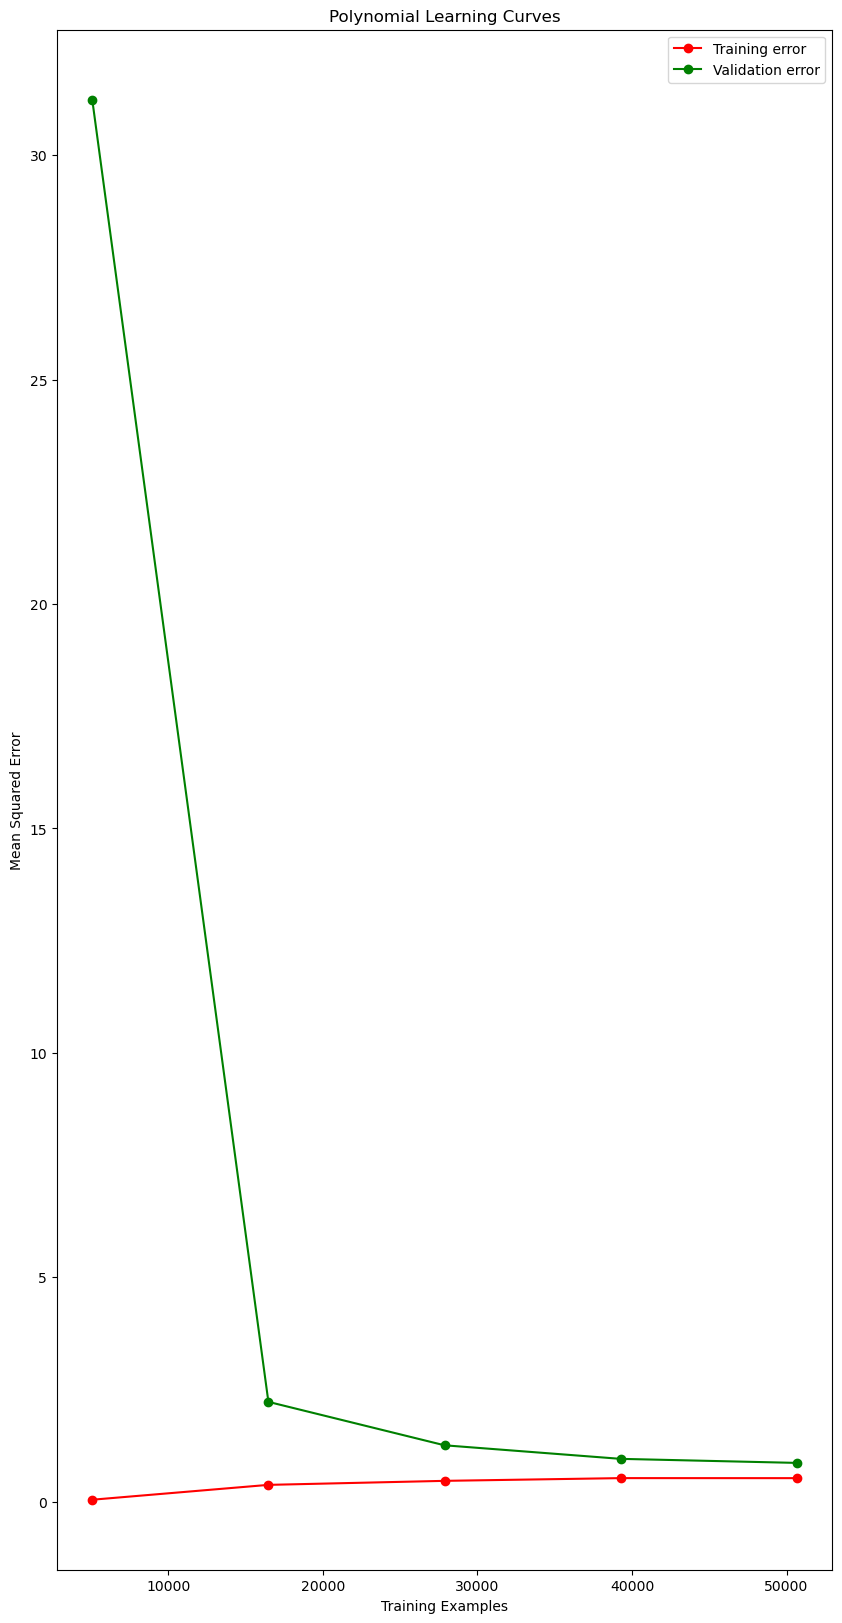

In [16]:
# Define a function to plot learning curves
def plot_polynomial_learning_curves(model, X_poly_train, y_train, X_poly_valid, y_valid):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_poly_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=3, scoring='neg_mean_squared_error'
    )
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(10, 20))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation error')
    plt.xlabel('Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.title('Polynomial Learning Curves')
    plt.legend()
    plt.show()
    
    
# Linear Regression with different degrees

degrees = [1, 2, 3]
for degree in degrees:
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly_train = polynomial_features.fit_transform(X_train_pca)
    X_poly_valid = polynomial_features.transform(X_valid_pca)

    linear_model = LinearRegression()
    linear_model.fit(X_poly_train, y_train)
    y_pred = linear_model.predict(X_poly_valid)
    mse = mean_squared_error(y_valid, y_pred)
    r2 = r2_score(y_valid, y_pred)
    print(f"degree {degree}")
    print("Mean Squared Error:", mse)
    print("Mean Root Squared Error:", np.sqrt(mse))
    print("R-squared:", r2)
    
    #  plots the results for each degree
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X_valid_pca[:, 0], y_valid, color='gray', label='Data')
    plt.plot(X_valid_pca[:, 0], y_pred, label=f'Linear Regression (Degree {degree}, MSE={mse:.2f}, R2={r2:.2f})')
    plt.xlabel('Feature 0')
    plt.ylabel('Target Variable')
    plt.title(f'Linear Regression with Degree {degree}')
    plt.legend()
    
    plot_polynomial_learning_curves(linear_model, X_poly_train, y_train, X_poly_valid, y_valid)

    plt.show()


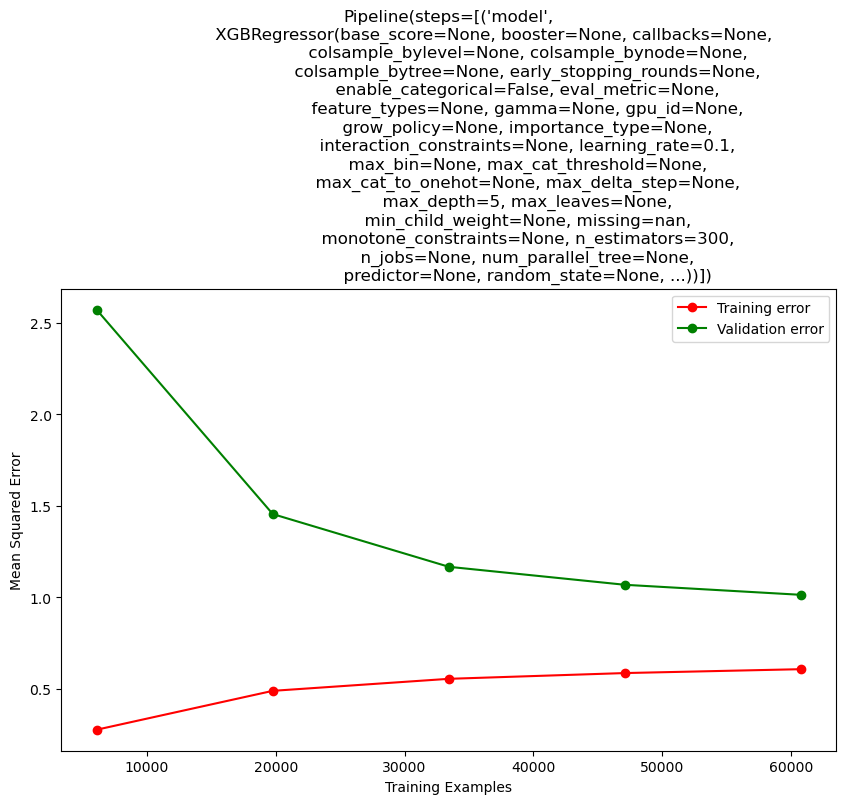

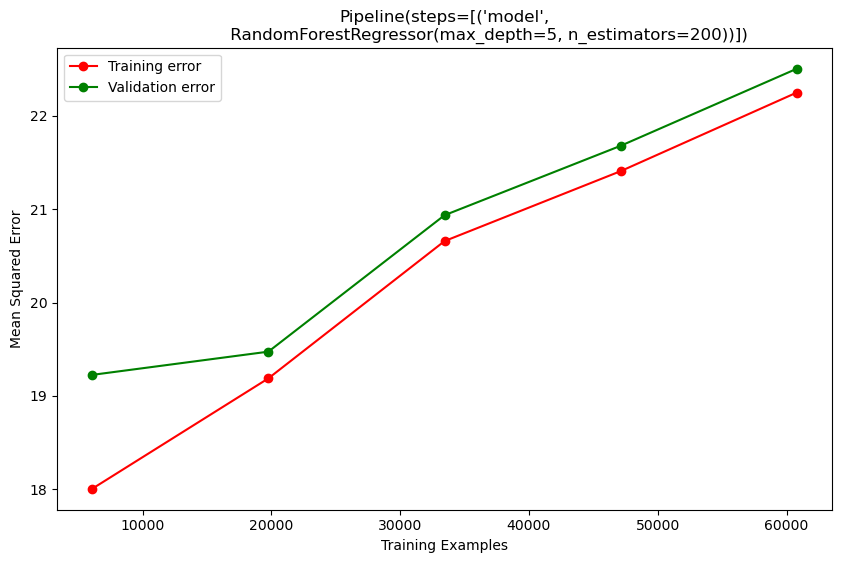

In [31]:

# Define the models and their parameter grids
models = {
    'XGBoost': (Pipeline([
        ('model', XGBRegressor())
    ]), {
        'model__n_estimators': [100, 200, 300],
        'model__learning_rate': [0.1, 0.01, 0.001],
        'model__max_depth': [3, 4, 5]
    }),
    'Random Forest': (Pipeline([
        ('model', RandomForestRegressor())
    ]), {
        'model__n_estimators': [100, 200, 300],
        'model__max_depth': [3, 4, 5]
    })
    
}

# Define a function to plot learning curves
def plot_learning_curves(model, X_train_pca, y_train):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train_pca, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, scoring='neg_mean_squared_error'
    )
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation error')
    plt.xlabel('Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.title(model)
    plt.legend()
    plt.show()

# Perform model tuning and evaluation
results = []
lc_results = []

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5, refit=True)
    grid_search.fit(X_train_pca, y_train)

    best_model = grid_search.best_estimator_
    best_model.fit(X_train_pca, y_train)

    y_pred = best_model.predict(X_valid_pca)
    mse = mean_squared_error(y_valid, y_pred)
    r2 = r2_score(y_valid, y_pred)

    result = {
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'Best Negative MSE': grid_search.best_score_,
        'Test MSE': mse,
        'R-squared': r2
    }
    results.append(result)

    # Append learning curve results
    lc_result = {
        'Model': model_name,
        'Train Sizes': train_sizes,
        'Train MSE': train_scores_mean,
        'Validation MSE': test_scores_mean
    }
    lc_results.append(lc_result)

    # Plot learning curve for the best model
    plot_learning_curves(best_model, X_train_pca, y_train)

# Create DataFrames for results and learning curve results
results_df = pd.DataFrame(results)
lc_results_df = pd.DataFrame(lc_results)

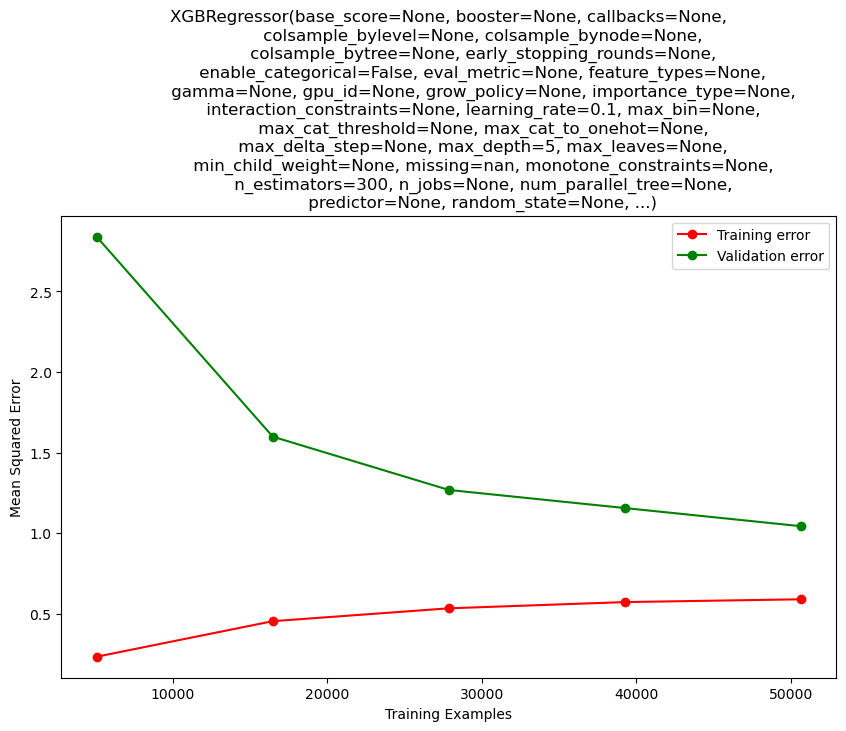

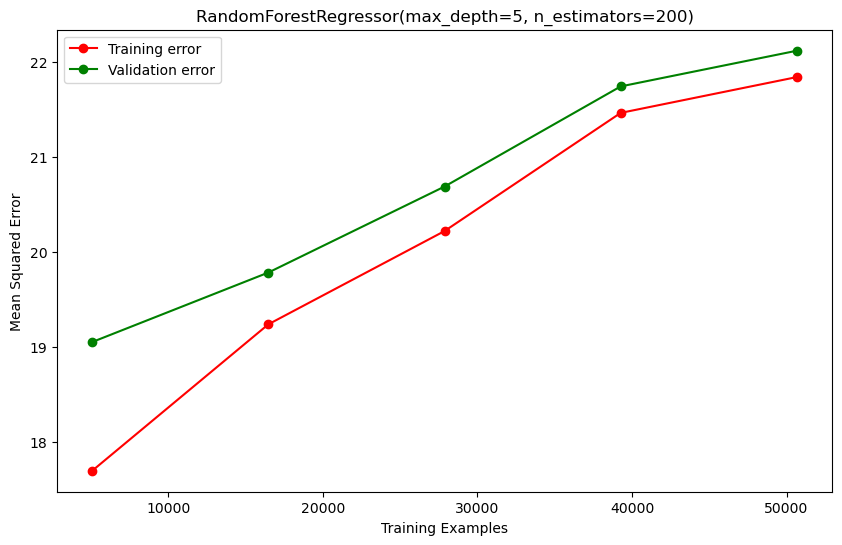

In [19]:
# Define the models and their parameter distributions
models = {
    'XGBoost': (XGBRegressor(), {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [3, 4, 5]
    }),
    'Random Forest': (RandomForestRegressor(), {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5]
    })
}

# Define a function to plot learning curves
def plot_learning_curves(model, X_train_pca, y_train):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train_pca, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=3, scoring='neg_mean_squared_error'
    )
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation error')
    plt.xlabel('Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.title(model)
    plt.legend()
    plt.show()

# Perform model tuning and evaluation
results = []
lc_results = []

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=3, refit=True)
    grid_search.fit(X_train_pca, y_train)

    best_model = grid_search.best_estimator_
    best_model.fit(X_train_pca, y_train)

    y_pred = best_model.predict(X_valid_pca)
    mse = mean_squared_error(y_valid, y_pred)
    r2 = r2_score(y_valid, y_pred)

    result = {
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'Best Negative MSE': grid_search.best_score_,
        'Test MSE': mse,
        'R-squared': r2
    }
    results.append(result)

    # Calculate learning curve results
    train_sizes, train_scores, test_scores = learning_curve(
        best_model, X_train_pca, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=3, scoring='neg_mean_squared_error'
    )
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    
    # Append learning curve results
    lc_result = {
        'Model': model_name,
        'Train Sizes': train_sizes,
        'Train MSE': train_scores_mean,
        'Validation MSE': test_scores_mean
    }
    lc_results.append(lc_result)

    # Plot learning curve for the best model
    plot_learning_curves(best_model, X_train_pca, y_train)

# Create DataFrames for results and learning curve results
results_df = pd.DataFrame(results)
lc_results_df = pd.DataFrame(lc_results)


In [20]:
results_df

,Model,Best Parameters,Best Negative MSE,Test MSE,R-squared
0,XGBoost,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",-1.06,0.95,0.99
1,Random Forest,"{'max_depth': 5, 'n_estimators': 200}",-22.04,23.01,0.75


In [21]:
lc_results_df["Validation MSE"][0]

array([2.83915711, 1.59907121, 1.26842073, 1.15616036, 1.04354645])

In [22]:
#mse
lc_results_df["Train MSE"][0]

array([0.23415456, 0.45457819, 0.53443778, 0.57308101, 0.5903244 ])

In [23]:
#mrse
np.sqrt(lc_results_df["Train MSE"][0])

array([0.4838952 , 0.67422414, 0.73105252, 0.75702114, 0.76832571])

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 60800, number of used features: 22
[LightGBM] [Info] Start training from score 73.430139
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005006 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 60800, number of used features: 22
[LightGBM] [Info] Start training from score 73.442528
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004931 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 60800, number of used features: 22
[LightGBM] [Info

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002895 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 60800, number of used features: 22
[LightGBM] [Info] Start training from score 73.446088
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 60800, number of used features: 22
[LightGBM] [Info] Start training from score 73.433224
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005693 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 60800, number of used features: 22
[LightGBM] [Info] Start training from score 73.476190
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 60800, number of used features: 22
[LightGBM] [Info] Start training from score 73.433224
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 60800, number of used features: 22
[LightGBM] [Info

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005933 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 60800, number of used features: 22
[LightGBM] [Info] Start training from score 73.476190
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 16466, number of used features: 22
[LightGBM] [Info] Start training from score 73.420279
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explici

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001548 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 16466, number of used features: 22
[LightGBM] [Info] Start training from score 73.506645
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 47120, number of used features: 22
[LightGBM] [Info] Start training from score 73.430172
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004875 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 47120, number of used features: 22
[LightGBM] [Info] Start training from score 73.446158
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003010 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 33440, number of used features: 22
[LightGBM] [Info] Start training from score 73.471386
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad sinc

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accu

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choo

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choo

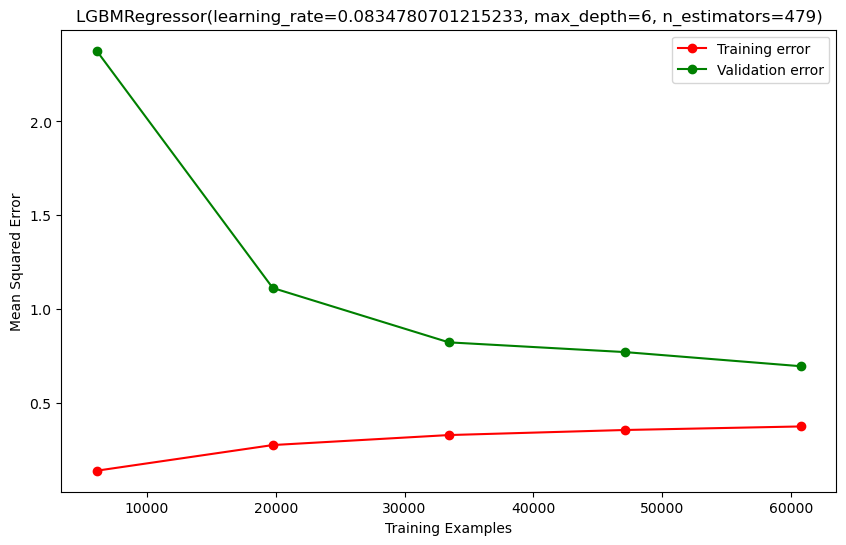

0:	learn: 9.0095999	total: 168ms	remaining: 1m 17s
1:	learn: 8.4852028	total: 181ms	remaining: 41.5s
2:	learn: 8.0175391	total: 194ms	remaining: 29.7s
3:	learn: 7.5946776	total: 207ms	remaining: 23.7s
4:	learn: 7.1929011	total: 220ms	remaining: 20.1s
5:	learn: 6.8123881	total: 234ms	remaining: 17.8s
6:	learn: 6.4835173	total: 248ms	remaining: 16.1s
7:	learn: 6.1810717	total: 262ms	remaining: 14.8s
8:	learn: 5.9070630	total: 275ms	remaining: 13.9s
9:	learn: 5.6412048	total: 289ms	remaining: 13.1s
10:	learn: 5.4013295	total: 303ms	remaining: 12.4s
11:	learn: 5.1729002	total: 317ms	remaining: 11.9s
12:	learn: 4.9631233	total: 332ms	remaining: 11.5s
13:	learn: 4.7584931	total: 346ms	remaining: 11.1s
14:	learn: 4.5752850	total: 361ms	remaining: 10.7s
15:	learn: 4.4099233	total: 375ms	remaining: 10.5s
16:	learn: 4.2475818	total: 392ms	remaining: 10.3s
17:	learn: 4.0968527	total: 406ms	remaining: 10s
18:	learn: 3.9735101	total: 420ms	remaining: 9.79s
19:	learn: 3.8462233	total: 434ms	remainin

170:	learn: 1.0644313	total: 2.89s	remaining: 4.92s
171:	learn: 1.0601628	total: 2.91s	remaining: 4.91s
172:	learn: 1.0569238	total: 2.93s	remaining: 4.89s
173:	learn: 1.0536624	total: 2.94s	remaining: 4.87s
174:	learn: 1.0501373	total: 2.96s	remaining: 4.86s
175:	learn: 1.0450732	total: 2.98s	remaining: 4.84s
176:	learn: 1.0421907	total: 2.99s	remaining: 4.82s
177:	learn: 1.0395428	total: 3.01s	remaining: 4.8s
178:	learn: 1.0333044	total: 3.03s	remaining: 4.79s
179:	learn: 1.0300709	total: 3.04s	remaining: 4.77s
180:	learn: 1.0261174	total: 3.06s	remaining: 4.75s
181:	learn: 1.0227065	total: 3.08s	remaining: 4.73s
182:	learn: 1.0193455	total: 3.09s	remaining: 4.71s
183:	learn: 1.0161946	total: 3.11s	remaining: 4.7s
184:	learn: 1.0126072	total: 3.13s	remaining: 4.68s
185:	learn: 1.0087106	total: 3.14s	remaining: 4.67s
186:	learn: 1.0059452	total: 3.16s	remaining: 4.65s
187:	learn: 1.0017827	total: 3.18s	remaining: 4.63s
188:	learn: 0.9976624	total: 3.19s	remaining: 4.61s
189:	learn: 0.

335:	learn: 0.7060478	total: 5.65s	remaining: 2.12s
336:	learn: 0.7050442	total: 5.67s	remaining: 2.1s
337:	learn: 0.7036725	total: 5.69s	remaining: 2.09s
338:	learn: 0.7026268	total: 5.71s	remaining: 2.07s
339:	learn: 0.7015909	total: 5.73s	remaining: 2.06s
340:	learn: 0.7006757	total: 5.75s	remaining: 2.04s
341:	learn: 0.6997735	total: 5.77s	remaining: 2.02s
342:	learn: 0.6988756	total: 5.79s	remaining: 2.01s
343:	learn: 0.6980231	total: 5.81s	remaining: 1.99s
344:	learn: 0.6968776	total: 5.83s	remaining: 1.98s
345:	learn: 0.6960680	total: 5.85s	remaining: 1.96s
346:	learn: 0.6949570	total: 5.87s	remaining: 1.94s
347:	learn: 0.6936570	total: 5.88s	remaining: 1.93s
348:	learn: 0.6927370	total: 5.9s	remaining: 1.91s
349:	learn: 0.6918767	total: 5.92s	remaining: 1.89s
350:	learn: 0.6908351	total: 5.93s	remaining: 1.88s
351:	learn: 0.6897538	total: 5.95s	remaining: 1.86s
352:	learn: 0.6883296	total: 5.97s	remaining: 1.84s
353:	learn: 0.6868854	total: 5.99s	remaining: 1.83s
354:	learn: 0.

39:	learn: 2.5340203	total: 647ms	remaining: 6.82s
40:	learn: 2.4975746	total: 666ms	remaining: 6.84s
41:	learn: 2.4655589	total: 684ms	remaining: 6.84s
42:	learn: 2.4248397	total: 700ms	remaining: 6.82s
43:	learn: 2.3910469	total: 716ms	remaining: 6.8s
44:	learn: 2.3619273	total: 733ms	remaining: 6.8s
45:	learn: 2.3347818	total: 750ms	remaining: 6.78s
46:	learn: 2.3022573	total: 767ms	remaining: 6.77s
47:	learn: 2.2711635	total: 783ms	remaining: 6.75s
48:	learn: 2.2490492	total: 799ms	remaining: 6.74s
49:	learn: 2.2286280	total: 815ms	remaining: 6.72s
50:	learn: 2.2053572	total: 831ms	remaining: 6.7s
51:	learn: 2.1754204	total: 849ms	remaining: 6.69s
52:	learn: 2.1457644	total: 866ms	remaining: 6.69s
53:	learn: 2.1186814	total: 884ms	remaining: 6.68s
54:	learn: 2.0966119	total: 900ms	remaining: 6.66s
55:	learn: 2.0747151	total: 917ms	remaining: 6.64s
56:	learn: 2.0547809	total: 933ms	remaining: 6.63s
57:	learn: 2.0359175	total: 952ms	remaining: 6.63s
58:	learn: 2.0167228	total: 972ms	

208:	learn: 0.9501007	total: 3.63s	remaining: 4.4s
209:	learn: 0.9474401	total: 3.65s	remaining: 4.38s
210:	learn: 0.9447172	total: 3.67s	remaining: 4.37s
211:	learn: 0.9421725	total: 3.69s	remaining: 4.35s
212:	learn: 0.9400652	total: 3.7s	remaining: 4.33s
213:	learn: 0.9367006	total: 3.72s	remaining: 4.31s
214:	learn: 0.9344069	total: 3.73s	remaining: 4.29s
215:	learn: 0.9317560	total: 3.75s	remaining: 4.27s
216:	learn: 0.9287749	total: 3.77s	remaining: 4.25s
217:	learn: 0.9260688	total: 3.78s	remaining: 4.23s
218:	learn: 0.9233949	total: 3.8s	remaining: 4.21s
219:	learn: 0.9206165	total: 3.81s	remaining: 4.2s
220:	learn: 0.9183268	total: 3.83s	remaining: 4.18s
221:	learn: 0.9158467	total: 3.85s	remaining: 4.16s
222:	learn: 0.9130684	total: 3.86s	remaining: 4.14s
223:	learn: 0.9106483	total: 3.88s	remaining: 4.12s
224:	learn: 0.9075025	total: 3.9s	remaining: 4.1s
225:	learn: 0.9049647	total: 3.91s	remaining: 4.08s
226:	learn: 0.9028939	total: 3.93s	remaining: 4.07s
227:	learn: 0.9008

376:	learn: 0.6669955	total: 6.4s	remaining: 1.44s
377:	learn: 0.6663545	total: 6.42s	remaining: 1.43s
378:	learn: 0.6656315	total: 6.43s	remaining: 1.41s
379:	learn: 0.6649031	total: 6.45s	remaining: 1.39s
380:	learn: 0.6630376	total: 6.47s	remaining: 1.38s
381:	learn: 0.6621031	total: 6.48s	remaining: 1.36s
382:	learn: 0.6610475	total: 6.5s	remaining: 1.34s
383:	learn: 0.6601378	total: 6.51s	remaining: 1.32s
384:	learn: 0.6592182	total: 6.53s	remaining: 1.31s
385:	learn: 0.6585529	total: 6.55s	remaining: 1.29s
386:	learn: 0.6573245	total: 6.57s	remaining: 1.27s
387:	learn: 0.6565753	total: 6.58s	remaining: 1.25s
388:	learn: 0.6556968	total: 6.6s	remaining: 1.24s
389:	learn: 0.6548946	total: 6.62s	remaining: 1.22s
390:	learn: 0.6538886	total: 6.63s	remaining: 1.2s
391:	learn: 0.6529588	total: 6.65s	remaining: 1.19s
392:	learn: 0.6518933	total: 6.66s	remaining: 1.17s
393:	learn: 0.6508284	total: 6.68s	remaining: 1.15s
394:	learn: 0.6496419	total: 6.7s	remaining: 1.14s
395:	learn: 0.648

79:	learn: 1.6430678	total: 1.29s	remaining: 6.16s
80:	learn: 1.6334805	total: 1.31s	remaining: 6.15s
81:	learn: 1.6230121	total: 1.32s	remaining: 6.13s
82:	learn: 1.6134570	total: 1.34s	remaining: 6.11s
83:	learn: 1.6059496	total: 1.35s	remaining: 6.09s
84:	learn: 1.5969257	total: 1.37s	remaining: 6.08s
85:	learn: 1.5877654	total: 1.39s	remaining: 6.06s
86:	learn: 1.5776753	total: 1.4s	remaining: 6.04s
87:	learn: 1.5690755	total: 1.42s	remaining: 6.03s
88:	learn: 1.5559717	total: 1.43s	remaining: 6.01s
89:	learn: 1.5457300	total: 1.45s	remaining: 5.99s
90:	learn: 1.5352705	total: 1.47s	remaining: 5.98s
91:	learn: 1.5290865	total: 1.48s	remaining: 5.96s
92:	learn: 1.5180754	total: 1.5s	remaining: 5.95s
93:	learn: 1.5068297	total: 1.52s	remaining: 5.95s
94:	learn: 1.4963657	total: 1.53s	remaining: 5.93s
95:	learn: 1.4873212	total: 1.55s	remaining: 5.91s
96:	learn: 1.4772553	total: 1.57s	remaining: 5.89s
97:	learn: 1.4687215	total: 1.58s	remaining: 5.88s
98:	learn: 1.4583089	total: 1.6s	

248:	learn: 0.8297185	total: 4.07s	remaining: 3.48s
249:	learn: 0.8272517	total: 4.09s	remaining: 3.47s
250:	learn: 0.8251887	total: 4.11s	remaining: 3.45s
251:	learn: 0.8225370	total: 4.12s	remaining: 3.44s
252:	learn: 0.8203758	total: 4.14s	remaining: 3.42s
253:	learn: 0.8187017	total: 4.16s	remaining: 3.4s
254:	learn: 0.8171326	total: 4.17s	remaining: 3.38s
255:	learn: 0.8143909	total: 4.19s	remaining: 3.37s
256:	learn: 0.8126437	total: 4.2s	remaining: 3.35s
257:	learn: 0.8112516	total: 4.22s	remaining: 3.34s
258:	learn: 0.8097983	total: 4.24s	remaining: 3.32s
259:	learn: 0.8079808	total: 4.25s	remaining: 3.3s
260:	learn: 0.8060820	total: 4.27s	remaining: 3.29s
261:	learn: 0.8041558	total: 4.29s	remaining: 3.27s
262:	learn: 0.8021610	total: 4.31s	remaining: 3.26s
263:	learn: 0.8006421	total: 4.33s	remaining: 3.25s
264:	learn: 0.7985883	total: 4.34s	remaining: 3.23s
265:	learn: 0.7972633	total: 4.36s	remaining: 3.21s
266:	learn: 0.7954831	total: 4.38s	remaining: 3.2s
267:	learn: 0.79

417:	learn: 0.6126256	total: 6.88s	remaining: 724ms
418:	learn: 0.6119664	total: 6.9s	remaining: 708ms
419:	learn: 0.6111774	total: 6.91s	remaining: 691ms
420:	learn: 0.6104499	total: 6.93s	remaining: 675ms
421:	learn: 0.6097767	total: 6.94s	remaining: 658ms
422:	learn: 0.6087637	total: 6.96s	remaining: 642ms
423:	learn: 0.6079661	total: 6.98s	remaining: 625ms
424:	learn: 0.6074633	total: 6.99s	remaining: 609ms
425:	learn: 0.6069639	total: 7.01s	remaining: 592ms
426:	learn: 0.6060915	total: 7.02s	remaining: 576ms
427:	learn: 0.6053794	total: 7.04s	remaining: 559ms
428:	learn: 0.6045963	total: 7.06s	remaining: 543ms
429:	learn: 0.6035832	total: 7.07s	remaining: 526ms
430:	learn: 0.6022845	total: 7.09s	remaining: 510ms
431:	learn: 0.6012849	total: 7.11s	remaining: 494ms
432:	learn: 0.6004242	total: 7.13s	remaining: 477ms
433:	learn: 0.5997032	total: 7.14s	remaining: 461ms
434:	learn: 0.5987913	total: 7.16s	remaining: 444ms
435:	learn: 0.5982654	total: 7.18s	remaining: 428ms
436:	learn: 0

116:	learn: 1.3555115	total: 1.92s	remaining: 5.65s
117:	learn: 1.3492601	total: 1.94s	remaining: 5.64s
118:	learn: 1.3426827	total: 1.95s	remaining: 5.63s
119:	learn: 1.3374563	total: 1.97s	remaining: 5.61s
120:	learn: 1.3313443	total: 1.98s	remaining: 5.59s
121:	learn: 1.3255190	total: 2s	remaining: 5.57s
122:	learn: 1.3212642	total: 2.02s	remaining: 5.55s
123:	learn: 1.3153785	total: 2.03s	remaining: 5.54s
124:	learn: 1.3062542	total: 2.05s	remaining: 5.52s
125:	learn: 1.3007052	total: 2.06s	remaining: 5.5s
126:	learn: 1.2936534	total: 2.08s	remaining: 5.48s
127:	learn: 1.2867083	total: 2.09s	remaining: 5.46s
128:	learn: 1.2807482	total: 2.11s	remaining: 5.45s
129:	learn: 1.2729681	total: 2.13s	remaining: 5.44s
130:	learn: 1.2668778	total: 2.15s	remaining: 5.42s
131:	learn: 1.2624038	total: 2.16s	remaining: 5.4s
132:	learn: 1.2554075	total: 2.18s	remaining: 5.39s
133:	learn: 1.2489100	total: 2.19s	remaining: 5.37s
134:	learn: 1.2439447	total: 2.21s	remaining: 5.35s
135:	learn: 1.239

284:	learn: 0.7855595	total: 4.7s	remaining: 2.92s
285:	learn: 0.7842575	total: 4.72s	remaining: 2.9s
286:	learn: 0.7820559	total: 4.74s	remaining: 2.89s
287:	learn: 0.7806430	total: 4.75s	remaining: 2.87s
288:	learn: 0.7792007	total: 4.77s	remaining: 2.85s
289:	learn: 0.7778225	total: 4.79s	remaining: 2.84s
290:	learn: 0.7758867	total: 4.8s	remaining: 2.82s
291:	learn: 0.7738322	total: 4.82s	remaining: 2.81s
292:	learn: 0.7727064	total: 4.83s	remaining: 2.79s
293:	learn: 0.7710847	total: 4.85s	remaining: 2.77s
294:	learn: 0.7695921	total: 4.87s	remaining: 2.75s
295:	learn: 0.7684314	total: 4.88s	remaining: 2.74s
296:	learn: 0.7674805	total: 4.9s	remaining: 2.72s
297:	learn: 0.7649367	total: 4.92s	remaining: 2.71s
298:	learn: 0.7634196	total: 4.94s	remaining: 2.69s
299:	learn: 0.7612700	total: 4.95s	remaining: 2.67s
300:	learn: 0.7592179	total: 4.97s	remaining: 2.66s
301:	learn: 0.7575841	total: 4.99s	remaining: 2.64s
302:	learn: 0.7560377	total: 5s	remaining: 2.63s
303:	learn: 0.75469

452:	learn: 0.5991429	total: 7.49s	remaining: 149ms
453:	learn: 0.5983072	total: 7.51s	remaining: 132ms
454:	learn: 0.5975161	total: 7.52s	remaining: 116ms
455:	learn: 0.5962521	total: 7.54s	remaining: 99.2ms
456:	learn: 0.5954710	total: 7.56s	remaining: 82.7ms
457:	learn: 0.5947508	total: 7.57s	remaining: 66.1ms
458:	learn: 0.5941315	total: 7.59s	remaining: 49.6ms
459:	learn: 0.5934113	total: 7.61s	remaining: 33.1ms
460:	learn: 0.5929182	total: 7.62s	remaining: 16.5ms
461:	learn: 0.5923056	total: 7.64s	remaining: 0us
0:	learn: 9.0037376	total: 14.9ms	remaining: 6.86s
1:	learn: 8.4805461	total: 29.2ms	remaining: 6.72s
2:	learn: 8.0088682	total: 43.6ms	remaining: 6.67s
3:	learn: 7.5784707	total: 57.7ms	remaining: 6.6s
4:	learn: 7.1902935	total: 72.1ms	remaining: 6.59s
5:	learn: 6.8105502	total: 86.6ms	remaining: 6.58s
6:	learn: 6.4835543	total: 101ms	remaining: 6.59s
7:	learn: 6.1867270	total: 116ms	remaining: 6.57s
8:	learn: 5.9156464	total: 131ms	remaining: 6.58s
9:	learn: 5.6668377	t

153:	learn: 1.1326627	total: 2.55s	remaining: 5.09s
154:	learn: 1.1260054	total: 2.57s	remaining: 5.08s
155:	learn: 1.1210484	total: 2.58s	remaining: 5.07s
156:	learn: 1.1165108	total: 2.6s	remaining: 5.05s
157:	learn: 1.1123630	total: 2.62s	remaining: 5.03s
158:	learn: 1.1078040	total: 2.63s	remaining: 5.02s
159:	learn: 1.1021641	total: 2.65s	remaining: 5s
160:	learn: 1.0986581	total: 2.67s	remaining: 4.99s
161:	learn: 1.0937653	total: 2.68s	remaining: 4.97s
162:	learn: 1.0901763	total: 2.7s	remaining: 4.95s
163:	learn: 1.0863697	total: 2.71s	remaining: 4.93s
164:	learn: 1.0830047	total: 2.73s	remaining: 4.92s
165:	learn: 1.0780642	total: 2.75s	remaining: 4.9s
166:	learn: 1.0748179	total: 2.76s	remaining: 4.88s
167:	learn: 1.0707306	total: 2.78s	remaining: 4.87s
168:	learn: 1.0660843	total: 2.8s	remaining: 4.85s
169:	learn: 1.0627399	total: 2.81s	remaining: 4.83s
170:	learn: 1.0601521	total: 2.83s	remaining: 4.81s
171:	learn: 1.0569836	total: 2.85s	remaining: 4.8s
172:	learn: 1.052232

317:	learn: 0.7181060	total: 5.29s	remaining: 2.4s
318:	learn: 0.7169076	total: 5.31s	remaining: 2.38s
319:	learn: 0.7159146	total: 5.33s	remaining: 2.36s
320:	learn: 0.7146507	total: 5.35s	remaining: 2.35s
321:	learn: 0.7133138	total: 5.36s	remaining: 2.33s
322:	learn: 0.7114304	total: 5.38s	remaining: 2.31s
323:	learn: 0.7097234	total: 5.39s	remaining: 2.3s
324:	learn: 0.7085304	total: 5.41s	remaining: 2.28s
325:	learn: 0.7074598	total: 5.43s	remaining: 2.26s
326:	learn: 0.7057583	total: 5.45s	remaining: 2.25s
327:	learn: 0.7046631	total: 5.46s	remaining: 2.23s
328:	learn: 0.7027842	total: 5.48s	remaining: 2.21s
329:	learn: 0.7014192	total: 5.49s	remaining: 2.2s
330:	learn: 0.6998552	total: 5.51s	remaining: 2.18s
331:	learn: 0.6984101	total: 5.53s	remaining: 2.16s
332:	learn: 0.6974404	total: 5.54s	remaining: 2.15s
333:	learn: 0.6959716	total: 5.56s	remaining: 2.13s
334:	learn: 0.6951816	total: 5.58s	remaining: 2.11s
335:	learn: 0.6942348	total: 5.59s	remaining: 2.1s
336:	learn: 0.69

17:	learn: 4.5288375	total: 468ms	remaining: 7.72s
18:	learn: 4.3815461	total: 497ms	remaining: 7.74s
19:	learn: 4.2426906	total: 525ms	remaining: 7.74s
20:	learn: 4.1140413	total: 551ms	remaining: 7.71s
21:	learn: 3.9859396	total: 578ms	remaining: 7.7s
22:	learn: 3.8592325	total: 605ms	remaining: 7.68s
23:	learn: 3.7446735	total: 633ms	remaining: 7.67s
24:	learn: 3.6350567	total: 663ms	remaining: 7.69s
25:	learn: 3.5375789	total: 692ms	remaining: 7.69s
26:	learn: 3.4466572	total: 718ms	remaining: 7.66s
27:	learn: 3.3530001	total: 747ms	remaining: 7.66s
28:	learn: 3.2727535	total: 775ms	remaining: 7.65s
29:	learn: 3.1997690	total: 803ms	remaining: 7.63s
30:	learn: 3.1278374	total: 831ms	remaining: 7.61s
31:	learn: 3.0579609	total: 861ms	remaining: 7.61s
32:	learn: 2.9910078	total: 892ms	remaining: 7.62s
33:	learn: 2.9269197	total: 920ms	remaining: 7.61s
34:	learn: 2.8725943	total: 947ms	remaining: 7.57s
35:	learn: 2.8150211	total: 974ms	remaining: 7.55s
36:	learn: 2.7613759	total: 1s	r

184:	learn: 0.9821051	total: 5.01s	remaining: 3.52s
185:	learn: 0.9792052	total: 5.04s	remaining: 3.5s
186:	learn: 0.9765655	total: 5.07s	remaining: 3.47s
187:	learn: 0.9738787	total: 5.09s	remaining: 3.44s
188:	learn: 0.9707209	total: 5.12s	remaining: 3.41s
189:	learn: 0.9677872	total: 5.15s	remaining: 3.39s
190:	learn: 0.9638336	total: 5.17s	remaining: 3.36s
191:	learn: 0.9613671	total: 5.2s	remaining: 3.33s
192:	learn: 0.9587586	total: 5.23s	remaining: 3.3s
193:	learn: 0.9557862	total: 5.25s	remaining: 3.28s
194:	learn: 0.9530282	total: 5.28s	remaining: 3.25s
195:	learn: 0.9502134	total: 5.31s	remaining: 3.22s
196:	learn: 0.9471888	total: 5.33s	remaining: 3.19s
197:	learn: 0.9439867	total: 5.36s	remaining: 3.17s
198:	learn: 0.9416199	total: 5.39s	remaining: 3.14s
199:	learn: 0.9395316	total: 5.41s	remaining: 3.11s
200:	learn: 0.9368363	total: 5.44s	remaining: 3.08s
201:	learn: 0.9345406	total: 5.47s	remaining: 3.06s
202:	learn: 0.9307720	total: 5.49s	remaining: 3.03s
203:	learn: 0.9

33:	learn: 2.9474449	total: 912ms	remaining: 7.53s
34:	learn: 2.8821390	total: 942ms	remaining: 7.53s
35:	learn: 2.8260245	total: 969ms	remaining: 7.51s
36:	learn: 2.7775777	total: 997ms	remaining: 7.49s
37:	learn: 2.7262253	total: 1.02s	remaining: 7.46s
38:	learn: 2.6745445	total: 1.05s	remaining: 7.43s
39:	learn: 2.6193239	total: 1.08s	remaining: 7.42s
40:	learn: 2.5725466	total: 1.11s	remaining: 7.4s
41:	learn: 2.5250819	total: 1.14s	remaining: 7.39s
42:	learn: 2.4801859	total: 1.17s	remaining: 7.37s
43:	learn: 2.4448666	total: 1.19s	remaining: 7.34s
44:	learn: 2.4053680	total: 1.22s	remaining: 7.31s
45:	learn: 2.3687611	total: 1.25s	remaining: 7.29s
46:	learn: 2.3338596	total: 1.27s	remaining: 7.27s
47:	learn: 2.2973558	total: 1.3s	remaining: 7.24s
48:	learn: 2.2632236	total: 1.33s	remaining: 7.21s
49:	learn: 2.2301731	total: 1.36s	remaining: 7.2s
50:	learn: 2.2026281	total: 1.39s	remaining: 7.18s
51:	learn: 2.1712771	total: 1.41s	remaining: 7.15s
52:	learn: 2.1446752	total: 1.44s	

195:	learn: 0.9489171	total: 5.3s	remaining: 3.22s
196:	learn: 0.9458199	total: 5.33s	remaining: 3.19s
197:	learn: 0.9435565	total: 5.36s	remaining: 3.17s
198:	learn: 0.9401248	total: 5.39s	remaining: 3.14s
199:	learn: 0.9367125	total: 5.41s	remaining: 3.11s
200:	learn: 0.9332474	total: 5.44s	remaining: 3.08s
201:	learn: 0.9309970	total: 5.46s	remaining: 3.06s
202:	learn: 0.9281215	total: 5.49s	remaining: 3.03s
203:	learn: 0.9249871	total: 5.52s	remaining: 3s
204:	learn: 0.9219976	total: 5.55s	remaining: 2.98s
205:	learn: 0.9192914	total: 5.57s	remaining: 2.95s
206:	learn: 0.9165884	total: 5.6s	remaining: 2.92s
207:	learn: 0.9140754	total: 5.63s	remaining: 2.89s
208:	learn: 0.9107395	total: 5.65s	remaining: 2.87s
209:	learn: 0.9086286	total: 5.68s	remaining: 2.84s
210:	learn: 0.9058488	total: 5.7s	remaining: 2.81s
211:	learn: 0.9032093	total: 5.73s	remaining: 2.78s
212:	learn: 0.9000611	total: 5.76s	remaining: 2.76s
213:	learn: 0.8972607	total: 5.79s	remaining: 2.73s
214:	learn: 0.8945

40:	learn: 2.5704592	total: 1.12s	remaining: 7.47s
41:	learn: 2.5261853	total: 1.15s	remaining: 7.44s
42:	learn: 2.4827548	total: 1.17s	remaining: 7.42s
43:	learn: 2.4470992	total: 1.2s	remaining: 7.38s
44:	learn: 2.4084992	total: 1.23s	remaining: 7.36s
45:	learn: 2.3717036	total: 1.25s	remaining: 7.33s
46:	learn: 2.3359796	total: 1.28s	remaining: 7.31s
47:	learn: 2.3060783	total: 1.31s	remaining: 7.28s
48:	learn: 2.2707544	total: 1.34s	remaining: 7.25s
49:	learn: 2.2381635	total: 1.37s	remaining: 7.26s
50:	learn: 2.2099882	total: 1.4s	remaining: 7.25s
51:	learn: 2.1811843	total: 1.43s	remaining: 7.23s
52:	learn: 2.1497040	total: 1.46s	remaining: 7.22s
53:	learn: 2.1254310	total: 1.49s	remaining: 7.21s
54:	learn: 2.0997407	total: 1.52s	remaining: 7.18s
55:	learn: 2.0765453	total: 1.55s	remaining: 7.16s
56:	learn: 2.0540088	total: 1.58s	remaining: 7.15s
57:	learn: 2.0318332	total: 1.61s	remaining: 7.12s
58:	learn: 2.0117519	total: 1.63s	remaining: 7.09s
59:	learn: 1.9863581	total: 1.66s

200:	learn: 0.9310539	total: 5.55s	remaining: 3.15s
201:	learn: 0.9272192	total: 5.59s	remaining: 3.12s
202:	learn: 0.9244620	total: 5.61s	remaining: 3.1s
203:	learn: 0.9198800	total: 5.64s	remaining: 3.07s
204:	learn: 0.9172739	total: 5.67s	remaining: 3.04s
205:	learn: 0.9142888	total: 5.69s	remaining: 3.01s
206:	learn: 0.9116695	total: 5.72s	remaining: 2.98s
207:	learn: 0.9087828	total: 5.75s	remaining: 2.96s
208:	learn: 0.9058618	total: 5.77s	remaining: 2.93s
209:	learn: 0.9026801	total: 5.8s	remaining: 2.9s
210:	learn: 0.8996918	total: 5.83s	remaining: 2.87s
211:	learn: 0.8969906	total: 5.86s	remaining: 2.85s
212:	learn: 0.8944688	total: 5.88s	remaining: 2.82s
213:	learn: 0.8922745	total: 5.91s	remaining: 2.79s
214:	learn: 0.8896234	total: 5.93s	remaining: 2.76s
215:	learn: 0.8873911	total: 5.96s	remaining: 2.73s
216:	learn: 0.8835038	total: 5.99s	remaining: 2.7s
217:	learn: 0.8807109	total: 6.01s	remaining: 2.68s
218:	learn: 0.8780831	total: 6.04s	remaining: 2.65s
219:	learn: 0.87

49:	learn: 2.2487306	total: 1.38s	remaining: 7.31s
50:	learn: 2.2175072	total: 1.41s	remaining: 7.32s
51:	learn: 2.1875117	total: 1.45s	remaining: 7.33s
52:	learn: 2.1618973	total: 1.49s	remaining: 7.35s
53:	learn: 2.1331618	total: 1.52s	remaining: 7.36s
54:	learn: 2.1095371	total: 1.55s	remaining: 7.35s
55:	learn: 2.0842886	total: 1.59s	remaining: 7.35s
56:	learn: 2.0625249	total: 1.62s	remaining: 7.35s
57:	learn: 2.0385008	total: 1.66s	remaining: 7.34s
58:	learn: 2.0203097	total: 1.69s	remaining: 7.33s
59:	learn: 1.9992843	total: 1.72s	remaining: 7.31s
60:	learn: 1.9765797	total: 1.75s	remaining: 7.28s
61:	learn: 1.9545984	total: 1.78s	remaining: 7.26s
62:	learn: 1.9354770	total: 1.81s	remaining: 7.24s
63:	learn: 1.9160122	total: 1.85s	remaining: 7.24s
64:	learn: 1.8937699	total: 1.88s	remaining: 7.22s
65:	learn: 1.8731121	total: 1.91s	remaining: 7.2s
66:	learn: 1.8523297	total: 1.94s	remaining: 7.19s
67:	learn: 1.8372824	total: 1.97s	remaining: 7.17s
68:	learn: 1.8167500	total: 2.01

214:	learn: 0.9071176	total: 6.54s	remaining: 3.04s
215:	learn: 0.9049921	total: 6.57s	remaining: 3.01s
216:	learn: 0.9024041	total: 6.59s	remaining: 2.98s
217:	learn: 0.8997538	total: 6.62s	remaining: 2.95s
218:	learn: 0.8974236	total: 6.65s	remaining: 2.91s
219:	learn: 0.8940259	total: 6.67s	remaining: 2.88s
220:	learn: 0.8904723	total: 6.7s	remaining: 2.85s
221:	learn: 0.8878663	total: 6.73s	remaining: 2.82s
222:	learn: 0.8838582	total: 6.75s	remaining: 2.79s
223:	learn: 0.8809783	total: 6.78s	remaining: 2.75s
224:	learn: 0.8791697	total: 6.81s	remaining: 2.72s
225:	learn: 0.8770151	total: 6.84s	remaining: 2.69s
226:	learn: 0.8744953	total: 6.87s	remaining: 2.66s
227:	learn: 0.8719321	total: 6.9s	remaining: 2.63s
228:	learn: 0.8697726	total: 6.93s	remaining: 2.6s
229:	learn: 0.8676875	total: 6.96s	remaining: 2.57s
230:	learn: 0.8651132	total: 6.99s	remaining: 2.54s
231:	learn: 0.8628947	total: 7.02s	remaining: 2.51s
232:	learn: 0.8607878	total: 7.04s	remaining: 2.48s
233:	learn: 0.8

65:	learn: 1.8932193	total: 2.04s	remaining: 7.69s
66:	learn: 1.8742116	total: 2.07s	remaining: 7.65s
67:	learn: 1.8575811	total: 2.1s	remaining: 7.62s
68:	learn: 1.8347720	total: 2.13s	remaining: 7.6s
69:	learn: 1.8117208	total: 2.16s	remaining: 7.57s
70:	learn: 1.7967442	total: 2.19s	remaining: 7.53s
71:	learn: 1.7810264	total: 2.22s	remaining: 7.5s
72:	learn: 1.7608332	total: 2.25s	remaining: 7.47s
73:	learn: 1.7455578	total: 2.28s	remaining: 7.44s
74:	learn: 1.7333042	total: 2.31s	remaining: 7.41s
75:	learn: 1.7197410	total: 2.35s	remaining: 7.38s
76:	learn: 1.7062147	total: 2.38s	remaining: 7.34s
77:	learn: 1.6918345	total: 2.4s	remaining: 7.31s
78:	learn: 1.6762739	total: 2.43s	remaining: 7.27s
79:	learn: 1.6631781	total: 2.46s	remaining: 7.23s
80:	learn: 1.6494171	total: 2.49s	remaining: 7.2s
81:	learn: 1.6365442	total: 2.52s	remaining: 7.17s
82:	learn: 1.6246184	total: 2.56s	remaining: 7.15s
83:	learn: 1.6125953	total: 2.59s	remaining: 7.12s
84:	learn: 1.6000968	total: 2.62s	re

228:	learn: 0.8472242	total: 7.12s	remaining: 2.67s
229:	learn: 0.8447255	total: 7.15s	remaining: 2.64s
230:	learn: 0.8419147	total: 7.19s	remaining: 2.61s
231:	learn: 0.8398348	total: 7.22s	remaining: 2.58s
232:	learn: 0.8370438	total: 7.25s	remaining: 2.55s
233:	learn: 0.8342337	total: 7.28s	remaining: 2.52s
234:	learn: 0.8323546	total: 7.32s	remaining: 2.49s
235:	learn: 0.8296091	total: 7.35s	remaining: 2.46s
236:	learn: 0.8267911	total: 7.38s	remaining: 2.43s
237:	learn: 0.8247930	total: 7.41s	remaining: 2.4s
238:	learn: 0.8222945	total: 7.45s	remaining: 2.37s
239:	learn: 0.8203992	total: 7.48s	remaining: 2.34s
240:	learn: 0.8185279	total: 7.52s	remaining: 2.31s
241:	learn: 0.8164899	total: 7.56s	remaining: 2.28s
242:	learn: 0.8140396	total: 7.59s	remaining: 2.25s
243:	learn: 0.8115291	total: 7.63s	remaining: 2.22s
244:	learn: 0.8091174	total: 7.66s	remaining: 2.19s
245:	learn: 0.8071097	total: 7.68s	remaining: 2.15s
246:	learn: 0.8057773	total: 7.71s	remaining: 2.12s
247:	learn: 0

82:	learn: 2.1956329	total: 1.1s	remaining: 1.79s
83:	learn: 2.1833020	total: 1.11s	remaining: 1.78s
84:	learn: 2.1701290	total: 1.13s	remaining: 1.76s
85:	learn: 2.1524086	total: 1.14s	remaining: 1.75s
86:	learn: 2.1393179	total: 1.15s	remaining: 1.73s
87:	learn: 2.1226574	total: 1.16s	remaining: 1.72s
88:	learn: 2.1075213	total: 1.17s	remaining: 1.7s
89:	learn: 2.0936800	total: 1.19s	remaining: 1.69s
90:	learn: 2.0778013	total: 1.2s	remaining: 1.67s
91:	learn: 2.0659776	total: 1.21s	remaining: 1.66s
92:	learn: 2.0566032	total: 1.22s	remaining: 1.64s
93:	learn: 2.0426587	total: 1.23s	remaining: 1.63s
94:	learn: 2.0326204	total: 1.24s	remaining: 1.61s
95:	learn: 2.0209200	total: 1.26s	remaining: 1.6s
96:	learn: 2.0078854	total: 1.27s	remaining: 1.58s
97:	learn: 1.9954397	total: 1.28s	remaining: 1.57s
98:	learn: 1.9842107	total: 1.29s	remaining: 1.55s
99:	learn: 1.9708809	total: 1.3s	remaining: 1.54s
100:	learn: 1.9607947	total: 1.32s	remaining: 1.53s
101:	learn: 1.9483131	total: 1.33s	

32:	learn: 3.6516326	total: 435ms	remaining: 2.44s
33:	learn: 3.5916762	total: 450ms	remaining: 2.44s
34:	learn: 3.5349286	total: 466ms	remaining: 2.44s
35:	learn: 3.4812691	total: 483ms	remaining: 2.44s
36:	learn: 3.4329541	total: 498ms	remaining: 2.44s
37:	learn: 3.3817812	total: 512ms	remaining: 2.43s
38:	learn: 3.3373954	total: 525ms	remaining: 2.41s
39:	learn: 3.2942626	total: 538ms	remaining: 2.39s
40:	learn: 3.2548557	total: 551ms	remaining: 2.38s
41:	learn: 3.2025930	total: 566ms	remaining: 2.37s
42:	learn: 3.1640585	total: 580ms	remaining: 2.36s
43:	learn: 3.1307930	total: 594ms	remaining: 2.35s
44:	learn: 3.0928204	total: 607ms	remaining: 2.33s
45:	learn: 3.0610097	total: 619ms	remaining: 2.32s
46:	learn: 3.0249686	total: 633ms	remaining: 2.3s
47:	learn: 2.9890056	total: 648ms	remaining: 2.3s
48:	learn: 2.9494492	total: 664ms	remaining: 2.29s
49:	learn: 2.9198716	total: 678ms	remaining: 2.28s
50:	learn: 2.8907185	total: 690ms	remaining: 2.26s
51:	learn: 2.8579262	total: 703ms

201:	learn: 1.3308818	total: 2.74s	remaining: 217ms
202:	learn: 1.3271700	total: 2.75s	remaining: 203ms
203:	learn: 1.3218816	total: 2.77s	remaining: 190ms
204:	learn: 1.3183211	total: 2.78s	remaining: 176ms
205:	learn: 1.3140542	total: 2.8s	remaining: 163ms
206:	learn: 1.3106737	total: 2.81s	remaining: 149ms
207:	learn: 1.3064459	total: 2.82s	remaining: 136ms
208:	learn: 1.3015840	total: 2.83s	remaining: 122ms
209:	learn: 1.2983430	total: 2.85s	remaining: 108ms
210:	learn: 1.2941252	total: 2.86s	remaining: 94.9ms
211:	learn: 1.2916332	total: 2.87s	remaining: 81.2ms
212:	learn: 1.2878210	total: 2.88s	remaining: 67.6ms
213:	learn: 1.2838658	total: 2.89s	remaining: 54.1ms
214:	learn: 1.2803766	total: 2.91s	remaining: 40.6ms
215:	learn: 1.2768538	total: 2.92s	remaining: 27ms
216:	learn: 1.2724937	total: 2.93s	remaining: 13.5ms
217:	learn: 1.2671695	total: 2.95s	remaining: 0us
0:	learn: 9.1575276	total: 13.4ms	remaining: 2.91s
1:	learn: 8.7756847	total: 26.4ms	remaining: 2.85s
2:	learn: 8.

159:	learn: 1.5285339	total: 2.13s	remaining: 772ms
160:	learn: 1.5224093	total: 2.14s	remaining: 758ms
161:	learn: 1.5172906	total: 2.15s	remaining: 745ms
162:	learn: 1.5133343	total: 2.17s	remaining: 733ms
163:	learn: 1.5071659	total: 2.18s	remaining: 719ms
164:	learn: 1.5025379	total: 2.2s	remaining: 706ms
165:	learn: 1.4979279	total: 2.21s	remaining: 693ms
166:	learn: 1.4936726	total: 2.22s	remaining: 679ms
167:	learn: 1.4898214	total: 2.24s	remaining: 666ms
168:	learn: 1.4831027	total: 2.25s	remaining: 652ms
169:	learn: 1.4787665	total: 2.26s	remaining: 639ms
170:	learn: 1.4729900	total: 2.28s	remaining: 626ms
171:	learn: 1.4670484	total: 2.29s	remaining: 612ms
172:	learn: 1.4621096	total: 2.3s	remaining: 599ms
173:	learn: 1.4577966	total: 2.32s	remaining: 586ms
174:	learn: 1.4539483	total: 2.33s	remaining: 573ms
175:	learn: 1.4497086	total: 2.34s	remaining: 559ms
176:	learn: 1.4456585	total: 2.36s	remaining: 546ms
177:	learn: 1.4386371	total: 2.37s	remaining: 533ms
178:	learn: 1.

110:	learn: 1.8844991	total: 1.51s	remaining: 1.46s
111:	learn: 1.8759193	total: 1.52s	remaining: 1.44s
112:	learn: 1.8661159	total: 1.54s	remaining: 1.43s
113:	learn: 1.8571509	total: 1.55s	remaining: 1.42s
114:	learn: 1.8500669	total: 1.56s	remaining: 1.4s
115:	learn: 1.8436943	total: 1.58s	remaining: 1.39s
116:	learn: 1.8364166	total: 1.59s	remaining: 1.37s
117:	learn: 1.8285923	total: 1.6s	remaining: 1.36s
118:	learn: 1.8201275	total: 1.61s	remaining: 1.34s
119:	learn: 1.8118929	total: 1.62s	remaining: 1.32s
120:	learn: 1.8016541	total: 1.63s	remaining: 1.31s
121:	learn: 1.7941152	total: 1.65s	remaining: 1.29s
122:	learn: 1.7859955	total: 1.66s	remaining: 1.28s
123:	learn: 1.7782150	total: 1.67s	remaining: 1.27s
124:	learn: 1.7726205	total: 1.68s	remaining: 1.25s
125:	learn: 1.7652024	total: 1.69s	remaining: 1.24s
126:	learn: 1.7589927	total: 1.7s	remaining: 1.22s
127:	learn: 1.7527489	total: 1.71s	remaining: 1.21s
128:	learn: 1.7463199	total: 1.73s	remaining: 1.19s
129:	learn: 1.7

67:	learn: 2.4905227	total: 833ms	remaining: 1.84s
68:	learn: 2.4692897	total: 846ms	remaining: 1.83s
69:	learn: 2.4518487	total: 859ms	remaining: 1.82s
70:	learn: 2.4341112	total: 870ms	remaining: 1.8s
71:	learn: 2.4110231	total: 882ms	remaining: 1.79s
72:	learn: 2.3933841	total: 893ms	remaining: 1.77s
73:	learn: 2.3766267	total: 904ms	remaining: 1.76s
74:	learn: 2.3581889	total: 915ms	remaining: 1.74s
75:	learn: 2.3417407	total: 926ms	remaining: 1.73s
76:	learn: 2.3270284	total: 937ms	remaining: 1.72s
77:	learn: 2.3102467	total: 948ms	remaining: 1.7s
78:	learn: 2.2942052	total: 959ms	remaining: 1.69s
79:	learn: 2.2756781	total: 970ms	remaining: 1.67s
80:	learn: 2.2537679	total: 982ms	remaining: 1.66s
81:	learn: 2.2368796	total: 994ms	remaining: 1.65s
82:	learn: 2.2214689	total: 1s	remaining: 1.63s
83:	learn: 2.2054188	total: 1.02s	remaining: 1.62s
84:	learn: 2.1932087	total: 1.03s	remaining: 1.61s
85:	learn: 2.1735132	total: 1.04s	remaining: 1.6s
86:	learn: 2.1605413	total: 1.06s	rem

19:	learn: 6.8686057	total: 231ms	remaining: 3.55s
20:	learn: 6.7676005	total: 246ms	remaining: 3.6s
21:	learn: 6.6732033	total: 260ms	remaining: 3.61s
22:	learn: 6.5790245	total: 273ms	remaining: 3.63s
23:	learn: 6.4846994	total: 286ms	remaining: 3.62s
24:	learn: 6.3950449	total: 298ms	remaining: 3.61s
25:	learn: 6.3045808	total: 314ms	remaining: 3.65s
26:	learn: 6.2177808	total: 332ms	remaining: 3.7s
27:	learn: 6.1367416	total: 349ms	remaining: 3.74s
28:	learn: 6.0545575	total: 365ms	remaining: 3.76s
29:	learn: 5.9748060	total: 381ms	remaining: 3.78s
30:	learn: 5.8979710	total: 397ms	remaining: 3.8s
31:	learn: 5.8214645	total: 412ms	remaining: 3.81s
32:	learn: 5.7499354	total: 426ms	remaining: 3.81s
33:	learn: 5.6782513	total: 443ms	remaining: 3.83s
34:	learn: 5.6117766	total: 461ms	remaining: 3.86s
35:	learn: 5.5432500	total: 476ms	remaining: 3.86s
36:	learn: 5.4764512	total: 490ms	remaining: 3.85s
37:	learn: 5.4130970	total: 503ms	remaining: 3.84s
38:	learn: 5.3504115	total: 518ms	

191:	learn: 2.2406499	total: 2.51s	remaining: 1.78s
192:	learn: 2.2340360	total: 2.52s	remaining: 1.77s
193:	learn: 2.2274563	total: 2.54s	remaining: 1.75s
194:	learn: 2.2195402	total: 2.55s	remaining: 1.74s
195:	learn: 2.2128525	total: 2.56s	remaining: 1.72s
196:	learn: 2.2061135	total: 2.57s	remaining: 1.71s
197:	learn: 2.1988012	total: 2.58s	remaining: 1.69s
198:	learn: 2.1928548	total: 2.59s	remaining: 1.68s
199:	learn: 2.1857519	total: 2.6s	remaining: 1.66s
200:	learn: 2.1791758	total: 2.61s	remaining: 1.65s
201:	learn: 2.1725060	total: 2.62s	remaining: 1.63s
202:	learn: 2.1654773	total: 2.63s	remaining: 1.62s
203:	learn: 2.1586808	total: 2.64s	remaining: 1.6s
204:	learn: 2.1528240	total: 2.65s	remaining: 1.59s
205:	learn: 2.1462179	total: 2.66s	remaining: 1.58s
206:	learn: 2.1390491	total: 2.67s	remaining: 1.56s
207:	learn: 2.1344389	total: 2.68s	remaining: 1.55s
208:	learn: 2.1289544	total: 2.69s	remaining: 1.53s
209:	learn: 2.1233418	total: 2.71s	remaining: 1.52s
210:	learn: 2.

40:	learn: 5.2241709	total: 444ms	remaining: 3.11s
41:	learn: 5.1629408	total: 459ms	remaining: 3.13s
42:	learn: 5.1053875	total: 472ms	remaining: 3.13s
43:	learn: 5.0500208	total: 483ms	remaining: 3.12s
44:	learn: 4.9966299	total: 494ms	remaining: 3.11s
45:	learn: 4.9446193	total: 506ms	remaining: 3.1s
46:	learn: 4.8926472	total: 517ms	remaining: 3.09s
47:	learn: 4.8403691	total: 529ms	remaining: 3.08s
48:	learn: 4.7917626	total: 540ms	remaining: 3.07s
49:	learn: 4.7418490	total: 551ms	remaining: 3.06s
50:	learn: 4.6928654	total: 563ms	remaining: 3.06s
51:	learn: 4.6459067	total: 574ms	remaining: 3.05s
52:	learn: 4.6006852	total: 587ms	remaining: 3.04s
53:	learn: 4.5560862	total: 598ms	remaining: 3.03s
54:	learn: 4.5081828	total: 609ms	remaining: 3.02s
55:	learn: 4.4647365	total: 621ms	remaining: 3.02s
56:	learn: 4.4232527	total: 633ms	remaining: 3.01s
57:	learn: 4.3861471	total: 644ms	remaining: 3s
58:	learn: 4.3484169	total: 656ms	remaining: 2.99s
59:	learn: 4.3085029	total: 672ms	r

202:	learn: 2.1879009	total: 2.33s	remaining: 1.43s
203:	learn: 2.1807322	total: 2.34s	remaining: 1.42s
204:	learn: 2.1733575	total: 2.35s	remaining: 1.41s
205:	learn: 2.1662479	total: 2.37s	remaining: 1.4s
206:	learn: 2.1612373	total: 2.38s	remaining: 1.39s
207:	learn: 2.1559375	total: 2.39s	remaining: 1.38s
208:	learn: 2.1510787	total: 2.4s	remaining: 1.37s
209:	learn: 2.1457359	total: 2.41s	remaining: 1.35s
210:	learn: 2.1408777	total: 2.42s	remaining: 1.34s
211:	learn: 2.1339321	total: 2.44s	remaining: 1.33s
212:	learn: 2.1283314	total: 2.45s	remaining: 1.32s
213:	learn: 2.1231023	total: 2.46s	remaining: 1.31s
214:	learn: 2.1179378	total: 2.47s	remaining: 1.3s
215:	learn: 2.1119944	total: 2.48s	remaining: 1.29s
216:	learn: 2.1060830	total: 2.49s	remaining: 1.27s
217:	learn: 2.0989456	total: 2.5s	remaining: 1.26s
218:	learn: 2.0932775	total: 2.52s	remaining: 1.25s
219:	learn: 2.0875705	total: 2.53s	remaining: 1.24s
220:	learn: 2.0801998	total: 2.54s	remaining: 1.23s
221:	learn: 2.07

38:	learn: 5.3262965	total: 421ms	remaining: 3.12s
39:	learn: 5.2667108	total: 435ms	remaining: 3.13s
40:	learn: 5.2044726	total: 448ms	remaining: 3.13s
41:	learn: 5.1446725	total: 459ms	remaining: 3.12s
42:	learn: 5.0868351	total: 470ms	remaining: 3.11s
43:	learn: 5.0324601	total: 480ms	remaining: 3.1s
44:	learn: 4.9745431	total: 491ms	remaining: 3.09s
45:	learn: 4.9233669	total: 503ms	remaining: 3.08s
46:	learn: 4.8755149	total: 515ms	remaining: 3.08s
47:	learn: 4.8220717	total: 527ms	remaining: 3.07s
48:	learn: 4.7723254	total: 539ms	remaining: 3.07s
49:	learn: 4.7266042	total: 550ms	remaining: 3.06s
50:	learn: 4.6790712	total: 561ms	remaining: 3.05s
51:	learn: 4.6303311	total: 574ms	remaining: 3.04s
52:	learn: 4.5809821	total: 585ms	remaining: 3.04s
53:	learn: 4.5378425	total: 597ms	remaining: 3.03s
54:	learn: 4.4946850	total: 608ms	remaining: 3.02s
55:	learn: 4.4511447	total: 619ms	remaining: 3.01s
56:	learn: 4.4084739	total: 633ms	remaining: 3.01s
57:	learn: 4.3695183	total: 646m

202:	learn: 2.1610231	total: 2.33s	remaining: 1.44s
203:	learn: 2.1535673	total: 2.34s	remaining: 1.43s
204:	learn: 2.1483009	total: 2.36s	remaining: 1.41s
205:	learn: 2.1420547	total: 2.37s	remaining: 1.4s
206:	learn: 2.1351655	total: 2.38s	remaining: 1.39s
207:	learn: 2.1299919	total: 2.39s	remaining: 1.38s
208:	learn: 2.1233482	total: 2.4s	remaining: 1.37s
209:	learn: 2.1182925	total: 2.41s	remaining: 1.35s
210:	learn: 2.1114527	total: 2.42s	remaining: 1.34s
211:	learn: 2.1067654	total: 2.43s	remaining: 1.33s
212:	learn: 2.1014517	total: 2.44s	remaining: 1.32s
213:	learn: 2.0950405	total: 2.45s	remaining: 1.31s
214:	learn: 2.0900291	total: 2.46s	remaining: 1.29s
215:	learn: 2.0851255	total: 2.48s	remaining: 1.28s
216:	learn: 2.0794505	total: 2.49s	remaining: 1.27s
217:	learn: 2.0718316	total: 2.5s	remaining: 1.26s
218:	learn: 2.0658582	total: 2.51s	remaining: 1.25s
219:	learn: 2.0591622	total: 2.52s	remaining: 1.24s
220:	learn: 2.0545497	total: 2.53s	remaining: 1.23s
221:	learn: 2.0

37:	learn: 5.4026788	total: 445ms	remaining: 3.39s
38:	learn: 5.3417508	total: 458ms	remaining: 3.39s
39:	learn: 5.2794309	total: 468ms	remaining: 3.37s
40:	learn: 5.2222218	total: 479ms	remaining: 3.35s
41:	learn: 5.1604003	total: 490ms	remaining: 3.34s
42:	learn: 5.1019956	total: 501ms	remaining: 3.32s
43:	learn: 5.0447301	total: 513ms	remaining: 3.31s
44:	learn: 4.9931077	total: 523ms	remaining: 3.29s
45:	learn: 4.9408487	total: 534ms	remaining: 3.27s
46:	learn: 4.8855552	total: 545ms	remaining: 3.26s
47:	learn: 4.8330670	total: 556ms	remaining: 3.24s
48:	learn: 4.7825084	total: 569ms	remaining: 3.24s
49:	learn: 4.7362178	total: 580ms	remaining: 3.22s
50:	learn: 4.6883043	total: 591ms	remaining: 3.21s
51:	learn: 4.6413273	total: 603ms	remaining: 3.2s
52:	learn: 4.5913923	total: 614ms	remaining: 3.19s
53:	learn: 4.5454506	total: 625ms	remaining: 3.17s
54:	learn: 4.5003594	total: 635ms	remaining: 3.15s
55:	learn: 4.4580898	total: 648ms	remaining: 3.15s
56:	learn: 4.4159126	total: 660m

204:	learn: 2.1558975	total: 2.34s	remaining: 1.41s
205:	learn: 2.1493759	total: 2.36s	remaining: 1.4s
206:	learn: 2.1444990	total: 2.37s	remaining: 1.38s
207:	learn: 2.1384518	total: 2.38s	remaining: 1.37s
208:	learn: 2.1328935	total: 2.39s	remaining: 1.36s
209:	learn: 2.1270121	total: 2.4s	remaining: 1.35s
210:	learn: 2.1219861	total: 2.41s	remaining: 1.34s
211:	learn: 2.1166884	total: 2.42s	remaining: 1.33s
212:	learn: 2.1121301	total: 2.44s	remaining: 1.31s
213:	learn: 2.1062810	total: 2.45s	remaining: 1.3s
214:	learn: 2.1010823	total: 2.46s	remaining: 1.29s
215:	learn: 2.0957538	total: 2.47s	remaining: 1.28s
216:	learn: 2.0893681	total: 2.48s	remaining: 1.27s
217:	learn: 2.0821743	total: 2.5s	remaining: 1.26s
218:	learn: 2.0755504	total: 2.51s	remaining: 1.25s
219:	learn: 2.0713551	total: 2.52s	remaining: 1.24s
220:	learn: 2.0650434	total: 2.53s	remaining: 1.23s
221:	learn: 2.0581226	total: 2.54s	remaining: 1.21s
222:	learn: 2.0517721	total: 2.55s	remaining: 1.2s
223:	learn: 2.045

37:	learn: 5.3955120	total: 418ms	remaining: 3.19s
38:	learn: 5.3342607	total: 432ms	remaining: 3.2s
39:	learn: 5.2741453	total: 445ms	remaining: 3.21s
40:	learn: 5.2134263	total: 457ms	remaining: 3.2s
41:	learn: 5.1555943	total: 469ms	remaining: 3.19s
42:	learn: 5.0981601	total: 480ms	remaining: 3.18s
43:	learn: 5.0436524	total: 492ms	remaining: 3.17s
44:	learn: 4.9869196	total: 504ms	remaining: 3.17s
45:	learn: 4.9312197	total: 516ms	remaining: 3.16s
46:	learn: 4.8828739	total: 528ms	remaining: 3.15s
47:	learn: 4.8278423	total: 540ms	remaining: 3.15s
48:	learn: 4.7777117	total: 552ms	remaining: 3.14s
49:	learn: 4.7270112	total: 564ms	remaining: 3.13s
50:	learn: 4.6790477	total: 575ms	remaining: 3.12s
51:	learn: 4.6326987	total: 587ms	remaining: 3.11s
52:	learn: 4.5873915	total: 599ms	remaining: 3.11s
53:	learn: 4.5420595	total: 612ms	remaining: 3.1s
54:	learn: 4.4975455	total: 624ms	remaining: 3.1s
55:	learn: 4.4579956	total: 638ms	remaining: 3.1s
56:	learn: 4.4162774	total: 650ms	re

211:	learn: 2.1289166	total: 2.49s	remaining: 1.36s
212:	learn: 2.1232648	total: 2.5s	remaining: 1.35s
213:	learn: 2.1174019	total: 2.51s	remaining: 1.34s
214:	learn: 2.1125887	total: 2.52s	remaining: 1.33s
215:	learn: 2.1065688	total: 2.54s	remaining: 1.31s
216:	learn: 2.0998538	total: 2.55s	remaining: 1.3s
217:	learn: 2.0927649	total: 2.56s	remaining: 1.29s
218:	learn: 2.0872883	total: 2.57s	remaining: 1.28s
219:	learn: 2.0793523	total: 2.58s	remaining: 1.27s
220:	learn: 2.0727172	total: 2.59s	remaining: 1.26s
221:	learn: 2.0667568	total: 2.61s	remaining: 1.24s
222:	learn: 2.0621205	total: 2.62s	remaining: 1.23s
223:	learn: 2.0569001	total: 2.63s	remaining: 1.22s
224:	learn: 2.0514028	total: 2.64s	remaining: 1.21s
225:	learn: 2.0461805	total: 2.65s	remaining: 1.2s
226:	learn: 2.0404520	total: 2.66s	remaining: 1.18s
227:	learn: 2.0344198	total: 2.67s	remaining: 1.17s
228:	learn: 2.0286324	total: 2.68s	remaining: 1.16s
229:	learn: 2.0244127	total: 2.7s	remaining: 1.15s
230:	learn: 2.01

76:	learn: 3.3026695	total: 403ms	remaining: 2.17s
77:	learn: 3.2808947	total: 410ms	remaining: 2.17s
78:	learn: 3.2651708	total: 416ms	remaining: 2.17s
79:	learn: 3.2465186	total: 422ms	remaining: 2.17s
80:	learn: 3.2262870	total: 427ms	remaining: 2.17s
81:	learn: 3.2111731	total: 432ms	remaining: 2.16s
82:	learn: 3.1955215	total: 439ms	remaining: 2.16s
83:	learn: 3.1813972	total: 444ms	remaining: 2.15s
84:	learn: 3.1594722	total: 449ms	remaining: 2.15s
85:	learn: 3.1418339	total: 455ms	remaining: 2.15s
86:	learn: 3.1266529	total: 460ms	remaining: 2.14s
87:	learn: 3.1149080	total: 466ms	remaining: 2.14s
88:	learn: 3.1011909	total: 471ms	remaining: 2.13s
89:	learn: 3.0861256	total: 476ms	remaining: 2.13s
90:	learn: 3.0714876	total: 482ms	remaining: 2.12s
91:	learn: 3.0574627	total: 488ms	remaining: 2.12s
92:	learn: 3.0383868	total: 494ms	remaining: 2.12s
93:	learn: 3.0271672	total: 499ms	remaining: 2.11s
94:	learn: 3.0121172	total: 504ms	remaining: 2.11s
95:	learn: 2.9975399	total: 510

258:	learn: 1.9139754	total: 1.41s	remaining: 1.26s
259:	learn: 1.9104451	total: 1.41s	remaining: 1.26s
260:	learn: 1.9070066	total: 1.42s	remaining: 1.26s
261:	learn: 1.9042354	total: 1.43s	remaining: 1.25s
262:	learn: 1.9020378	total: 1.43s	remaining: 1.25s
263:	learn: 1.8981191	total: 1.44s	remaining: 1.24s
264:	learn: 1.8946700	total: 1.44s	remaining: 1.24s
265:	learn: 1.8914305	total: 1.45s	remaining: 1.23s
266:	learn: 1.8886847	total: 1.45s	remaining: 1.22s
267:	learn: 1.8856602	total: 1.46s	remaining: 1.22s
268:	learn: 1.8829113	total: 1.46s	remaining: 1.21s
269:	learn: 1.8803288	total: 1.47s	remaining: 1.21s
270:	learn: 1.8779619	total: 1.47s	remaining: 1.2s
271:	learn: 1.8757326	total: 1.48s	remaining: 1.2s
272:	learn: 1.8717172	total: 1.49s	remaining: 1.19s
273:	learn: 1.8682784	total: 1.49s	remaining: 1.19s
274:	learn: 1.8641947	total: 1.5s	remaining: 1.18s
275:	learn: 1.8613223	total: 1.5s	remaining: 1.18s
276:	learn: 1.8586025	total: 1.51s	remaining: 1.17s
277:	learn: 1.85

443:	learn: 1.4620927	total: 2.42s	remaining: 262ms
444:	learn: 1.4603742	total: 2.43s	remaining: 257ms
445:	learn: 1.4589184	total: 2.44s	remaining: 251ms
446:	learn: 1.4575826	total: 2.44s	remaining: 246ms
447:	learn: 1.4540495	total: 2.45s	remaining: 240ms
448:	learn: 1.4524189	total: 2.45s	remaining: 235ms
449:	learn: 1.4513030	total: 2.46s	remaining: 229ms
450:	learn: 1.4497260	total: 2.46s	remaining: 224ms
451:	learn: 1.4481147	total: 2.47s	remaining: 219ms
452:	learn: 1.4468816	total: 2.47s	remaining: 213ms
453:	learn: 1.4451219	total: 2.48s	remaining: 208ms
454:	learn: 1.4428198	total: 2.48s	remaining: 202ms
455:	learn: 1.4409137	total: 2.49s	remaining: 197ms
456:	learn: 1.4394832	total: 2.5s	remaining: 191ms
457:	learn: 1.4379021	total: 2.5s	remaining: 186ms
458:	learn: 1.4369721	total: 2.51s	remaining: 180ms
459:	learn: 1.4360177	total: 2.51s	remaining: 175ms
460:	learn: 1.4343506	total: 2.52s	remaining: 169ms
461:	learn: 1.4327197	total: 2.52s	remaining: 164ms
462:	learn: 1.

116:	learn: 2.7716923	total: 627ms	remaining: 2.01s
117:	learn: 2.7617979	total: 634ms	remaining: 2.01s
118:	learn: 2.7544778	total: 641ms	remaining: 2.01s
119:	learn: 2.7442953	total: 647ms	remaining: 2s
120:	learn: 2.7347526	total: 652ms	remaining: 2s
121:	learn: 2.7247251	total: 658ms	remaining: 1.99s
122:	learn: 2.7164198	total: 663ms	remaining: 1.99s
123:	learn: 2.7056481	total: 669ms	remaining: 1.98s
124:	learn: 2.6971503	total: 674ms	remaining: 1.98s
125:	learn: 2.6893302	total: 680ms	remaining: 1.97s
126:	learn: 2.6795916	total: 685ms	remaining: 1.97s
127:	learn: 2.6711308	total: 691ms	remaining: 1.96s
128:	learn: 2.6626043	total: 696ms	remaining: 1.96s
129:	learn: 2.6518798	total: 702ms	remaining: 1.95s
130:	learn: 2.6419157	total: 708ms	remaining: 1.95s
131:	learn: 2.6333218	total: 715ms	remaining: 1.95s
132:	learn: 2.6242521	total: 720ms	remaining: 1.94s
133:	learn: 2.6125866	total: 726ms	remaining: 1.94s
134:	learn: 2.6058446	total: 731ms	remaining: 1.93s
135:	learn: 2.5980

297:	learn: 1.7817812	total: 1.63s	remaining: 1.06s
298:	learn: 1.7790929	total: 1.64s	remaining: 1.06s
299:	learn: 1.7763611	total: 1.65s	remaining: 1.05s
300:	learn: 1.7734103	total: 1.65s	remaining: 1.05s
301:	learn: 1.7701555	total: 1.66s	remaining: 1.04s
302:	learn: 1.7654278	total: 1.67s	remaining: 1.04s
303:	learn: 1.7632314	total: 1.67s	remaining: 1.03s
304:	learn: 1.7607210	total: 1.68s	remaining: 1.03s
305:	learn: 1.7580398	total: 1.68s	remaining: 1.02s
306:	learn: 1.7555143	total: 1.69s	remaining: 1.02s
307:	learn: 1.7530551	total: 1.69s	remaining: 1.01s
308:	learn: 1.7505636	total: 1.7s	remaining: 1s
309:	learn: 1.7475127	total: 1.7s	remaining: 1s
310:	learn: 1.7454234	total: 1.71s	remaining: 994ms
311:	learn: 1.7427900	total: 1.71s	remaining: 989ms
312:	learn: 1.7388407	total: 1.72s	remaining: 983ms
313:	learn: 1.7365682	total: 1.72s	remaining: 977ms
314:	learn: 1.7338643	total: 1.73s	remaining: 972ms
315:	learn: 1.7308894	total: 1.74s	remaining: 966ms
316:	learn: 1.728561

478:	learn: 1.4094967	total: 2.65s	remaining: 71.9ms
479:	learn: 1.4083703	total: 2.65s	remaining: 66.4ms
480:	learn: 1.4071713	total: 2.66s	remaining: 60.9ms
481:	learn: 1.4053319	total: 2.67s	remaining: 55.4ms
482:	learn: 1.4037520	total: 2.67s	remaining: 49.8ms
483:	learn: 1.4024834	total: 2.68s	remaining: 44.3ms
484:	learn: 1.4002732	total: 2.69s	remaining: 38.8ms
485:	learn: 1.3987603	total: 2.69s	remaining: 33.2ms
486:	learn: 1.3967762	total: 2.7s	remaining: 27.7ms
487:	learn: 1.3954401	total: 2.7s	remaining: 22.1ms
488:	learn: 1.3937505	total: 2.71s	remaining: 16.6ms
489:	learn: 1.3921035	total: 2.71s	remaining: 11.1ms
490:	learn: 1.3904886	total: 2.72s	remaining: 5.54ms
491:	learn: 1.3888540	total: 2.72s	remaining: 0us
0:	learn: 9.2011195	total: 5.49ms	remaining: 2.7s
1:	learn: 8.8454809	total: 10.5ms	remaining: 2.58s
2:	learn: 8.5155135	total: 15.2ms	remaining: 2.48s
3:	learn: 8.2070568	total: 20ms	remaining: 2.44s
4:	learn: 7.9348614	total: 24.6ms	remaining: 2.4s
5:	learn: 7.

150:	learn: 2.4600192	total: 806ms	remaining: 1.82s
151:	learn: 2.4523932	total: 812ms	remaining: 1.82s
152:	learn: 2.4464702	total: 819ms	remaining: 1.81s
153:	learn: 2.4378173	total: 825ms	remaining: 1.81s
154:	learn: 2.4318377	total: 830ms	remaining: 1.8s
155:	learn: 2.4235470	total: 836ms	remaining: 1.8s
156:	learn: 2.4123715	total: 842ms	remaining: 1.79s
157:	learn: 2.4076585	total: 847ms	remaining: 1.79s
158:	learn: 2.3995098	total: 852ms	remaining: 1.78s
159:	learn: 2.3916381	total: 857ms	remaining: 1.78s
160:	learn: 2.3855869	total: 863ms	remaining: 1.77s
161:	learn: 2.3756221	total: 868ms	remaining: 1.77s
162:	learn: 2.3682491	total: 873ms	remaining: 1.76s
163:	learn: 2.3611531	total: 878ms	remaining: 1.75s
164:	learn: 2.3550801	total: 883ms	remaining: 1.75s
165:	learn: 2.3493330	total: 888ms	remaining: 1.74s
166:	learn: 2.3400918	total: 893ms	remaining: 1.74s
167:	learn: 2.3327449	total: 898ms	remaining: 1.73s
168:	learn: 2.3244198	total: 904ms	remaining: 1.73s
169:	learn: 2.

329:	learn: 1.6948223	total: 1.8s	remaining: 882ms
330:	learn: 1.6925183	total: 1.8s	remaining: 877ms
331:	learn: 1.6906464	total: 1.81s	remaining: 872ms
332:	learn: 1.6876941	total: 1.82s	remaining: 867ms
333:	learn: 1.6852617	total: 1.82s	remaining: 862ms
334:	learn: 1.6822389	total: 1.83s	remaining: 856ms
335:	learn: 1.6793913	total: 1.83s	remaining: 851ms
336:	learn: 1.6771184	total: 1.84s	remaining: 845ms
337:	learn: 1.6749309	total: 1.84s	remaining: 840ms
338:	learn: 1.6728459	total: 1.85s	remaining: 835ms
339:	learn: 1.6706766	total: 1.85s	remaining: 829ms
340:	learn: 1.6676592	total: 1.86s	remaining: 824ms
341:	learn: 1.6650224	total: 1.86s	remaining: 818ms
342:	learn: 1.6630166	total: 1.87s	remaining: 813ms
343:	learn: 1.6611904	total: 1.88s	remaining: 807ms
344:	learn: 1.6587371	total: 1.88s	remaining: 802ms
345:	learn: 1.6564167	total: 1.89s	remaining: 796ms
346:	learn: 1.6542855	total: 1.89s	remaining: 791ms
347:	learn: 1.6522398	total: 1.9s	remaining: 785ms
348:	learn: 1.6

0:	learn: 9.2060941	total: 5.12ms	remaining: 2.51s
1:	learn: 8.8559862	total: 10.1ms	remaining: 2.48s
2:	learn: 8.5302694	total: 14.8ms	remaining: 2.41s
3:	learn: 8.2274239	total: 19.5ms	remaining: 2.37s
4:	learn: 7.9545654	total: 23.8ms	remaining: 2.32s
5:	learn: 7.7099984	total: 28.4ms	remaining: 2.3s
6:	learn: 7.4770986	total: 33.5ms	remaining: 2.32s
7:	learn: 7.2479691	total: 38ms	remaining: 2.3s
8:	learn: 7.0324491	total: 42.5ms	remaining: 2.28s
9:	learn: 6.8384613	total: 47.5ms	remaining: 2.29s
10:	learn: 6.6480209	total: 52.4ms	remaining: 2.29s
11:	learn: 6.4774320	total: 57.1ms	remaining: 2.28s
12:	learn: 6.3137752	total: 61.9ms	remaining: 2.28s
13:	learn: 6.1549353	total: 67.2ms	remaining: 2.29s
14:	learn: 6.0170380	total: 72.3ms	remaining: 2.3s
15:	learn: 5.8762112	total: 77.6ms	remaining: 2.31s
16:	learn: 5.7511329	total: 82.5ms	remaining: 2.3s
17:	learn: 5.6330943	total: 87.3ms	remaining: 2.3s
18:	learn: 5.5237255	total: 92.1ms	remaining: 2.29s
19:	learn: 5.4247509	total: 9

188:	learn: 2.2316868	total: 1s	remaining: 1.61s
189:	learn: 2.2264874	total: 1.01s	remaining: 1.61s
190:	learn: 2.2220531	total: 1.02s	remaining: 1.6s
191:	learn: 2.2153681	total: 1.02s	remaining: 1.6s
192:	learn: 2.2110146	total: 1.03s	remaining: 1.59s
193:	learn: 2.2063748	total: 1.03s	remaining: 1.59s
194:	learn: 2.1997816	total: 1.04s	remaining: 1.58s
195:	learn: 2.1931319	total: 1.04s	remaining: 1.58s
196:	learn: 2.1865978	total: 1.05s	remaining: 1.57s
197:	learn: 2.1825532	total: 1.05s	remaining: 1.56s
198:	learn: 2.1752906	total: 1.06s	remaining: 1.56s
199:	learn: 2.1696758	total: 1.06s	remaining: 1.56s
200:	learn: 2.1652749	total: 1.07s	remaining: 1.55s
201:	learn: 2.1592518	total: 1.08s	remaining: 1.55s
202:	learn: 2.1552824	total: 1.08s	remaining: 1.54s
203:	learn: 2.1511253	total: 1.09s	remaining: 1.54s
204:	learn: 2.1465506	total: 1.09s	remaining: 1.53s
205:	learn: 2.1393440	total: 1.1s	remaining: 1.52s
206:	learn: 2.1340647	total: 1.1s	remaining: 1.52s
207:	learn: 2.12897

367:	learn: 1.6083007	total: 2s	remaining: 674ms
368:	learn: 1.6057669	total: 2.01s	remaining: 669ms
369:	learn: 1.6039109	total: 2.01s	remaining: 664ms
370:	learn: 1.6017973	total: 2.02s	remaining: 659ms
371:	learn: 1.5991743	total: 2.03s	remaining: 654ms
372:	learn: 1.5972884	total: 2.03s	remaining: 648ms
373:	learn: 1.5950653	total: 2.04s	remaining: 643ms
374:	learn: 1.5930975	total: 2.04s	remaining: 637ms
375:	learn: 1.5907614	total: 2.05s	remaining: 632ms
376:	learn: 1.5880697	total: 2.05s	remaining: 626ms
377:	learn: 1.5866592	total: 2.06s	remaining: 621ms
378:	learn: 1.5844046	total: 2.06s	remaining: 615ms
379:	learn: 1.5822035	total: 2.07s	remaining: 610ms
380:	learn: 1.5804396	total: 2.07s	remaining: 604ms
381:	learn: 1.5782733	total: 2.08s	remaining: 599ms
382:	learn: 1.5760729	total: 2.08s	remaining: 593ms
383:	learn: 1.5742634	total: 2.09s	remaining: 588ms
384:	learn: 1.5718596	total: 2.1s	remaining: 582ms
385:	learn: 1.5693466	total: 2.1s	remaining: 577ms
386:	learn: 1.567

41:	learn: 4.1381874	total: 208ms	remaining: 2.23s
42:	learn: 4.1060170	total: 214ms	remaining: 2.23s
43:	learn: 4.0735034	total: 220ms	remaining: 2.24s
44:	learn: 4.0398073	total: 227ms	remaining: 2.25s
45:	learn: 4.0085323	total: 232ms	remaining: 2.25s
46:	learn: 3.9775268	total: 238ms	remaining: 2.25s
47:	learn: 3.9489045	total: 243ms	remaining: 2.25s
48:	learn: 3.9207959	total: 249ms	remaining: 2.25s
49:	learn: 3.8923125	total: 254ms	remaining: 2.25s
50:	learn: 3.8663547	total: 259ms	remaining: 2.24s
51:	learn: 3.8372780	total: 264ms	remaining: 2.24s
52:	learn: 3.8137236	total: 269ms	remaining: 2.23s
53:	learn: 3.7900156	total: 274ms	remaining: 2.22s
54:	learn: 3.7615269	total: 279ms	remaining: 2.22s
55:	learn: 3.7366547	total: 285ms	remaining: 2.22s
56:	learn: 3.7092525	total: 290ms	remaining: 2.21s
57:	learn: 3.6877371	total: 295ms	remaining: 2.21s
58:	learn: 3.6659992	total: 300ms	remaining: 2.2s
59:	learn: 3.6428528	total: 305ms	remaining: 2.19s
60:	learn: 3.6212945	total: 310m

221:	learn: 2.0759349	total: 1.2s	remaining: 1.46s
222:	learn: 2.0713486	total: 1.21s	remaining: 1.46s
223:	learn: 2.0677903	total: 1.22s	remaining: 1.46s
224:	learn: 2.0624834	total: 1.22s	remaining: 1.45s
225:	learn: 2.0563641	total: 1.23s	remaining: 1.45s
226:	learn: 2.0515455	total: 1.24s	remaining: 1.44s
227:	learn: 2.0472982	total: 1.24s	remaining: 1.44s
228:	learn: 2.0410563	total: 1.25s	remaining: 1.43s
229:	learn: 2.0349297	total: 1.25s	remaining: 1.43s
230:	learn: 2.0290768	total: 1.26s	remaining: 1.42s
231:	learn: 2.0253901	total: 1.26s	remaining: 1.42s
232:	learn: 2.0217766	total: 1.27s	remaining: 1.41s
233:	learn: 2.0170184	total: 1.27s	remaining: 1.41s
234:	learn: 2.0122801	total: 1.28s	remaining: 1.4s
235:	learn: 2.0087613	total: 1.29s	remaining: 1.4s
236:	learn: 2.0044553	total: 1.29s	remaining: 1.39s
237:	learn: 2.0007973	total: 1.3s	remaining: 1.39s
238:	learn: 1.9971708	total: 1.3s	remaining: 1.38s
239:	learn: 1.9931261	total: 1.31s	remaining: 1.37s
240:	learn: 1.990

401:	learn: 1.5536091	total: 2.22s	remaining: 498ms
402:	learn: 1.5514953	total: 2.23s	remaining: 492ms
403:	learn: 1.5501307	total: 2.24s	remaining: 487ms
404:	learn: 1.5476492	total: 2.24s	remaining: 482ms
405:	learn: 1.5461014	total: 2.25s	remaining: 476ms
406:	learn: 1.5443545	total: 2.25s	remaining: 471ms
407:	learn: 1.5417277	total: 2.26s	remaining: 465ms
408:	learn: 1.5400273	total: 2.27s	remaining: 460ms
409:	learn: 1.5379391	total: 2.27s	remaining: 454ms
410:	learn: 1.5362622	total: 2.27s	remaining: 448ms
411:	learn: 1.5345279	total: 2.28s	remaining: 443ms
412:	learn: 1.5325889	total: 2.29s	remaining: 437ms
413:	learn: 1.5310187	total: 2.29s	remaining: 432ms
414:	learn: 1.5297987	total: 2.3s	remaining: 426ms
415:	learn: 1.5283124	total: 2.3s	remaining: 421ms
416:	learn: 1.5263419	total: 2.31s	remaining: 415ms
417:	learn: 1.5243790	total: 2.31s	remaining: 410ms
418:	learn: 1.5229754	total: 2.32s	remaining: 404ms
419:	learn: 1.5211861	total: 2.32s	remaining: 399ms
420:	learn: 1.

73:	learn: 1.9368011	total: 2.02s	remaining: 4.12s
74:	learn: 1.9194151	total: 2.05s	remaining: 4.1s
75:	learn: 1.9034504	total: 2.08s	remaining: 4.07s
76:	learn: 1.8855746	total: 2.1s	remaining: 4.04s
77:	learn: 1.8718210	total: 2.13s	remaining: 4.01s
78:	learn: 1.8594101	total: 2.16s	remaining: 3.98s
79:	learn: 1.8471127	total: 2.18s	remaining: 3.96s
80:	learn: 1.8326996	total: 2.21s	remaining: 3.93s
81:	learn: 1.8170823	total: 2.24s	remaining: 3.9s
82:	learn: 1.8051393	total: 2.27s	remaining: 3.88s
83:	learn: 1.7906461	total: 2.29s	remaining: 3.85s
84:	learn: 1.7760325	total: 2.32s	remaining: 3.82s
85:	learn: 1.7621979	total: 2.35s	remaining: 3.79s
86:	learn: 1.7497858	total: 2.37s	remaining: 3.77s
87:	learn: 1.7379764	total: 2.4s	remaining: 3.74s
88:	learn: 1.7264378	total: 2.43s	remaining: 3.71s
89:	learn: 1.7151352	total: 2.46s	remaining: 3.68s
90:	learn: 1.7007530	total: 2.49s	remaining: 3.66s
91:	learn: 1.6900028	total: 2.51s	remaining: 3.63s
92:	learn: 1.6773659	total: 2.54s	r

9:	learn: 6.5499666	total: 253ms	remaining: 5.44s
10:	learn: 6.3216409	total: 281ms	remaining: 5.46s
11:	learn: 6.1063087	total: 307ms	remaining: 5.45s
12:	learn: 5.9020638	total: 334ms	remaining: 5.45s
13:	learn: 5.7098898	total: 361ms	remaining: 5.45s
14:	learn: 5.5336124	total: 388ms	remaining: 5.43s
15:	learn: 5.3649169	total: 415ms	remaining: 5.43s
16:	learn: 5.1969709	total: 443ms	remaining: 5.42s
17:	learn: 5.0491317	total: 469ms	remaining: 5.39s
18:	learn: 4.9077559	total: 499ms	remaining: 5.41s
19:	learn: 4.7670009	total: 525ms	remaining: 5.38s
20:	learn: 4.6334725	total: 553ms	remaining: 5.37s
21:	learn: 4.5057712	total: 581ms	remaining: 5.36s
22:	learn: 4.3752395	total: 608ms	remaining: 5.34s
23:	learn: 4.2574343	total: 637ms	remaining: 5.34s
24:	learn: 4.1470052	total: 666ms	remaining: 5.33s
25:	learn: 4.0438154	total: 697ms	remaining: 5.34s
26:	learn: 3.9469096	total: 725ms	remaining: 5.32s
27:	learn: 3.8567035	total: 753ms	remaining: 5.3s
28:	learn: 3.7625860	total: 781ms

177:	learn: 1.1231026	total: 4.87s	remaining: 1.28s
178:	learn: 1.1191512	total: 4.91s	remaining: 1.26s
179:	learn: 1.1153643	total: 4.93s	remaining: 1.23s
180:	learn: 1.1118653	total: 4.96s	remaining: 1.21s
181:	learn: 1.1091092	total: 4.99s	remaining: 1.18s
182:	learn: 1.1060232	total: 5.01s	remaining: 1.15s
183:	learn: 1.1017911	total: 5.04s	remaining: 1.12s
184:	learn: 1.0983370	total: 5.07s	remaining: 1.09s
185:	learn: 1.0954503	total: 5.09s	remaining: 1.07s
186:	learn: 1.0920425	total: 5.12s	remaining: 1.04s
187:	learn: 1.0884102	total: 5.15s	remaining: 1.01s
188:	learn: 1.0847181	total: 5.17s	remaining: 986ms
189:	learn: 1.0811111	total: 5.2s	remaining: 958ms
190:	learn: 1.0776600	total: 5.23s	remaining: 931ms
191:	learn: 1.0739403	total: 5.25s	remaining: 903ms
192:	learn: 1.0705621	total: 5.28s	remaining: 876ms
193:	learn: 1.0678352	total: 5.31s	remaining: 849ms
194:	learn: 1.0639423	total: 5.34s	remaining: 821ms
195:	learn: 1.0589569	total: 5.37s	remaining: 794ms
196:	learn: 1

113:	learn: 1.4816667	total: 3.12s	remaining: 3.03s
114:	learn: 1.4751867	total: 3.14s	remaining: 3.01s
115:	learn: 1.4642923	total: 3.17s	remaining: 2.98s
116:	learn: 1.4568134	total: 3.2s	remaining: 2.95s
117:	learn: 1.4495920	total: 3.23s	remaining: 2.92s
118:	learn: 1.4414556	total: 3.25s	remaining: 2.9s
119:	learn: 1.4323627	total: 3.28s	remaining: 2.87s
120:	learn: 1.4258366	total: 3.31s	remaining: 2.84s
121:	learn: 1.4194979	total: 3.33s	remaining: 2.81s
122:	learn: 1.4100273	total: 3.36s	remaining: 2.79s
123:	learn: 1.4025476	total: 3.39s	remaining: 2.76s
124:	learn: 1.3964534	total: 3.42s	remaining: 2.73s
125:	learn: 1.3907841	total: 3.44s	remaining: 2.71s
126:	learn: 1.3818250	total: 3.47s	remaining: 2.68s
127:	learn: 1.3747623	total: 3.5s	remaining: 2.65s
128:	learn: 1.3681578	total: 3.52s	remaining: 2.62s
129:	learn: 1.3613879	total: 3.55s	remaining: 2.59s
130:	learn: 1.3561923	total: 3.58s	remaining: 2.57s
131:	learn: 1.3506567	total: 3.6s	remaining: 2.54s
132:	learn: 1.34

49:	learn: 2.5310650	total: 1.36s	remaining: 4.78s
50:	learn: 2.4985766	total: 1.39s	remaining: 4.75s
51:	learn: 2.4646818	total: 1.42s	remaining: 4.73s
52:	learn: 2.4325834	total: 1.45s	remaining: 4.7s
53:	learn: 2.4006751	total: 1.47s	remaining: 4.67s
54:	learn: 2.3695035	total: 1.5s	remaining: 4.64s
55:	learn: 2.3363564	total: 1.53s	remaining: 4.62s
56:	learn: 2.3097649	total: 1.55s	remaining: 4.59s
57:	learn: 2.2865900	total: 1.59s	remaining: 4.57s
58:	learn: 2.2607291	total: 1.61s	remaining: 4.54s
59:	learn: 2.2352323	total: 1.64s	remaining: 4.51s
60:	learn: 2.2092949	total: 1.67s	remaining: 4.48s
61:	learn: 2.1896040	total: 1.69s	remaining: 4.45s
62:	learn: 2.1665429	total: 1.72s	remaining: 4.43s
63:	learn: 2.1406580	total: 1.75s	remaining: 4.4s
64:	learn: 2.1196402	total: 1.77s	remaining: 4.37s
65:	learn: 2.0994380	total: 1.8s	remaining: 4.34s
66:	learn: 2.0820932	total: 1.83s	remaining: 4.32s
67:	learn: 2.0583296	total: 1.86s	remaining: 4.29s
68:	learn: 2.0376823	total: 1.89s	r

209:	learn: 1.0131995	total: 5.74s	remaining: 410ms
210:	learn: 1.0107358	total: 5.77s	remaining: 383ms
211:	learn: 1.0062062	total: 5.8s	remaining: 355ms
212:	learn: 1.0040908	total: 5.82s	remaining: 328ms
213:	learn: 1.0011947	total: 5.85s	remaining: 301ms
214:	learn: 0.9980792	total: 5.88s	remaining: 273ms
215:	learn: 0.9943165	total: 5.9s	remaining: 246ms
216:	learn: 0.9901633	total: 5.93s	remaining: 219ms
217:	learn: 0.9883222	total: 5.96s	remaining: 191ms
218:	learn: 0.9852507	total: 5.99s	remaining: 164ms
219:	learn: 0.9819611	total: 6.02s	remaining: 137ms
220:	learn: 0.9786768	total: 6.05s	remaining: 110ms
221:	learn: 0.9753660	total: 6.08s	remaining: 82.2ms
222:	learn: 0.9726450	total: 6.11s	remaining: 54.8ms
223:	learn: 0.9695635	total: 6.14s	remaining: 27.4ms
224:	learn: 0.9663331	total: 6.17s	remaining: 0us
0:	learn: 9.1872971	total: 24.6ms	remaining: 5.52s
1:	learn: 8.8298613	total: 47.5ms	remaining: 5.3s
2:	learn: 8.4930550	total: 71ms	remaining: 5.25s
3:	learn: 8.1650675

152:	learn: 1.2265740	total: 4.14s	remaining: 1.95s
153:	learn: 1.2222424	total: 4.17s	remaining: 1.92s
154:	learn: 1.2177823	total: 4.2s	remaining: 1.9s
155:	learn: 1.2125470	total: 4.23s	remaining: 1.87s
156:	learn: 1.2076144	total: 4.25s	remaining: 1.84s
157:	learn: 1.2033484	total: 4.28s	remaining: 1.82s
158:	learn: 1.1995112	total: 4.31s	remaining: 1.79s
159:	learn: 1.1952064	total: 4.34s	remaining: 1.76s
160:	learn: 1.1911097	total: 4.37s	remaining: 1.74s
161:	learn: 1.1866123	total: 4.39s	remaining: 1.71s
162:	learn: 1.1823892	total: 4.42s	remaining: 1.68s
163:	learn: 1.1769085	total: 4.45s	remaining: 1.66s
164:	learn: 1.1736607	total: 4.48s	remaining: 1.63s
165:	learn: 1.1686718	total: 4.51s	remaining: 1.6s
166:	learn: 1.1656386	total: 4.53s	remaining: 1.57s
167:	learn: 1.1606520	total: 4.56s	remaining: 1.55s
168:	learn: 1.1551373	total: 4.59s	remaining: 1.52s
169:	learn: 1.1502736	total: 4.62s	remaining: 1.49s
170:	learn: 1.1464766	total: 4.64s	remaining: 1.47s
171:	learn: 1.1

94:	learn: 1.8457841	total: 2.69s	remaining: 198ms
95:	learn: 1.8333786	total: 2.71s	remaining: 170ms
96:	learn: 1.8235624	total: 2.74s	remaining: 141ms
97:	learn: 1.8145631	total: 2.77s	remaining: 113ms
98:	learn: 1.8006518	total: 2.79s	remaining: 84.6ms
99:	learn: 1.7880983	total: 2.82s	remaining: 56.4ms
100:	learn: 1.7743519	total: 2.85s	remaining: 28.2ms
101:	learn: 1.7632326	total: 2.87s	remaining: 0us
0:	learn: 9.2342378	total: 27ms	remaining: 2.72s
1:	learn: 8.9314528	total: 51ms	remaining: 2.55s
2:	learn: 8.6459543	total: 75.4ms	remaining: 2.49s
3:	learn: 8.3743055	total: 101ms	remaining: 2.46s
4:	learn: 8.1121022	total: 126ms	remaining: 2.44s
5:	learn: 7.8591483	total: 151ms	remaining: 2.42s
6:	learn: 7.6228826	total: 178ms	remaining: 2.41s
7:	learn: 7.3899419	total: 203ms	remaining: 2.39s
8:	learn: 7.1706331	total: 232ms	remaining: 2.39s
9:	learn: 6.9641012	total: 261ms	remaining: 2.4s
10:	learn: 6.7641225	total: 288ms	remaining: 2.38s
11:	learn: 6.5618543	total: 314ms	remain

56:	learn: 2.6332137	total: 1.57s	remaining: 1.24s
57:	learn: 2.6007169	total: 1.6s	remaining: 1.21s
58:	learn: 2.5690646	total: 1.62s	remaining: 1.18s
59:	learn: 2.5400512	total: 1.65s	remaining: 1.16s
60:	learn: 2.5093097	total: 1.68s	remaining: 1.13s
61:	learn: 2.4807340	total: 1.7s	remaining: 1.1s
62:	learn: 2.4551008	total: 1.73s	remaining: 1.07s
63:	learn: 2.4277665	total: 1.76s	remaining: 1.04s
64:	learn: 2.3995725	total: 1.79s	remaining: 1.02s
65:	learn: 2.3739242	total: 1.82s	remaining: 991ms
66:	learn: 2.3524685	total: 1.84s	remaining: 964ms
67:	learn: 2.3257294	total: 1.87s	remaining: 936ms
68:	learn: 2.3051519	total: 1.9s	remaining: 909ms
69:	learn: 2.2814252	total: 1.93s	remaining: 881ms
70:	learn: 2.2612904	total: 1.95s	remaining: 853ms
71:	learn: 2.2403958	total: 1.98s	remaining: 826ms
72:	learn: 2.2222009	total: 2.01s	remaining: 799ms
73:	learn: 2.2008958	total: 2.04s	remaining: 771ms
74:	learn: 2.1804813	total: 2.07s	remaining: 744ms
75:	learn: 2.1621845	total: 2.09s	r

17:	learn: 5.5757756	total: 474ms	remaining: 2.21s
18:	learn: 5.4303906	total: 505ms	remaining: 2.21s
19:	learn: 5.2912924	total: 533ms	remaining: 2.18s
20:	learn: 5.1586335	total: 561ms	remaining: 2.16s
21:	learn: 5.0286540	total: 589ms	remaining: 2.14s
22:	learn: 4.9090349	total: 617ms	remaining: 2.12s
23:	learn: 4.7927183	total: 644ms	remaining: 2.09s
24:	learn: 4.6770996	total: 672ms	remaining: 2.07s
25:	learn: 4.5735228	total: 701ms	remaining: 2.05s
26:	learn: 4.4727584	total: 731ms	remaining: 2.03s
27:	learn: 4.3703785	total: 759ms	remaining: 2.01s
28:	learn: 4.2764362	total: 786ms	remaining: 1.98s
29:	learn: 4.1839747	total: 814ms	remaining: 1.95s
30:	learn: 4.0964220	total: 842ms	remaining: 1.93s
31:	learn: 4.0128982	total: 869ms	remaining: 1.9s
32:	learn: 3.9352238	total: 897ms	remaining: 1.88s
33:	learn: 3.8542523	total: 928ms	remaining: 1.85s
34:	learn: 3.7745425	total: 956ms	remaining: 1.83s
35:	learn: 3.7051409	total: 983ms	remaining: 1.8s
36:	learn: 3.6416106	total: 1.01s

95:	learn: 3.3399304	total: 404ms	remaining: 177ms
96:	learn: 3.3289294	total: 409ms	remaining: 173ms
97:	learn: 3.3136189	total: 415ms	remaining: 169ms
98:	learn: 3.3034512	total: 420ms	remaining: 165ms
99:	learn: 3.2920403	total: 425ms	remaining: 162ms
100:	learn: 3.2782905	total: 430ms	remaining: 157ms
101:	learn: 3.2643828	total: 434ms	remaining: 153ms
102:	learn: 3.2550384	total: 437ms	remaining: 149ms
103:	learn: 3.2442336	total: 441ms	remaining: 144ms
104:	learn: 3.2326180	total: 445ms	remaining: 140ms
105:	learn: 3.2188436	total: 449ms	remaining: 136ms
106:	learn: 3.2086264	total: 453ms	remaining: 131ms
107:	learn: 3.1983090	total: 457ms	remaining: 127ms
108:	learn: 3.1910439	total: 461ms	remaining: 123ms
109:	learn: 3.1787051	total: 465ms	remaining: 118ms
110:	learn: 3.1667497	total: 469ms	remaining: 114ms
111:	learn: 3.1517551	total: 473ms	remaining: 110ms
112:	learn: 3.1434820	total: 478ms	remaining: 106ms
113:	learn: 3.1352379	total: 482ms	remaining: 101ms
114:	learn: 3.125

134:	learn: 2.9676031	total: 601ms	remaining: 13.3ms
135:	learn: 2.9571299	total: 607ms	remaining: 8.92ms
136:	learn: 2.9506450	total: 612ms	remaining: 4.47ms
137:	learn: 2.9414343	total: 618ms	remaining: 0us
0:	learn: 9.1858684	total: 4.13ms	remaining: 565ms
1:	learn: 8.8359023	total: 8.26ms	remaining: 562ms
2:	learn: 8.5103988	total: 11.9ms	remaining: 535ms
3:	learn: 8.2103420	total: 15.8ms	remaining: 530ms
4:	learn: 7.9403086	total: 19.3ms	remaining: 513ms
5:	learn: 7.6742797	total: 23ms	remaining: 507ms
6:	learn: 7.4347996	total: 26.7ms	remaining: 499ms
7:	learn: 7.2183360	total: 30.5ms	remaining: 495ms
8:	learn: 7.0126148	total: 34.5ms	remaining: 494ms
9:	learn: 6.8426611	total: 38.2ms	remaining: 489ms
10:	learn: 6.6659212	total: 42.1ms	remaining: 486ms
11:	learn: 6.5006512	total: 46.2ms	remaining: 486ms
12:	learn: 6.3498820	total: 50.2ms	remaining: 482ms
13:	learn: 6.2200541	total: 53.9ms	remaining: 477ms
14:	learn: 6.0984861	total: 57.9ms	remaining: 474ms
15:	learn: 5.9777370	to

48:	learn: 4.2307465	total: 205ms	remaining: 372ms
49:	learn: 4.2076552	total: 210ms	remaining: 369ms
50:	learn: 4.1813739	total: 215ms	remaining: 367ms
51:	learn: 4.1576764	total: 221ms	remaining: 365ms
52:	learn: 4.1311208	total: 225ms	remaining: 360ms
53:	learn: 4.1088957	total: 229ms	remaining: 357ms
54:	learn: 4.0826892	total: 234ms	remaining: 353ms
55:	learn: 4.0608972	total: 238ms	remaining: 348ms
56:	learn: 4.0367851	total: 242ms	remaining: 344ms
57:	learn: 4.0175695	total: 247ms	remaining: 340ms
58:	learn: 3.9965360	total: 251ms	remaining: 336ms
59:	learn: 3.9743792	total: 255ms	remaining: 331ms
60:	learn: 3.9547678	total: 259ms	remaining: 327ms
61:	learn: 3.9365614	total: 264ms	remaining: 323ms
62:	learn: 3.9166619	total: 267ms	remaining: 318ms
63:	learn: 3.8970560	total: 272ms	remaining: 314ms
64:	learn: 3.8706892	total: 276ms	remaining: 310ms
65:	learn: 3.8478842	total: 281ms	remaining: 306ms
66:	learn: 3.8300805	total: 285ms	remaining: 302ms
67:	learn: 3.8116900	total: 289

97:	learn: 3.3164299	total: 412ms	remaining: 168ms
98:	learn: 3.3047491	total: 418ms	remaining: 165ms
99:	learn: 3.2955371	total: 423ms	remaining: 161ms
100:	learn: 3.2829217	total: 429ms	remaining: 157ms
101:	learn: 3.2683943	total: 434ms	remaining: 153ms
102:	learn: 3.2585548	total: 439ms	remaining: 149ms
103:	learn: 3.2468210	total: 443ms	remaining: 145ms
104:	learn: 3.2327670	total: 448ms	remaining: 141ms
105:	learn: 3.2206088	total: 452ms	remaining: 136ms
106:	learn: 3.2095538	total: 456ms	remaining: 132ms
107:	learn: 3.1973754	total: 461ms	remaining: 128ms
108:	learn: 3.1841957	total: 465ms	remaining: 124ms
109:	learn: 3.1751531	total: 469ms	remaining: 119ms
110:	learn: 3.1635004	total: 474ms	remaining: 115ms
111:	learn: 3.1522680	total: 478ms	remaining: 111ms
112:	learn: 3.1423799	total: 482ms	remaining: 107ms
113:	learn: 3.1307169	total: 487ms	remaining: 103ms
114:	learn: 3.1163231	total: 492ms	remaining: 98.4ms
115:	learn: 3.1085542	total: 496ms	remaining: 94.1ms
116:	learn: 3

131:	learn: 1.4715226	total: 1.48s	remaining: 3.18s
132:	learn: 1.4647022	total: 1.49s	remaining: 3.17s
133:	learn: 1.4594579	total: 1.51s	remaining: 3.16s
134:	learn: 1.4503397	total: 1.52s	remaining: 3.15s
135:	learn: 1.4435683	total: 1.53s	remaining: 3.14s
136:	learn: 1.4382223	total: 1.54s	remaining: 3.13s
137:	learn: 1.4304253	total: 1.55s	remaining: 3.11s
138:	learn: 1.4239720	total: 1.56s	remaining: 3.1s
139:	learn: 1.4188116	total: 1.57s	remaining: 3.09s
140:	learn: 1.4135278	total: 1.58s	remaining: 3.08s
141:	learn: 1.4073570	total: 1.59s	remaining: 3.07s
142:	learn: 1.4012543	total: 1.61s	remaining: 3.06s
143:	learn: 1.3958888	total: 1.62s	remaining: 3.04s
144:	learn: 1.3894958	total: 1.63s	remaining: 3.03s
145:	learn: 1.3810385	total: 1.64s	remaining: 3.02s
146:	learn: 1.3752976	total: 1.65s	remaining: 3.01s
147:	learn: 1.3710392	total: 1.66s	remaining: 3s
148:	learn: 1.3661811	total: 1.67s	remaining: 2.98s
149:	learn: 1.3590826	total: 1.68s	remaining: 2.98s
150:	learn: 1.35

296:	learn: 0.9002537	total: 3.36s	remaining: 1.33s
297:	learn: 0.8988727	total: 3.37s	remaining: 1.32s
298:	learn: 0.8972208	total: 3.38s	remaining: 1.31s
299:	learn: 0.8953408	total: 3.4s	remaining: 1.3s
300:	learn: 0.8941217	total: 3.41s	remaining: 1.29s
301:	learn: 0.8929699	total: 3.42s	remaining: 1.28s
302:	learn: 0.8906230	total: 3.43s	remaining: 1.27s
303:	learn: 0.8885471	total: 3.44s	remaining: 1.26s
304:	learn: 0.8871199	total: 3.45s	remaining: 1.24s
305:	learn: 0.8854752	total: 3.46s	remaining: 1.23s
306:	learn: 0.8841030	total: 3.48s	remaining: 1.22s
307:	learn: 0.8828582	total: 3.49s	remaining: 1.21s
308:	learn: 0.8812487	total: 3.51s	remaining: 1.2s
309:	learn: 0.8795738	total: 3.53s	remaining: 1.2s
310:	learn: 0.8777489	total: 3.54s	remaining: 1.19s
311:	learn: 0.8765194	total: 3.56s	remaining: 1.18s
312:	learn: 0.8752628	total: 3.57s	remaining: 1.16s
313:	learn: 0.8739848	total: 3.59s	remaining: 1.15s
314:	learn: 0.8723032	total: 3.6s	remaining: 1.14s
315:	learn: 0.871

47:	learn: 2.5642845	total: 663ms	remaining: 5.07s
48:	learn: 2.5341012	total: 678ms	remaining: 5.06s
49:	learn: 2.5048494	total: 692ms	remaining: 5.05s
50:	learn: 2.4825669	total: 706ms	remaining: 5.04s
51:	learn: 2.4529586	total: 719ms	remaining: 5.02s
52:	learn: 2.4208688	total: 732ms	remaining: 5s
53:	learn: 2.3984082	total: 746ms	remaining: 4.99s
54:	learn: 2.3709628	total: 759ms	remaining: 4.97s
55:	learn: 2.3489552	total: 773ms	remaining: 4.95s
56:	learn: 2.3293944	total: 786ms	remaining: 4.94s
57:	learn: 2.3088623	total: 799ms	remaining: 4.92s
58:	learn: 2.2892765	total: 812ms	remaining: 4.9s
59:	learn: 2.2680926	total: 825ms	remaining: 4.88s
60:	learn: 2.2493968	total: 839ms	remaining: 4.87s
61:	learn: 2.2265156	total: 853ms	remaining: 4.86s
62:	learn: 2.2090158	total: 866ms	remaining: 4.84s
63:	learn: 2.1933371	total: 882ms	remaining: 4.84s
64:	learn: 2.1803212	total: 895ms	remaining: 4.82s
65:	learn: 2.1542105	total: 909ms	remaining: 4.8s
66:	learn: 2.1352745	total: 923ms	re

217:	learn: 1.0961263	total: 2.99s	remaining: 2.7s
218:	learn: 1.0924761	total: 3.01s	remaining: 2.69s
219:	learn: 1.0894949	total: 3.02s	remaining: 2.68s
220:	learn: 1.0862979	total: 3.04s	remaining: 2.66s
221:	learn: 1.0831962	total: 3.05s	remaining: 2.65s
222:	learn: 1.0803836	total: 3.06s	remaining: 2.63s
223:	learn: 1.0768206	total: 3.07s	remaining: 2.62s
224:	learn: 1.0741751	total: 3.09s	remaining: 2.61s
225:	learn: 1.0703052	total: 3.1s	remaining: 2.59s
226:	learn: 1.0665790	total: 3.11s	remaining: 2.58s
227:	learn: 1.0637666	total: 3.13s	remaining: 2.56s
228:	learn: 1.0606548	total: 3.14s	remaining: 2.55s
229:	learn: 1.0583638	total: 3.15s	remaining: 2.53s
230:	learn: 1.0559250	total: 3.16s	remaining: 2.52s
231:	learn: 1.0535396	total: 3.17s	remaining: 2.5s
232:	learn: 1.0513843	total: 3.19s	remaining: 2.49s
233:	learn: 1.0491926	total: 3.2s	remaining: 2.48s
234:	learn: 1.0467115	total: 3.21s	remaining: 2.46s
235:	learn: 1.0439202	total: 3.23s	remaining: 2.45s
236:	learn: 1.04

376:	learn: 0.7820848	total: 4.9s	remaining: 494ms
377:	learn: 0.7811080	total: 4.92s	remaining: 481ms
378:	learn: 0.7800685	total: 4.93s	remaining: 468ms
379:	learn: 0.7787526	total: 4.94s	remaining: 455ms
380:	learn: 0.7775803	total: 4.95s	remaining: 442ms
381:	learn: 0.7766482	total: 4.96s	remaining: 429ms
382:	learn: 0.7748350	total: 4.97s	remaining: 416ms
383:	learn: 0.7734898	total: 4.98s	remaining: 402ms
384:	learn: 0.7719506	total: 5s	remaining: 389ms
385:	learn: 0.7706571	total: 5.01s	remaining: 376ms
386:	learn: 0.7690784	total: 5.02s	remaining: 363ms
387:	learn: 0.7678638	total: 5.03s	remaining: 350ms
388:	learn: 0.7665278	total: 5.04s	remaining: 337ms
389:	learn: 0.7657477	total: 5.05s	remaining: 324ms
390:	learn: 0.7640398	total: 5.06s	remaining: 311ms
391:	learn: 0.7628503	total: 5.08s	remaining: 298ms
392:	learn: 0.7619357	total: 5.09s	remaining: 285ms
393:	learn: 0.7608131	total: 5.1s	remaining: 272ms
394:	learn: 0.7590334	total: 5.11s	remaining: 259ms
395:	learn: 0.757

128:	learn: 1.4778520	total: 1.47s	remaining: 3.26s
129:	learn: 1.4723081	total: 1.48s	remaining: 3.25s
130:	learn: 1.4666318	total: 1.5s	remaining: 3.25s
131:	learn: 1.4601109	total: 1.51s	remaining: 3.24s
132:	learn: 1.4544400	total: 1.52s	remaining: 3.22s
133:	learn: 1.4493125	total: 1.53s	remaining: 3.21s
134:	learn: 1.4444449	total: 1.54s	remaining: 3.2s
135:	learn: 1.4369790	total: 1.55s	remaining: 3.19s
136:	learn: 1.4299577	total: 1.56s	remaining: 3.17s
137:	learn: 1.4222947	total: 1.57s	remaining: 3.16s
138:	learn: 1.4141890	total: 1.59s	remaining: 3.15s
139:	learn: 1.4070684	total: 1.6s	remaining: 3.14s
140:	learn: 1.4013629	total: 1.61s	remaining: 3.13s
141:	learn: 1.3956064	total: 1.62s	remaining: 3.11s
142:	learn: 1.3902911	total: 1.63s	remaining: 3.1s
143:	learn: 1.3833502	total: 1.64s	remaining: 3.09s
144:	learn: 1.3796793	total: 1.65s	remaining: 3.07s
145:	learn: 1.3744249	total: 1.66s	remaining: 3.06s
146:	learn: 1.3692822	total: 1.67s	remaining: 3.05s
147:	learn: 1.36

293:	learn: 0.8927409	total: 3.37s	remaining: 1.39s
294:	learn: 0.8908666	total: 3.39s	remaining: 1.38s
295:	learn: 0.8892872	total: 3.4s	remaining: 1.37s
296:	learn: 0.8881312	total: 3.41s	remaining: 1.35s
297:	learn: 0.8853173	total: 3.42s	remaining: 1.34s
298:	learn: 0.8832704	total: 3.43s	remaining: 1.33s
299:	learn: 0.8819702	total: 3.44s	remaining: 1.32s
300:	learn: 0.8802543	total: 3.46s	remaining: 1.31s
301:	learn: 0.8786921	total: 3.47s	remaining: 1.3s
302:	learn: 0.8765902	total: 3.48s	remaining: 1.28s
303:	learn: 0.8748798	total: 3.49s	remaining: 1.27s
304:	learn: 0.8737718	total: 3.5s	remaining: 1.26s
305:	learn: 0.8714456	total: 3.51s	remaining: 1.25s
306:	learn: 0.8697387	total: 3.52s	remaining: 1.24s
307:	learn: 0.8681000	total: 3.53s	remaining: 1.23s
308:	learn: 0.8656869	total: 3.55s	remaining: 1.22s
309:	learn: 0.8639080	total: 3.56s	remaining: 1.2s
310:	learn: 0.8624390	total: 3.57s	remaining: 1.19s
311:	learn: 0.8609558	total: 3.58s	remaining: 1.18s
312:	learn: 0.85

39:	learn: 2.8527835	total: 434ms	remaining: 4.07s
40:	learn: 2.8079118	total: 448ms	remaining: 4.08s
41:	learn: 2.7683748	total: 460ms	remaining: 4.08s
42:	learn: 2.7374132	total: 471ms	remaining: 4.08s
43:	learn: 2.7004219	total: 483ms	remaining: 4.07s
44:	learn: 2.6739261	total: 494ms	remaining: 4.06s
45:	learn: 2.6346690	total: 505ms	remaining: 4.05s
46:	learn: 2.6043319	total: 516ms	remaining: 4.04s
47:	learn: 2.5715755	total: 527ms	remaining: 4.03s
48:	learn: 2.5373080	total: 538ms	remaining: 4.02s
49:	learn: 2.5104703	total: 549ms	remaining: 4.01s
50:	learn: 2.4787716	total: 560ms	remaining: 4s
51:	learn: 2.4493797	total: 571ms	remaining: 3.99s
52:	learn: 2.4236796	total: 582ms	remaining: 3.98s
53:	learn: 2.3970041	total: 595ms	remaining: 3.98s
54:	learn: 2.3756149	total: 606ms	remaining: 3.97s
55:	learn: 2.3533408	total: 617ms	remaining: 3.96s
56:	learn: 2.3356729	total: 628ms	remaining: 3.94s
57:	learn: 2.3120879	total: 640ms	remaining: 3.94s
58:	learn: 2.2907369	total: 653ms	

202:	learn: 1.1353829	total: 2.29s	remaining: 2.39s
203:	learn: 1.1313425	total: 2.3s	remaining: 2.38s
204:	learn: 1.1288608	total: 2.32s	remaining: 2.37s
205:	learn: 1.1250304	total: 2.33s	remaining: 2.36s
206:	learn: 1.1212911	total: 2.34s	remaining: 2.35s
207:	learn: 1.1180512	total: 2.35s	remaining: 2.34s
208:	learn: 1.1152497	total: 2.36s	remaining: 2.33s
209:	learn: 1.1120154	total: 2.37s	remaining: 2.32s
210:	learn: 1.1092915	total: 2.38s	remaining: 2.31s
211:	learn: 1.1056302	total: 2.4s	remaining: 2.29s
212:	learn: 1.1023232	total: 2.41s	remaining: 2.28s
213:	learn: 1.1003113	total: 2.42s	remaining: 2.27s
214:	learn: 1.0978333	total: 2.43s	remaining: 2.26s
215:	learn: 1.0938887	total: 2.44s	remaining: 2.25s
216:	learn: 1.0912124	total: 2.45s	remaining: 2.23s
217:	learn: 1.0877426	total: 2.46s	remaining: 2.22s
218:	learn: 1.0851252	total: 2.47s	remaining: 2.21s
219:	learn: 1.0820591	total: 2.48s	remaining: 2.2s
220:	learn: 1.0785004	total: 2.5s	remaining: 2.19s
221:	learn: 1.07

366:	learn: 0.7928803	total: 4.18s	remaining: 547ms
367:	learn: 0.7907457	total: 4.19s	remaining: 536ms
368:	learn: 0.7896066	total: 4.21s	remaining: 524ms
369:	learn: 0.7882359	total: 4.22s	remaining: 513ms
370:	learn: 0.7869926	total: 4.23s	remaining: 502ms
371:	learn: 0.7858671	total: 4.24s	remaining: 490ms
372:	learn: 0.7845589	total: 4.25s	remaining: 479ms
373:	learn: 0.7836640	total: 4.26s	remaining: 468ms
374:	learn: 0.7823819	total: 4.28s	remaining: 456ms
375:	learn: 0.7808207	total: 4.29s	remaining: 445ms
376:	learn: 0.7796186	total: 4.3s	remaining: 433ms
377:	learn: 0.7786664	total: 4.31s	remaining: 422ms
378:	learn: 0.7771831	total: 4.32s	remaining: 411ms
379:	learn: 0.7759860	total: 4.33s	remaining: 399ms
380:	learn: 0.7749769	total: 4.34s	remaining: 388ms
381:	learn: 0.7732777	total: 4.36s	remaining: 376ms
382:	learn: 0.7721057	total: 4.37s	remaining: 365ms
383:	learn: 0.7710073	total: 4.38s	remaining: 354ms
384:	learn: 0.7699392	total: 4.39s	remaining: 342ms
385:	learn: 0

111:	learn: 1.6203612	total: 1.26s	remaining: 3.4s
112:	learn: 1.6140430	total: 1.27s	remaining: 3.39s
113:	learn: 1.6078389	total: 1.28s	remaining: 3.38s
114:	learn: 1.6001253	total: 1.29s	remaining: 3.37s
115:	learn: 1.5949298	total: 1.3s	remaining: 3.36s
116:	learn: 1.5878202	total: 1.31s	remaining: 3.35s
117:	learn: 1.5808935	total: 1.33s	remaining: 3.34s
118:	learn: 1.5743602	total: 1.34s	remaining: 3.33s
119:	learn: 1.5683410	total: 1.35s	remaining: 3.32s
120:	learn: 1.5597348	total: 1.36s	remaining: 3.31s
121:	learn: 1.5519922	total: 1.37s	remaining: 3.29s
122:	learn: 1.5461263	total: 1.38s	remaining: 3.28s
123:	learn: 1.5387087	total: 1.39s	remaining: 3.27s
124:	learn: 1.5315918	total: 1.41s	remaining: 3.26s
125:	learn: 1.5245163	total: 1.42s	remaining: 3.25s
126:	learn: 1.5181052	total: 1.43s	remaining: 3.24s
127:	learn: 1.5082622	total: 1.44s	remaining: 3.23s
128:	learn: 1.5038694	total: 1.45s	remaining: 3.22s
129:	learn: 1.4976694	total: 1.47s	remaining: 3.21s
130:	learn: 1.

287:	learn: 0.9244046	total: 3.34s	remaining: 1.47s
288:	learn: 0.9223484	total: 3.35s	remaining: 1.46s
289:	learn: 0.9205839	total: 3.36s	remaining: 1.45s
290:	learn: 0.9191308	total: 3.37s	remaining: 1.44s
291:	learn: 0.9176603	total: 3.39s	remaining: 1.43s
292:	learn: 0.9156099	total: 3.4s	remaining: 1.42s
293:	learn: 0.9140424	total: 3.41s	remaining: 1.4s
294:	learn: 0.9123418	total: 3.42s	remaining: 1.39s
295:	learn: 0.9104666	total: 3.43s	remaining: 1.38s
296:	learn: 0.9083567	total: 3.44s	remaining: 1.37s
297:	learn: 0.9073158	total: 3.45s	remaining: 1.36s
298:	learn: 0.9054167	total: 3.46s	remaining: 1.34s
299:	learn: 0.9038232	total: 3.48s	remaining: 1.33s
300:	learn: 0.9017519	total: 3.49s	remaining: 1.32s
301:	learn: 0.8998236	total: 3.5s	remaining: 1.31s
302:	learn: 0.8988559	total: 3.51s	remaining: 1.3s
303:	learn: 0.8966907	total: 3.52s	remaining: 1.29s
304:	learn: 0.8950036	total: 3.53s	remaining: 1.27s
305:	learn: 0.8928487	total: 3.54s	remaining: 1.26s
306:	learn: 0.89

40:	learn: 2.6139588	total: 671ms	remaining: 2.32s
41:	learn: 2.5749853	total: 688ms	remaining: 2.31s
42:	learn: 2.5353508	total: 705ms	remaining: 2.29s
43:	learn: 2.5033120	total: 722ms	remaining: 2.28s
44:	learn: 2.4749542	total: 738ms	remaining: 2.26s
45:	learn: 2.4436643	total: 754ms	remaining: 2.25s
46:	learn: 2.4059743	total: 771ms	remaining: 2.23s
47:	learn: 2.3762024	total: 787ms	remaining: 2.21s
48:	learn: 2.3514147	total: 804ms	remaining: 2.2s
49:	learn: 2.3240298	total: 820ms	remaining: 2.18s
50:	learn: 2.2921118	total: 837ms	remaining: 2.17s
51:	learn: 2.2620164	total: 854ms	remaining: 2.15s
52:	learn: 2.2364527	total: 870ms	remaining: 2.13s
53:	learn: 2.2078522	total: 890ms	remaining: 2.13s
54:	learn: 2.1800202	total: 908ms	remaining: 2.11s
55:	learn: 2.1610715	total: 925ms	remaining: 2.1s
56:	learn: 2.1354095	total: 941ms	remaining: 2.08s
57:	learn: 2.1109521	total: 958ms	remaining: 2.06s
58:	learn: 2.0883674	total: 974ms	remaining: 2.05s
59:	learn: 2.0711266	total: 990ms

27:	learn: 3.3307611	total: 457ms	remaining: 2.53s
28:	learn: 3.2566491	total: 476ms	remaining: 2.53s
29:	learn: 3.1901339	total: 494ms	remaining: 2.52s
30:	learn: 3.1286939	total: 512ms	remaining: 2.51s
31:	learn: 3.0625382	total: 529ms	remaining: 2.5s
32:	learn: 3.0020760	total: 546ms	remaining: 2.48s
33:	learn: 2.9459031	total: 564ms	remaining: 2.47s
34:	learn: 2.9028895	total: 581ms	remaining: 2.46s
35:	learn: 2.8535552	total: 598ms	remaining: 2.44s
36:	learn: 2.7966179	total: 614ms	remaining: 2.42s
37:	learn: 2.7488431	total: 632ms	remaining: 2.41s
38:	learn: 2.7141648	total: 648ms	remaining: 2.39s
39:	learn: 2.6752558	total: 666ms	remaining: 2.38s
40:	learn: 2.6370629	total: 685ms	remaining: 2.37s
41:	learn: 2.6024265	total: 701ms	remaining: 2.35s
42:	learn: 2.5594651	total: 718ms	remaining: 2.34s
43:	learn: 2.5162030	total: 734ms	remaining: 2.32s
44:	learn: 2.4810169	total: 751ms	remaining: 2.3s
45:	learn: 2.4463464	total: 768ms	remaining: 2.29s
46:	learn: 2.4099178	total: 785ms

14:	learn: 4.8254022	total: 229ms	remaining: 2.56s
15:	learn: 4.6634671	total: 248ms	remaining: 2.59s
16:	learn: 4.5018417	total: 265ms	remaining: 2.59s
17:	learn: 4.3515127	total: 281ms	remaining: 2.58s
18:	learn: 4.2304883	total: 298ms	remaining: 2.57s
19:	learn: 4.0970040	total: 314ms	remaining: 2.56s
20:	learn: 3.9748693	total: 330ms	remaining: 2.55s
21:	learn: 3.8584969	total: 347ms	remaining: 2.54s
22:	learn: 3.7542211	total: 363ms	remaining: 2.53s
23:	learn: 3.6531954	total: 380ms	remaining: 2.52s
24:	learn: 3.5644336	total: 396ms	remaining: 2.5s
25:	learn: 3.4775236	total: 413ms	remaining: 2.49s
26:	learn: 3.4045028	total: 430ms	remaining: 2.48s
27:	learn: 3.3305727	total: 449ms	remaining: 2.48s
28:	learn: 3.2617942	total: 467ms	remaining: 2.48s
29:	learn: 3.1962304	total: 483ms	remaining: 2.46s
30:	learn: 3.1328612	total: 500ms	remaining: 2.45s
31:	learn: 3.0730570	total: 516ms	remaining: 2.44s
32:	learn: 3.0131388	total: 534ms	remaining: 2.43s
33:	learn: 2.9581590	total: 551m

180:	learn: 1.0688153	total: 3.04s	remaining: 33.6ms
181:	learn: 1.0636384	total: 3.06s	remaining: 16.8ms
182:	learn: 1.0599887	total: 3.08s	remaining: 0us
0:	learn: 9.0635343	total: 15.1ms	remaining: 2.74s
1:	learn: 8.5837045	total: 29.8ms	remaining: 2.69s
2:	learn: 8.1446649	total: 44ms	remaining: 2.64s
3:	learn: 7.7427081	total: 57.6ms	remaining: 2.58s
4:	learn: 7.3749154	total: 72.3ms	remaining: 2.57s
5:	learn: 7.0135818	total: 86.8ms	remaining: 2.56s
6:	learn: 6.6959186	total: 102ms	remaining: 2.55s
7:	learn: 6.4179394	total: 116ms	remaining: 2.53s
8:	learn: 6.1365705	total: 131ms	remaining: 2.53s
9:	learn: 5.8849622	total: 147ms	remaining: 2.54s
10:	learn: 5.6489652	total: 162ms	remaining: 2.52s
11:	learn: 5.4179799	total: 177ms	remaining: 2.52s
12:	learn: 5.2088309	total: 192ms	remaining: 2.51s
13:	learn: 5.0218337	total: 207ms	remaining: 2.5s
14:	learn: 4.8408515	total: 223ms	remaining: 2.5s
15:	learn: 4.6747196	total: 242ms	remaining: 2.52s
16:	learn: 4.5148675	total: 258ms	re

168:	learn: 1.1325519	total: 2.79s	remaining: 231ms
169:	learn: 1.1288633	total: 2.8s	remaining: 214ms
170:	learn: 1.1254345	total: 2.82s	remaining: 198ms
171:	learn: 1.1223824	total: 2.84s	remaining: 182ms
172:	learn: 1.1192920	total: 2.85s	remaining: 165ms
173:	learn: 1.1155450	total: 2.87s	remaining: 149ms
174:	learn: 1.1102299	total: 2.89s	remaining: 132ms
175:	learn: 1.1069639	total: 2.9s	remaining: 116ms
176:	learn: 1.1023076	total: 2.92s	remaining: 99ms
177:	learn: 1.0989638	total: 2.94s	remaining: 82.5ms
178:	learn: 1.0951546	total: 2.95s	remaining: 66ms
179:	learn: 1.0914478	total: 2.97s	remaining: 49.5ms
180:	learn: 1.0875207	total: 2.99s	remaining: 33ms
181:	learn: 1.0829636	total: 3.01s	remaining: 16.5ms
182:	learn: 1.0784145	total: 3.03s	remaining: 0us
0:	learn: 9.0528661	total: 15.2ms	remaining: 2.76s
1:	learn: 8.5713755	total: 29.8ms	remaining: 2.7s
2:	learn: 8.1335679	total: 44.3ms	remaining: 2.65s
3:	learn: 7.7257640	total: 58.5ms	remaining: 2.62s
4:	learn: 7.3591482	t

155:	learn: 1.1821969	total: 2.59s	remaining: 449ms
156:	learn: 1.1778641	total: 2.61s	remaining: 433ms
157:	learn: 1.1723886	total: 2.63s	remaining: 416ms
158:	learn: 1.1689535	total: 2.65s	remaining: 399ms
159:	learn: 1.1622729	total: 2.66s	remaining: 383ms
160:	learn: 1.1576282	total: 2.68s	remaining: 366ms
161:	learn: 1.1540669	total: 2.69s	remaining: 349ms
162:	learn: 1.1475298	total: 2.71s	remaining: 333ms
163:	learn: 1.1430194	total: 2.73s	remaining: 316ms
164:	learn: 1.1392203	total: 2.75s	remaining: 300ms
165:	learn: 1.1354951	total: 2.76s	remaining: 283ms
166:	learn: 1.1313321	total: 2.78s	remaining: 266ms
167:	learn: 1.1275206	total: 2.79s	remaining: 250ms
168:	learn: 1.1226624	total: 2.81s	remaining: 233ms
169:	learn: 1.1181279	total: 2.83s	remaining: 217ms
170:	learn: 1.1135044	total: 2.85s	remaining: 200ms
171:	learn: 1.1095336	total: 2.86s	remaining: 183ms
172:	learn: 1.1051777	total: 2.88s	remaining: 166ms
173:	learn: 1.1010429	total: 2.9s	remaining: 150ms
174:	learn: 1

143:	learn: 1.1759380	total: 2.6s	remaining: 5.74s
144:	learn: 1.1700542	total: 2.62s	remaining: 5.73s
145:	learn: 1.1664986	total: 2.64s	remaining: 5.71s
146:	learn: 1.1614457	total: 2.65s	remaining: 5.69s
147:	learn: 1.1573047	total: 2.67s	remaining: 5.67s
148:	learn: 1.1512629	total: 2.69s	remaining: 5.65s
149:	learn: 1.1448946	total: 2.71s	remaining: 5.63s
150:	learn: 1.1403186	total: 2.72s	remaining: 5.61s
151:	learn: 1.1362320	total: 2.74s	remaining: 5.59s
152:	learn: 1.1293923	total: 2.76s	remaining: 5.58s
153:	learn: 1.1252878	total: 2.78s	remaining: 5.56s
154:	learn: 1.1211177	total: 2.79s	remaining: 5.54s
155:	learn: 1.1177605	total: 2.81s	remaining: 5.52s
156:	learn: 1.1135056	total: 2.83s	remaining: 5.51s
157:	learn: 1.1108120	total: 2.85s	remaining: 5.49s
158:	learn: 1.1073448	total: 2.87s	remaining: 5.47s
159:	learn: 1.1028435	total: 2.89s	remaining: 5.45s
160:	learn: 1.0982884	total: 2.9s	remaining: 5.43s
161:	learn: 1.0923937	total: 2.92s	remaining: 5.41s
162:	learn: 1.

311:	learn: 0.7303508	total: 5.62s	remaining: 2.7s
312:	learn: 0.7289220	total: 5.64s	remaining: 2.68s
313:	learn: 0.7279062	total: 5.66s	remaining: 2.67s
314:	learn: 0.7269319	total: 5.67s	remaining: 2.65s
315:	learn: 0.7259010	total: 5.69s	remaining: 2.63s
316:	learn: 0.7242816	total: 5.71s	remaining: 2.61s
317:	learn: 0.7225460	total: 5.73s	remaining: 2.59s
318:	learn: 0.7214536	total: 5.75s	remaining: 2.58s
319:	learn: 0.7203253	total: 5.76s	remaining: 2.56s
320:	learn: 0.7191523	total: 5.78s	remaining: 2.54s
321:	learn: 0.7179597	total: 5.8s	remaining: 2.52s
322:	learn: 0.7165695	total: 5.82s	remaining: 2.5s
323:	learn: 0.7155853	total: 5.83s	remaining: 2.48s
324:	learn: 0.7145099	total: 5.85s	remaining: 2.47s
325:	learn: 0.7135283	total: 5.87s	remaining: 2.45s
326:	learn: 0.7123610	total: 5.89s	remaining: 2.43s
327:	learn: 0.7111463	total: 5.91s	remaining: 2.41s
328:	learn: 0.7099632	total: 5.92s	remaining: 2.4s
329:	learn: 0.7090174	total: 5.94s	remaining: 2.38s
330:	learn: 0.70

13:	learn: 4.7303514	total: 236ms	remaining: 7.54s
14:	learn: 4.5539581	total: 254ms	remaining: 7.57s
15:	learn: 4.3986860	total: 272ms	remaining: 7.57s
16:	learn: 4.2359943	total: 290ms	remaining: 7.59s
17:	learn: 4.0966688	total: 308ms	remaining: 7.59s
18:	learn: 3.9765124	total: 325ms	remaining: 7.58s
19:	learn: 3.8459172	total: 344ms	remaining: 7.6s
20:	learn: 3.7329805	total: 362ms	remaining: 7.59s
21:	learn: 3.6217525	total: 380ms	remaining: 7.59s
22:	learn: 3.5264726	total: 398ms	remaining: 7.59s
23:	learn: 3.4268516	total: 416ms	remaining: 7.59s
24:	learn: 3.3414909	total: 435ms	remaining: 7.6s
25:	learn: 3.2494735	total: 458ms	remaining: 7.67s
26:	learn: 3.1748027	total: 476ms	remaining: 7.67s
27:	learn: 3.1052358	total: 495ms	remaining: 7.68s
28:	learn: 3.0404327	total: 514ms	remaining: 7.67s
29:	learn: 2.9819574	total: 532ms	remaining: 7.66s
30:	learn: 2.9229014	total: 550ms	remaining: 7.64s
31:	learn: 2.8601123	total: 568ms	remaining: 7.63s
32:	learn: 2.8014357	total: 585ms

179:	learn: 1.0231155	total: 3.25s	remaining: 5.1s
180:	learn: 1.0173888	total: 3.27s	remaining: 5.08s
181:	learn: 1.0139061	total: 3.29s	remaining: 5.07s
182:	learn: 1.0095420	total: 3.31s	remaining: 5.05s
183:	learn: 1.0050785	total: 3.33s	remaining: 5.03s
184:	learn: 1.0014945	total: 3.35s	remaining: 5.01s
185:	learn: 0.9982915	total: 3.36s	remaining: 4.99s
186:	learn: 0.9957859	total: 3.38s	remaining: 4.97s
187:	learn: 0.9927309	total: 3.4s	remaining: 4.96s
188:	learn: 0.9903022	total: 3.42s	remaining: 4.94s
189:	learn: 0.9860084	total: 3.44s	remaining: 4.92s
190:	learn: 0.9831022	total: 3.45s	remaining: 4.9s
191:	learn: 0.9807644	total: 3.47s	remaining: 4.89s
192:	learn: 0.9768124	total: 3.49s	remaining: 4.87s
193:	learn: 0.9738547	total: 3.51s	remaining: 4.85s
194:	learn: 0.9702157	total: 3.53s	remaining: 4.83s
195:	learn: 0.9677008	total: 3.54s	remaining: 4.81s
196:	learn: 0.9652008	total: 3.56s	remaining: 4.79s
197:	learn: 0.9618784	total: 3.58s	remaining: 4.77s
198:	learn: 0.9

343:	learn: 0.6925219	total: 6.23s	remaining: 2.14s
344:	learn: 0.6912453	total: 6.25s	remaining: 2.12s
345:	learn: 0.6900055	total: 6.27s	remaining: 2.1s
346:	learn: 0.6890920	total: 6.28s	remaining: 2.08s
347:	learn: 0.6878562	total: 6.3s	remaining: 2.06s
348:	learn: 0.6867358	total: 6.32s	remaining: 2.05s
349:	learn: 0.6856743	total: 6.34s	remaining: 2.03s
350:	learn: 0.6843927	total: 6.36s	remaining: 2.01s
351:	learn: 0.6834530	total: 6.37s	remaining: 1.99s
352:	learn: 0.6824678	total: 6.39s	remaining: 1.97s
353:	learn: 0.6813782	total: 6.41s	remaining: 1.96s
354:	learn: 0.6807037	total: 6.42s	remaining: 1.94s
355:	learn: 0.6797488	total: 6.44s	remaining: 1.92s
356:	learn: 0.6786910	total: 6.46s	remaining: 1.9s
357:	learn: 0.6776268	total: 6.48s	remaining: 1.88s
358:	learn: 0.6757478	total: 6.5s	remaining: 1.86s
359:	learn: 0.6747311	total: 6.52s	remaining: 1.85s
360:	learn: 0.6736474	total: 6.54s	remaining: 1.83s
361:	learn: 0.6727157	total: 6.55s	remaining: 1.81s
362:	learn: 0.67

40:	learn: 2.5919710	total: 413ms	remaining: 4.24s
41:	learn: 2.5488620	total: 426ms	remaining: 4.26s
42:	learn: 2.5059507	total: 438ms	remaining: 4.27s
43:	learn: 2.4678051	total: 449ms	remaining: 4.26s
44:	learn: 2.4319070	total: 459ms	remaining: 4.25s
45:	learn: 2.3952080	total: 469ms	remaining: 4.25s
46:	learn: 2.3594204	total: 480ms	remaining: 4.24s
47:	learn: 2.3243814	total: 490ms	remaining: 4.23s
48:	learn: 2.2950713	total: 500ms	remaining: 4.22s
49:	learn: 2.2622752	total: 511ms	remaining: 4.21s
50:	learn: 2.2356916	total: 521ms	remaining: 4.2s
51:	learn: 2.2119092	total: 532ms	remaining: 4.19s
52:	learn: 2.1816525	total: 542ms	remaining: 4.18s
53:	learn: 2.1550555	total: 552ms	remaining: 4.17s
54:	learn: 2.1346242	total: 563ms	remaining: 4.17s
55:	learn: 2.1058971	total: 573ms	remaining: 4.16s
56:	learn: 2.0868590	total: 584ms	remaining: 4.15s
57:	learn: 2.0636209	total: 594ms	remaining: 4.14s
58:	learn: 2.0429484	total: 605ms	remaining: 4.13s
59:	learn: 2.0191761	total: 615m

212:	learn: 0.7770123	total: 2.25s	remaining: 2.63s
213:	learn: 0.7739684	total: 2.26s	remaining: 2.62s
214:	learn: 0.7712410	total: 2.27s	remaining: 2.61s
215:	learn: 0.7680115	total: 2.29s	remaining: 2.6s
216:	learn: 0.7660250	total: 2.3s	remaining: 2.59s
217:	learn: 0.7638043	total: 2.31s	remaining: 2.58s
218:	learn: 0.7605672	total: 2.32s	remaining: 2.57s
219:	learn: 0.7574662	total: 2.33s	remaining: 2.56s
220:	learn: 0.7547856	total: 2.34s	remaining: 2.55s
221:	learn: 0.7509218	total: 2.35s	remaining: 2.54s
222:	learn: 0.7482673	total: 2.36s	remaining: 2.53s
223:	learn: 0.7437065	total: 2.37s	remaining: 2.52s
224:	learn: 0.7399223	total: 2.38s	remaining: 2.51s
225:	learn: 0.7366195	total: 2.39s	remaining: 2.5s
226:	learn: 0.7341363	total: 2.4s	remaining: 2.49s
227:	learn: 0.7317680	total: 2.42s	remaining: 2.48s
228:	learn: 0.7296144	total: 2.42s	remaining: 2.47s
229:	learn: 0.7268655	total: 2.44s	remaining: 2.46s
230:	learn: 0.7249048	total: 2.45s	remaining: 2.45s
231:	learn: 0.72

387:	learn: 0.4668937	total: 4.14s	remaining: 789ms
388:	learn: 0.4663009	total: 4.15s	remaining: 779ms
389:	learn: 0.4648906	total: 4.16s	remaining: 768ms
390:	learn: 0.4639057	total: 4.17s	remaining: 758ms
391:	learn: 0.4628817	total: 4.18s	remaining: 747ms
392:	learn: 0.4622571	total: 4.19s	remaining: 736ms
393:	learn: 0.4608696	total: 4.2s	remaining: 726ms
394:	learn: 0.4595039	total: 4.21s	remaining: 715ms
395:	learn: 0.4582608	total: 4.22s	remaining: 704ms
396:	learn: 0.4568268	total: 4.24s	remaining: 694ms
397:	learn: 0.4550924	total: 4.25s	remaining: 683ms
398:	learn: 0.4537322	total: 4.26s	remaining: 672ms
399:	learn: 0.4523465	total: 4.27s	remaining: 662ms
400:	learn: 0.4508382	total: 4.28s	remaining: 651ms
401:	learn: 0.4497352	total: 4.29s	remaining: 640ms
402:	learn: 0.4487671	total: 4.3s	remaining: 629ms
403:	learn: 0.4476004	total: 4.31s	remaining: 619ms
404:	learn: 0.4468425	total: 4.32s	remaining: 608ms
405:	learn: 0.4460148	total: 4.33s	remaining: 597ms
406:	learn: 0.

96:	learn: 1.4835109	total: 1.25s	remaining: 4.7s
97:	learn: 1.4755801	total: 1.26s	remaining: 4.7s
98:	learn: 1.4664949	total: 1.28s	remaining: 4.68s
99:	learn: 1.4578102	total: 1.29s	remaining: 4.66s
100:	learn: 1.4503930	total: 1.3s	remaining: 4.65s
101:	learn: 1.4426522	total: 1.31s	remaining: 4.63s
102:	learn: 1.4354744	total: 1.32s	remaining: 4.61s
103:	learn: 1.4274584	total: 1.33s	remaining: 4.6s
104:	learn: 1.4208801	total: 1.35s	remaining: 4.58s
105:	learn: 1.4102862	total: 1.36s	remaining: 4.56s
106:	learn: 1.4023132	total: 1.37s	remaining: 4.55s
107:	learn: 1.3931819	total: 1.38s	remaining: 4.53s
108:	learn: 1.3865976	total: 1.39s	remaining: 4.51s
109:	learn: 1.3773530	total: 1.41s	remaining: 4.5s
110:	learn: 1.3682166	total: 1.42s	remaining: 4.48s
111:	learn: 1.3618979	total: 1.43s	remaining: 4.47s
112:	learn: 1.3548327	total: 1.44s	remaining: 4.45s
113:	learn: 1.3485355	total: 1.45s	remaining: 4.44s
114:	learn: 1.3396700	total: 1.47s	remaining: 4.43s
115:	learn: 1.3310496

264:	learn: 0.7728543	total: 3.35s	remaining: 2.49s
265:	learn: 0.7711307	total: 3.36s	remaining: 2.48s
266:	learn: 0.7690937	total: 3.37s	remaining: 2.46s
267:	learn: 0.7671169	total: 3.39s	remaining: 2.45s
268:	learn: 0.7650130	total: 3.4s	remaining: 2.44s
269:	learn: 0.7628923	total: 3.41s	remaining: 2.42s
270:	learn: 0.7613244	total: 3.42s	remaining: 2.41s
271:	learn: 0.7598160	total: 3.44s	remaining: 2.4s
272:	learn: 0.7579058	total: 3.45s	remaining: 2.39s
273:	learn: 0.7559291	total: 3.46s	remaining: 2.37s
274:	learn: 0.7542044	total: 3.47s	remaining: 2.36s
275:	learn: 0.7519644	total: 3.48s	remaining: 2.35s
276:	learn: 0.7503173	total: 3.5s	remaining: 2.33s
277:	learn: 0.7481890	total: 3.51s	remaining: 2.32s
278:	learn: 0.7462494	total: 3.52s	remaining: 2.31s
279:	learn: 0.7443650	total: 3.53s	remaining: 2.3s
280:	learn: 0.7430084	total: 3.54s	remaining: 2.28s
281:	learn: 0.7415901	total: 3.56s	remaining: 2.27s
282:	learn: 0.7396651	total: 3.58s	remaining: 2.26s
283:	learn: 0.73

429:	learn: 0.5563016	total: 5.43s	remaining: 404ms
430:	learn: 0.5555383	total: 5.44s	remaining: 391ms
431:	learn: 0.5540158	total: 5.45s	remaining: 379ms
432:	learn: 0.5533387	total: 5.46s	remaining: 366ms
433:	learn: 0.5524206	total: 5.48s	remaining: 353ms
434:	learn: 0.5515280	total: 5.49s	remaining: 341ms
435:	learn: 0.5507682	total: 5.5s	remaining: 328ms
436:	learn: 0.5499232	total: 5.51s	remaining: 316ms
437:	learn: 0.5493530	total: 5.53s	remaining: 303ms
438:	learn: 0.5486949	total: 5.54s	remaining: 290ms
439:	learn: 0.5480702	total: 5.55s	remaining: 278ms
440:	learn: 0.5471892	total: 5.57s	remaining: 265ms
441:	learn: 0.5464186	total: 5.58s	remaining: 252ms
442:	learn: 0.5458273	total: 5.59s	remaining: 240ms
443:	learn: 0.5451063	total: 5.6s	remaining: 227ms
444:	learn: 0.5444207	total: 5.61s	remaining: 214ms
445:	learn: 0.5432029	total: 5.63s	remaining: 202ms
446:	learn: 0.5423991	total: 5.64s	remaining: 189ms
447:	learn: 0.5416718	total: 5.66s	remaining: 177ms
448:	learn: 0.

142:	learn: 1.1999467	total: 1.95s	remaining: 4.35s
143:	learn: 1.1932623	total: 1.96s	remaining: 4.34s
144:	learn: 1.1891282	total: 1.98s	remaining: 4.32s
145:	learn: 1.1843631	total: 1.99s	remaining: 4.31s
146:	learn: 1.1799435	total: 2s	remaining: 4.29s
147:	learn: 1.1748407	total: 2.02s	remaining: 4.28s
148:	learn: 1.1683705	total: 2.03s	remaining: 4.27s
149:	learn: 1.1642851	total: 2.04s	remaining: 4.25s
150:	learn: 1.1595192	total: 2.06s	remaining: 4.24s
151:	learn: 1.1533572	total: 2.07s	remaining: 4.22s
152:	learn: 1.1477052	total: 2.08s	remaining: 4.21s
153:	learn: 1.1430487	total: 2.1s	remaining: 4.19s
154:	learn: 1.1387423	total: 2.11s	remaining: 4.18s
155:	learn: 1.1338948	total: 2.12s	remaining: 4.16s
156:	learn: 1.1306670	total: 2.13s	remaining: 4.15s
157:	learn: 1.1280867	total: 2.15s	remaining: 4.13s
158:	learn: 1.1239360	total: 2.17s	remaining: 4.13s
159:	learn: 1.1193030	total: 2.18s	remaining: 4.11s
160:	learn: 1.1154491	total: 2.19s	remaining: 4.11s
161:	learn: 1.11

314:	learn: 0.7224221	total: 4.32s	remaining: 2.02s
315:	learn: 0.7202623	total: 4.33s	remaining: 2s
316:	learn: 0.7190844	total: 4.35s	remaining: 1.99s
317:	learn: 0.7174800	total: 4.36s	remaining: 1.98s
318:	learn: 0.7159536	total: 4.38s	remaining: 1.96s
319:	learn: 0.7144337	total: 4.39s	remaining: 1.95s
320:	learn: 0.7129921	total: 4.4s	remaining: 1.93s
321:	learn: 0.7112197	total: 4.42s	remaining: 1.92s
322:	learn: 0.7100671	total: 4.43s	remaining: 1.91s
323:	learn: 0.7087991	total: 4.44s	remaining: 1.89s
324:	learn: 0.7074115	total: 4.46s	remaining: 1.88s
325:	learn: 0.7048885	total: 4.47s	remaining: 1.86s
326:	learn: 0.7033895	total: 4.48s	remaining: 1.85s
327:	learn: 0.7022338	total: 4.5s	remaining: 1.84s
328:	learn: 0.7006919	total: 4.51s	remaining: 1.82s
329:	learn: 0.6981853	total: 4.52s	remaining: 1.81s
330:	learn: 0.6965905	total: 4.54s	remaining: 1.8s
331:	learn: 0.6952812	total: 4.55s	remaining: 1.78s
332:	learn: 0.6940084	total: 4.57s	remaining: 1.77s
333:	learn: 0.6926

15:	learn: 4.4251816	total: 212ms	remaining: 5.92s
16:	learn: 4.2798105	total: 230ms	remaining: 6.01s
17:	learn: 4.1303950	total: 244ms	remaining: 6.02s
18:	learn: 3.9914443	total: 258ms	remaining: 6.01s
19:	learn: 3.8675556	total: 272ms	remaining: 6s
20:	learn: 3.7401407	total: 286ms	remaining: 6s
21:	learn: 3.6286830	total: 300ms	remaining: 6s
22:	learn: 3.5310961	total: 314ms	remaining: 5.99s
23:	learn: 3.4399984	total: 328ms	remaining: 5.98s
24:	learn: 3.3486218	total: 342ms	remaining: 5.97s
25:	learn: 3.2691745	total: 355ms	remaining: 5.96s
26:	learn: 3.1940589	total: 369ms	remaining: 5.95s
27:	learn: 3.1197928	total: 384ms	remaining: 5.95s
28:	learn: 3.0523809	total: 398ms	remaining: 5.94s
29:	learn: 2.9921891	total: 412ms	remaining: 5.93s
30:	learn: 2.9320419	total: 429ms	remaining: 5.96s
31:	learn: 2.8672095	total: 444ms	remaining: 5.97s
32:	learn: 2.8169746	total: 458ms	remaining: 5.96s
33:	learn: 2.7598364	total: 473ms	remaining: 5.95s
34:	learn: 2.7190306	total: 487ms	remain

186:	learn: 1.0046841	total: 2.74s	remaining: 4.03s
187:	learn: 1.0012951	total: 2.76s	remaining: 4.02s
188:	learn: 0.9962038	total: 2.77s	remaining: 4s
189:	learn: 0.9930693	total: 2.79s	remaining: 3.99s
190:	learn: 0.9901890	total: 2.8s	remaining: 3.98s
191:	learn: 0.9867842	total: 2.82s	remaining: 3.96s
192:	learn: 0.9816808	total: 2.83s	remaining: 3.95s
193:	learn: 0.9790573	total: 2.85s	remaining: 3.93s
194:	learn: 0.9763329	total: 2.86s	remaining: 3.92s
195:	learn: 0.9713883	total: 2.87s	remaining: 3.9s
196:	learn: 0.9688705	total: 2.89s	remaining: 3.89s
197:	learn: 0.9670462	total: 2.9s	remaining: 3.87s
198:	learn: 0.9640379	total: 2.92s	remaining: 3.85s
199:	learn: 0.9607927	total: 2.93s	remaining: 3.84s
200:	learn: 0.9578992	total: 2.95s	remaining: 3.83s
201:	learn: 0.9562371	total: 2.96s	remaining: 3.81s
202:	learn: 0.9543490	total: 2.98s	remaining: 3.8s
203:	learn: 0.9505643	total: 2.99s	remaining: 3.78s
204:	learn: 0.9474080	total: 3.01s	remaining: 3.77s
205:	learn: 0.94490

349:	learn: 0.6773753	total: 5.27s	remaining: 1.69s
350:	learn: 0.6760231	total: 5.29s	remaining: 1.67s
351:	learn: 0.6746775	total: 5.31s	remaining: 1.66s
352:	learn: 0.6737507	total: 5.33s	remaining: 1.64s
353:	learn: 0.6730262	total: 5.34s	remaining: 1.63s
354:	learn: 0.6717884	total: 5.36s	remaining: 1.61s
355:	learn: 0.6706188	total: 5.38s	remaining: 1.6s
356:	learn: 0.6693905	total: 5.39s	remaining: 1.58s
357:	learn: 0.6682381	total: 5.41s	remaining: 1.57s
358:	learn: 0.6671034	total: 5.42s	remaining: 1.56s
359:	learn: 0.6661684	total: 5.44s	remaining: 1.54s
360:	learn: 0.6647411	total: 5.46s	remaining: 1.53s
361:	learn: 0.6636263	total: 5.47s	remaining: 1.51s
362:	learn: 0.6628529	total: 5.49s	remaining: 1.5s
363:	learn: 0.6615814	total: 5.51s	remaining: 1.48s
364:	learn: 0.6606668	total: 5.52s	remaining: 1.47s
365:	learn: 0.6591241	total: 5.54s	remaining: 1.45s
366:	learn: 0.6582782	total: 5.55s	remaining: 1.44s
367:	learn: 0.6572129	total: 5.57s	remaining: 1.42s
368:	learn: 0.

55:	learn: 2.0625739	total: 871ms	remaining: 6.31s
56:	learn: 2.0352227	total: 890ms	remaining: 6.32s
57:	learn: 2.0146977	total: 906ms	remaining: 6.31s
58:	learn: 1.9948285	total: 922ms	remaining: 6.3s
59:	learn: 1.9768188	total: 937ms	remaining: 6.28s
60:	learn: 1.9511557	total: 953ms	remaining: 6.27s
61:	learn: 1.9348593	total: 969ms	remaining: 6.25s
62:	learn: 1.9153528	total: 984ms	remaining: 6.23s
63:	learn: 1.8959838	total: 999ms	remaining: 6.21s
64:	learn: 1.8769309	total: 1.01s	remaining: 6.2s
65:	learn: 1.8594537	total: 1.03s	remaining: 6.18s
66:	learn: 1.8470671	total: 1.04s	remaining: 6.17s
67:	learn: 1.8263237	total: 1.06s	remaining: 6.15s
68:	learn: 1.8087443	total: 1.08s	remaining: 6.13s
69:	learn: 1.7970551	total: 1.09s	remaining: 6.13s
70:	learn: 1.7818996	total: 1.11s	remaining: 6.12s
71:	learn: 1.7654843	total: 1.13s	remaining: 6.1s
72:	learn: 1.7504969	total: 1.14s	remaining: 6.08s
73:	learn: 1.7385061	total: 1.16s	remaining: 6.06s
74:	learn: 1.7260563	total: 1.17s	

216:	learn: 0.9158578	total: 3.42s	remaining: 3.86s
217:	learn: 0.9133627	total: 3.44s	remaining: 3.85s
218:	learn: 0.9103026	total: 3.45s	remaining: 3.83s
219:	learn: 0.9078514	total: 3.47s	remaining: 3.81s
220:	learn: 0.9044964	total: 3.48s	remaining: 3.8s
221:	learn: 0.9012361	total: 3.5s	remaining: 3.78s
222:	learn: 0.8988668	total: 3.51s	remaining: 3.77s
223:	learn: 0.8964079	total: 3.53s	remaining: 3.75s
224:	learn: 0.8934756	total: 3.54s	remaining: 3.73s
225:	learn: 0.8914111	total: 3.56s	remaining: 3.72s
226:	learn: 0.8888679	total: 3.58s	remaining: 3.7s
227:	learn: 0.8867290	total: 3.59s	remaining: 3.69s
228:	learn: 0.8843007	total: 3.61s	remaining: 3.67s
229:	learn: 0.8812315	total: 3.62s	remaining: 3.65s
230:	learn: 0.8782318	total: 3.64s	remaining: 3.64s
231:	learn: 0.8758689	total: 3.66s	remaining: 3.62s
232:	learn: 0.8734628	total: 3.67s	remaining: 3.61s
233:	learn: 0.8714903	total: 3.69s	remaining: 3.59s
234:	learn: 0.8689617	total: 3.7s	remaining: 3.58s
235:	learn: 0.86

378:	learn: 0.6532410	total: 5.98s	remaining: 1.31s
379:	learn: 0.6526105	total: 6s	remaining: 1.29s
380:	learn: 0.6516919	total: 6.02s	remaining: 1.28s
381:	learn: 0.6508308	total: 6.03s	remaining: 1.26s
382:	learn: 0.6495217	total: 6.05s	remaining: 1.25s
383:	learn: 0.6486931	total: 6.07s	remaining: 1.23s
384:	learn: 0.6476093	total: 6.08s	remaining: 1.22s
385:	learn: 0.6466788	total: 6.09s	remaining: 1.2s
386:	learn: 0.6454943	total: 6.11s	remaining: 1.18s
387:	learn: 0.6447789	total: 6.13s	remaining: 1.17s
388:	learn: 0.6440269	total: 6.14s	remaining: 1.15s
389:	learn: 0.6430173	total: 6.16s	remaining: 1.14s
390:	learn: 0.6418937	total: 6.18s	remaining: 1.12s
391:	learn: 0.6409816	total: 6.19s	remaining: 1.11s
392:	learn: 0.6403381	total: 6.21s	remaining: 1.09s
393:	learn: 0.6395399	total: 6.23s	remaining: 1.07s
394:	learn: 0.6382754	total: 6.24s	remaining: 1.06s
395:	learn: 0.6371698	total: 6.26s	remaining: 1.04s
396:	learn: 0.6364223	total: 6.28s	remaining: 1.03s
397:	learn: 0.63

84:	learn: 1.6601419	total: 849ms	remaining: 3.77s
85:	learn: 1.6479138	total: 862ms	remaining: 3.77s
86:	learn: 1.6350580	total: 873ms	remaining: 3.76s
87:	learn: 1.6265796	total: 886ms	remaining: 3.76s
88:	learn: 1.6162422	total: 898ms	remaining: 3.76s
89:	learn: 1.6012082	total: 909ms	remaining: 3.76s
90:	learn: 1.5904159	total: 922ms	remaining: 3.76s
91:	learn: 1.5803778	total: 941ms	remaining: 3.78s
92:	learn: 1.5691738	total: 957ms	remaining: 3.8s
93:	learn: 1.5576194	total: 969ms	remaining: 3.79s
94:	learn: 1.5468162	total: 982ms	remaining: 3.79s
95:	learn: 1.5350431	total: 995ms	remaining: 3.79s
96:	learn: 1.5237191	total: 1.01s	remaining: 3.79s
97:	learn: 1.5128687	total: 1.02s	remaining: 3.8s
98:	learn: 1.5044394	total: 1.04s	remaining: 3.8s
99:	learn: 1.4967342	total: 1.05s	remaining: 3.81s
100:	learn: 1.4872183	total: 1.06s	remaining: 3.81s
101:	learn: 1.4764652	total: 1.08s	remaining: 3.81s
102:	learn: 1.4676143	total: 1.1s	remaining: 3.82s
103:	learn: 1.4595039	total: 1.1

250:	learn: 0.7282357	total: 2.73s	remaining: 2.29s
251:	learn: 0.7257447	total: 2.74s	remaining: 2.29s
252:	learn: 0.7234040	total: 2.75s	remaining: 2.27s
253:	learn: 0.7213562	total: 2.76s	remaining: 2.26s
254:	learn: 0.7189910	total: 2.77s	remaining: 2.25s
255:	learn: 0.7161684	total: 2.79s	remaining: 2.24s
256:	learn: 0.7135845	total: 2.8s	remaining: 2.23s
257:	learn: 0.7113189	total: 2.81s	remaining: 2.22s
258:	learn: 0.7085376	total: 2.82s	remaining: 2.21s
259:	learn: 0.7054856	total: 2.83s	remaining: 2.2s
260:	learn: 0.7034110	total: 2.84s	remaining: 2.19s
261:	learn: 0.7007951	total: 2.85s	remaining: 2.18s
262:	learn: 0.6969159	total: 2.86s	remaining: 2.17s
263:	learn: 0.6945621	total: 2.87s	remaining: 2.15s
264:	learn: 0.6931016	total: 2.88s	remaining: 2.14s
265:	learn: 0.6905830	total: 2.89s	remaining: 2.13s
266:	learn: 0.6881105	total: 2.9s	remaining: 2.12s
267:	learn: 0.6842853	total: 2.92s	remaining: 2.11s
268:	learn: 0.6812784	total: 2.93s	remaining: 2.1s
269:	learn: 0.67

425:	learn: 0.4469987	total: 4.63s	remaining: 392ms
426:	learn: 0.4462709	total: 4.65s	remaining: 381ms
427:	learn: 0.4448549	total: 4.66s	remaining: 370ms
428:	learn: 0.4441796	total: 4.67s	remaining: 359ms
429:	learn: 0.4436225	total: 4.68s	remaining: 348ms
430:	learn: 0.4426279	total: 4.69s	remaining: 338ms
431:	learn: 0.4415082	total: 4.7s	remaining: 327ms
432:	learn: 0.4404276	total: 4.71s	remaining: 316ms
433:	learn: 0.4399349	total: 4.72s	remaining: 305ms
434:	learn: 0.4390554	total: 4.73s	remaining: 294ms
435:	learn: 0.4381972	total: 4.74s	remaining: 283ms
436:	learn: 0.4376009	total: 4.75s	remaining: 272ms
437:	learn: 0.4366123	total: 4.76s	remaining: 261ms
438:	learn: 0.4359069	total: 4.78s	remaining: 250ms
439:	learn: 0.4352848	total: 4.79s	remaining: 239ms
440:	learn: 0.4346137	total: 4.8s	remaining: 228ms
441:	learn: 0.4334127	total: 4.81s	remaining: 218ms
442:	learn: 0.4321936	total: 4.82s	remaining: 207ms
443:	learn: 0.4308658	total: 4.83s	remaining: 196ms
444:	learn: 0.

131:	learn: 1.2520282	total: 1.63s	remaining: 4.08s
132:	learn: 1.2460350	total: 1.65s	remaining: 4.08s
133:	learn: 1.2390767	total: 1.66s	remaining: 4.07s
134:	learn: 1.2343594	total: 1.68s	remaining: 4.06s
135:	learn: 1.2291309	total: 1.69s	remaining: 4.05s
136:	learn: 1.2244664	total: 1.7s	remaining: 4.04s
137:	learn: 1.2193890	total: 1.71s	remaining: 4.02s
138:	learn: 1.2130590	total: 1.73s	remaining: 4.01s
139:	learn: 1.2059052	total: 1.74s	remaining: 4s
140:	learn: 1.1989706	total: 1.75s	remaining: 3.99s
141:	learn: 1.1947634	total: 1.76s	remaining: 3.98s
142:	learn: 1.1899261	total: 1.78s	remaining: 3.96s
143:	learn: 1.1835829	total: 1.79s	remaining: 3.95s
144:	learn: 1.1783742	total: 1.8s	remaining: 3.94s
145:	learn: 1.1738725	total: 1.81s	remaining: 3.93s
146:	learn: 1.1685998	total: 1.83s	remaining: 3.92s
147:	learn: 1.1631906	total: 1.84s	remaining: 3.9s
148:	learn: 1.1573483	total: 1.86s	remaining: 3.9s
149:	learn: 1.1525806	total: 1.87s	remaining: 3.89s
150:	learn: 1.14747

292:	learn: 0.7304331	total: 3.75s	remaining: 2.17s
293:	learn: 0.7283785	total: 3.77s	remaining: 2.15s
294:	learn: 0.7268858	total: 3.78s	remaining: 2.14s
295:	learn: 0.7257082	total: 3.79s	remaining: 2.13s
296:	learn: 0.7233909	total: 3.81s	remaining: 2.12s
297:	learn: 0.7219574	total: 3.82s	remaining: 2.1s
298:	learn: 0.7207799	total: 3.83s	remaining: 2.09s
299:	learn: 0.7192974	total: 3.84s	remaining: 2.08s
300:	learn: 0.7179569	total: 3.86s	remaining: 2.06s
301:	learn: 0.7167037	total: 3.87s	remaining: 2.05s
302:	learn: 0.7137774	total: 3.88s	remaining: 2.04s
303:	learn: 0.7119366	total: 3.89s	remaining: 2.02s
304:	learn: 0.7100773	total: 3.9s	remaining: 2.01s
305:	learn: 0.7085012	total: 3.92s	remaining: 2s
306:	learn: 0.7075597	total: 3.93s	remaining: 1.98s
307:	learn: 0.7060645	total: 3.94s	remaining: 1.97s
308:	learn: 0.7045760	total: 3.96s	remaining: 1.96s
309:	learn: 0.7026817	total: 3.97s	remaining: 1.95s
310:	learn: 0.7001965	total: 3.98s	remaining: 1.93s
311:	learn: 0.698

458:	learn: 0.5352197	total: 5.84s	remaining: 38.2ms
459:	learn: 0.5346371	total: 5.86s	remaining: 25.5ms
460:	learn: 0.5338357	total: 5.87s	remaining: 12.7ms
461:	learn: 0.5331765	total: 5.88s	remaining: 0us
0:	learn: 9.0002167	total: 12.2ms	remaining: 5.62s
1:	learn: 8.4859192	total: 23.5ms	remaining: 5.4s
2:	learn: 8.0200183	total: 34.9ms	remaining: 5.34s
3:	learn: 7.5975294	total: 46ms	remaining: 5.27s
4:	learn: 7.2133873	total: 57.9ms	remaining: 5.29s
5:	learn: 6.8460086	total: 69.6ms	remaining: 5.29s
6:	learn: 6.5171614	total: 81.8ms	remaining: 5.32s
7:	learn: 6.2150465	total: 93.9ms	remaining: 5.33s
8:	learn: 5.9346597	total: 106ms	remaining: 5.33s
9:	learn: 5.6722043	total: 119ms	remaining: 5.39s
10:	learn: 5.4274157	total: 131ms	remaining: 5.39s
11:	learn: 5.1953839	total: 144ms	remaining: 5.39s
12:	learn: 4.9882447	total: 156ms	remaining: 5.4s
13:	learn: 4.8162028	total: 169ms	remaining: 5.39s
14:	learn: 4.6474131	total: 181ms	remaining: 5.41s
15:	learn: 4.4869236	total: 194m

168:	learn: 1.0734155	total: 2.32s	remaining: 4.02s
169:	learn: 1.0699496	total: 2.34s	remaining: 4.01s
170:	learn: 1.0658485	total: 2.35s	remaining: 4s
171:	learn: 1.0616191	total: 2.37s	remaining: 3.99s
172:	learn: 1.0576439	total: 2.38s	remaining: 3.98s
173:	learn: 1.0547608	total: 2.39s	remaining: 3.96s
174:	learn: 1.0506280	total: 2.41s	remaining: 3.95s
175:	learn: 1.0469088	total: 2.42s	remaining: 3.94s
176:	learn: 1.0423372	total: 2.44s	remaining: 3.92s
177:	learn: 1.0377785	total: 2.45s	remaining: 3.91s
178:	learn: 1.0350254	total: 2.46s	remaining: 3.89s
179:	learn: 1.0308466	total: 2.48s	remaining: 3.88s
180:	learn: 1.0275579	total: 2.49s	remaining: 3.86s
181:	learn: 1.0238679	total: 2.5s	remaining: 3.85s
182:	learn: 1.0198506	total: 2.52s	remaining: 3.83s
183:	learn: 1.0158240	total: 2.53s	remaining: 3.82s
184:	learn: 1.0101018	total: 2.55s	remaining: 3.81s
185:	learn: 1.0078122	total: 2.56s	remaining: 3.8s
186:	learn: 1.0044228	total: 2.57s	remaining: 3.79s
187:	learn: 1.001

337:	learn: 0.6788301	total: 4.68s	remaining: 1.72s
338:	learn: 0.6765143	total: 4.7s	remaining: 1.71s
339:	learn: 0.6753792	total: 4.71s	remaining: 1.69s
340:	learn: 0.6731149	total: 4.73s	remaining: 1.68s
341:	learn: 0.6720601	total: 4.74s	remaining: 1.66s
342:	learn: 0.6708683	total: 4.76s	remaining: 1.65s
343:	learn: 0.6695025	total: 4.77s	remaining: 1.64s
344:	learn: 0.6680956	total: 4.79s	remaining: 1.62s
345:	learn: 0.6671908	total: 4.8s	remaining: 1.61s
346:	learn: 0.6660225	total: 4.81s	remaining: 1.59s
347:	learn: 0.6652602	total: 4.83s	remaining: 1.58s
348:	learn: 0.6643061	total: 4.84s	remaining: 1.57s
349:	learn: 0.6631357	total: 4.85s	remaining: 1.55s
350:	learn: 0.6621019	total: 4.87s	remaining: 1.54s
351:	learn: 0.6608706	total: 4.88s	remaining: 1.52s
352:	learn: 0.6598092	total: 4.89s	remaining: 1.51s
353:	learn: 0.6587559	total: 4.91s	remaining: 1.5s
354:	learn: 0.6574784	total: 4.92s	remaining: 1.48s
355:	learn: 0.6559325	total: 4.94s	remaining: 1.47s
356:	learn: 0.6

45:	learn: 2.3098416	total: 661ms	remaining: 5.97s
46:	learn: 2.2807168	total: 679ms	remaining: 6s
47:	learn: 2.2506997	total: 695ms	remaining: 6s
48:	learn: 2.2253893	total: 710ms	remaining: 5.99s
49:	learn: 2.2044574	total: 725ms	remaining: 5.97s
50:	learn: 2.1837192	total: 739ms	remaining: 5.96s
51:	learn: 2.1544404	total: 754ms	remaining: 5.95s
52:	learn: 2.1295910	total: 769ms	remaining: 5.93s
53:	learn: 2.1091680	total: 784ms	remaining: 5.92s
54:	learn: 2.0853441	total: 799ms	remaining: 5.91s
55:	learn: 2.0599944	total: 815ms	remaining: 5.91s
56:	learn: 2.0414606	total: 829ms	remaining: 5.89s
57:	learn: 2.0224855	total: 844ms	remaining: 5.88s
58:	learn: 2.0042155	total: 858ms	remaining: 5.86s
59:	learn: 1.9873706	total: 875ms	remaining: 5.86s
60:	learn: 1.9680039	total: 891ms	remaining: 5.86s
61:	learn: 1.9512891	total: 906ms	remaining: 5.85s
62:	learn: 1.9349485	total: 921ms	remaining: 5.83s
63:	learn: 1.9155712	total: 935ms	remaining: 5.82s
64:	learn: 1.8933072	total: 950ms	rem

213:	learn: 0.9273134	total: 3.18s	remaining: 3.69s
214:	learn: 0.9247057	total: 3.2s	remaining: 3.67s
215:	learn: 0.9224625	total: 3.21s	remaining: 3.66s
216:	learn: 0.9199490	total: 3.23s	remaining: 3.64s
217:	learn: 0.9155105	total: 3.24s	remaining: 3.63s
218:	learn: 0.9127767	total: 3.26s	remaining: 3.62s
219:	learn: 0.9092919	total: 3.27s	remaining: 3.6s
220:	learn: 0.9072956	total: 3.29s	remaining: 3.59s
221:	learn: 0.9053277	total: 3.3s	remaining: 3.57s
222:	learn: 0.9029030	total: 3.32s	remaining: 3.56s
223:	learn: 0.9001495	total: 3.33s	remaining: 3.54s
224:	learn: 0.8973160	total: 3.35s	remaining: 3.53s
225:	learn: 0.8948720	total: 3.36s	remaining: 3.51s
226:	learn: 0.8929114	total: 3.38s	remaining: 3.5s
227:	learn: 0.8898438	total: 3.39s	remaining: 3.48s
228:	learn: 0.8878979	total: 3.41s	remaining: 3.47s
229:	learn: 0.8850618	total: 3.42s	remaining: 3.46s
230:	learn: 0.8820726	total: 3.44s	remaining: 3.44s
231:	learn: 0.8793236	total: 3.46s	remaining: 3.42s
232:	learn: 0.87

379:	learn: 0.6548845	total: 5.71s	remaining: 1.23s
380:	learn: 0.6536067	total: 5.73s	remaining: 1.22s
381:	learn: 0.6528432	total: 5.75s	remaining: 1.2s
382:	learn: 0.6511500	total: 5.76s	remaining: 1.19s
383:	learn: 0.6500930	total: 5.78s	remaining: 1.17s
384:	learn: 0.6490660	total: 5.79s	remaining: 1.16s
385:	learn: 0.6479198	total: 5.8s	remaining: 1.14s
386:	learn: 0.6472165	total: 5.82s	remaining: 1.13s
387:	learn: 0.6463904	total: 5.83s	remaining: 1.11s
388:	learn: 0.6457160	total: 5.85s	remaining: 1.1s
389:	learn: 0.6444494	total: 5.86s	remaining: 1.08s
390:	learn: 0.6434417	total: 5.88s	remaining: 1.07s
391:	learn: 0.6422401	total: 5.89s	remaining: 1.05s
392:	learn: 0.6412338	total: 5.91s	remaining: 1.04s
393:	learn: 0.6401015	total: 5.92s	remaining: 1.02s
394:	learn: 0.6386484	total: 5.94s	remaining: 1.01s
395:	learn: 0.6369716	total: 5.96s	remaining: 993ms
396:	learn: 0.6362337	total: 5.97s	remaining: 978ms
397:	learn: 0.6355039	total: 5.99s	remaining: 963ms
398:	learn: 0.6

78:	learn: 1.6886964	total: 1.29s	remaining: 6.28s
79:	learn: 1.6754251	total: 1.31s	remaining: 6.27s
80:	learn: 1.6661169	total: 1.33s	remaining: 6.25s
81:	learn: 1.6514504	total: 1.34s	remaining: 6.23s
82:	learn: 1.6401867	total: 1.36s	remaining: 6.21s
83:	learn: 1.6295548	total: 1.37s	remaining: 6.18s
84:	learn: 1.6213461	total: 1.39s	remaining: 6.16s
85:	learn: 1.6096270	total: 1.4s	remaining: 6.13s
86:	learn: 1.6005496	total: 1.42s	remaining: 6.11s
87:	learn: 1.5888713	total: 1.43s	remaining: 6.09s
88:	learn: 1.5770658	total: 1.45s	remaining: 6.06s
89:	learn: 1.5671605	total: 1.46s	remaining: 6.04s
90:	learn: 1.5578875	total: 1.48s	remaining: 6.02s
91:	learn: 1.5490677	total: 1.49s	remaining: 6s
92:	learn: 1.5379790	total: 1.51s	remaining: 5.98s
93:	learn: 1.5263860	total: 1.52s	remaining: 5.97s
94:	learn: 1.5168188	total: 1.54s	remaining: 5.95s
95:	learn: 1.5069901	total: 1.55s	remaining: 5.93s
96:	learn: 1.4979238	total: 1.57s	remaining: 5.91s
97:	learn: 1.4891603	total: 1.59s	r

240:	learn: 0.8605499	total: 3.86s	remaining: 3.54s
241:	learn: 0.8585408	total: 3.87s	remaining: 3.52s
242:	learn: 0.8568128	total: 3.89s	remaining: 3.5s
243:	learn: 0.8548504	total: 3.9s	remaining: 3.49s
244:	learn: 0.8529442	total: 3.92s	remaining: 3.47s
245:	learn: 0.8508024	total: 3.94s	remaining: 3.46s
246:	learn: 0.8486615	total: 3.95s	remaining: 3.44s
247:	learn: 0.8464461	total: 3.97s	remaining: 3.42s
248:	learn: 0.8437546	total: 3.98s	remaining: 3.41s
249:	learn: 0.8419582	total: 4s	remaining: 3.39s
250:	learn: 0.8397348	total: 4.01s	remaining: 3.37s
251:	learn: 0.8374039	total: 4.03s	remaining: 3.36s
252:	learn: 0.8356843	total: 4.04s	remaining: 3.34s
253:	learn: 0.8337802	total: 4.06s	remaining: 3.33s
254:	learn: 0.8320096	total: 4.08s	remaining: 3.31s
255:	learn: 0.8289886	total: 4.09s	remaining: 3.29s
256:	learn: 0.8270340	total: 4.11s	remaining: 3.28s
257:	learn: 0.8240396	total: 4.13s	remaining: 3.26s
258:	learn: 0.8218077	total: 4.14s	remaining: 3.25s
259:	learn: 0.820

412:	learn: 0.6181634	total: 6.63s	remaining: 787ms
413:	learn: 0.6169487	total: 6.65s	remaining: 771ms
414:	learn: 0.6162329	total: 6.66s	remaining: 755ms
415:	learn: 0.6151446	total: 6.68s	remaining: 739ms
416:	learn: 0.6141056	total: 6.7s	remaining: 723ms
417:	learn: 0.6132769	total: 6.71s	remaining: 706ms
418:	learn: 0.6124942	total: 6.73s	remaining: 690ms
419:	learn: 0.6117610	total: 6.74s	remaining: 674ms
420:	learn: 0.6107862	total: 6.76s	remaining: 658ms
421:	learn: 0.6101510	total: 6.77s	remaining: 642ms
422:	learn: 0.6095450	total: 6.79s	remaining: 626ms
423:	learn: 0.6088101	total: 6.81s	remaining: 610ms
424:	learn: 0.6081369	total: 6.82s	remaining: 594ms
425:	learn: 0.6073552	total: 6.84s	remaining: 578ms
426:	learn: 0.6062881	total: 6.86s	remaining: 562ms
427:	learn: 0.6053804	total: 6.87s	remaining: 546ms
428:	learn: 0.6043402	total: 6.89s	remaining: 530ms
429:	learn: 0.6037667	total: 6.9s	remaining: 514ms
430:	learn: 0.6029629	total: 6.92s	remaining: 498ms
431:	learn: 0.

120:	learn: 1.3145889	total: 1.26s	remaining: 3.54s
121:	learn: 1.3066553	total: 1.27s	remaining: 3.54s
122:	learn: 1.2966117	total: 1.28s	remaining: 3.54s
123:	learn: 1.2896246	total: 1.29s	remaining: 3.53s
124:	learn: 1.2847901	total: 1.3s	remaining: 3.52s
125:	learn: 1.2752709	total: 1.31s	remaining: 3.51s
126:	learn: 1.2688043	total: 1.33s	remaining: 3.5s
127:	learn: 1.2606710	total: 1.34s	remaining: 3.49s
128:	learn: 1.2540623	total: 1.35s	remaining: 3.48s
129:	learn: 1.2453372	total: 1.36s	remaining: 3.47s
130:	learn: 1.2397904	total: 1.37s	remaining: 3.46s
131:	learn: 1.2325165	total: 1.38s	remaining: 3.45s
132:	learn: 1.2261385	total: 1.39s	remaining: 3.44s
133:	learn: 1.2192406	total: 1.4s	remaining: 3.43s
134:	learn: 1.2138453	total: 1.41s	remaining: 3.42s
135:	learn: 1.2075563	total: 1.42s	remaining: 3.41s
136:	learn: 1.2011801	total: 1.43s	remaining: 3.4s
137:	learn: 1.1972001	total: 1.44s	remaining: 3.39s
138:	learn: 1.1901901	total: 1.45s	remaining: 3.38s
139:	learn: 1.18

297:	learn: 0.6249926	total: 3.18s	remaining: 1.75s
298:	learn: 0.6228160	total: 3.19s	remaining: 1.74s
299:	learn: 0.6211067	total: 3.2s	remaining: 1.73s
300:	learn: 0.6189588	total: 3.22s	remaining: 1.72s
301:	learn: 0.6170729	total: 3.23s	remaining: 1.71s
302:	learn: 0.6156842	total: 3.24s	remaining: 1.7s
303:	learn: 0.6142777	total: 3.25s	remaining: 1.69s
304:	learn: 0.6133486	total: 3.26s	remaining: 1.68s
305:	learn: 0.6109348	total: 3.27s	remaining: 1.67s
306:	learn: 0.6094052	total: 3.28s	remaining: 1.66s
307:	learn: 0.6067781	total: 3.29s	remaining: 1.65s
308:	learn: 0.6054461	total: 3.3s	remaining: 1.63s
309:	learn: 0.6028453	total: 3.31s	remaining: 1.62s
310:	learn: 0.6007598	total: 3.32s	remaining: 1.61s
311:	learn: 0.5988437	total: 3.33s	remaining: 1.6s
312:	learn: 0.5959158	total: 3.34s	remaining: 1.59s
313:	learn: 0.5947926	total: 3.35s	remaining: 1.58s
314:	learn: 0.5934352	total: 3.36s	remaining: 1.57s
315:	learn: 0.5921299	total: 3.37s	remaining: 1.56s
316:	learn: 0.59

0:	learn: 8.9936223	total: 11.6ms	remaining: 5.37s
1:	learn: 8.5091226	total: 22.5ms	remaining: 5.18s
2:	learn: 8.0571294	total: 33.4ms	remaining: 5.11s
3:	learn: 7.6293646	total: 44.2ms	remaining: 5.06s
4:	learn: 7.2459174	total: 55.2ms	remaining: 5.05s
5:	learn: 6.8701761	total: 66.8ms	remaining: 5.07s
6:	learn: 6.5358351	total: 78ms	remaining: 5.07s
7:	learn: 6.2282405	total: 89.2ms	remaining: 5.06s
8:	learn: 5.9401055	total: 101ms	remaining: 5.07s
9:	learn: 5.6868640	total: 113ms	remaining: 5.1s
10:	learn: 5.4319009	total: 124ms	remaining: 5.1s
11:	learn: 5.2178164	total: 136ms	remaining: 5.11s
12:	learn: 5.0127885	total: 148ms	remaining: 5.11s
13:	learn: 4.8265109	total: 159ms	remaining: 5.1s
14:	learn: 4.6576482	total: 171ms	remaining: 5.09s
15:	learn: 4.4978228	total: 183ms	remaining: 5.09s
16:	learn: 4.3496705	total: 195ms	remaining: 5.1s
17:	learn: 4.2014084	total: 206ms	remaining: 5.09s
18:	learn: 4.0673680	total: 219ms	remaining: 5.1s
19:	learn: 3.9321924	total: 234ms	remain

168:	learn: 1.0610764	total: 2.12s	remaining: 3.68s
169:	learn: 1.0564798	total: 2.14s	remaining: 3.67s
170:	learn: 1.0525840	total: 2.15s	remaining: 3.66s
171:	learn: 1.0481429	total: 2.16s	remaining: 3.65s
172:	learn: 1.0433449	total: 2.18s	remaining: 3.64s
173:	learn: 1.0397579	total: 2.19s	remaining: 3.62s
174:	learn: 1.0370013	total: 2.2s	remaining: 3.61s
175:	learn: 1.0329408	total: 2.21s	remaining: 3.6s
176:	learn: 1.0284799	total: 2.23s	remaining: 3.59s
177:	learn: 1.0243917	total: 2.24s	remaining: 3.57s
178:	learn: 1.0194793	total: 2.25s	remaining: 3.56s
179:	learn: 1.0155917	total: 2.26s	remaining: 3.55s
180:	learn: 1.0127606	total: 2.28s	remaining: 3.54s
181:	learn: 1.0100107	total: 2.29s	remaining: 3.52s
182:	learn: 1.0067441	total: 2.3s	remaining: 3.51s
183:	learn: 1.0026153	total: 2.32s	remaining: 3.5s
184:	learn: 0.9991524	total: 2.33s	remaining: 3.49s
185:	learn: 0.9952394	total: 2.35s	remaining: 3.48s
186:	learn: 0.9919645	total: 2.36s	remaining: 3.47s
187:	learn: 0.98

332:	learn: 0.6687479	total: 4.23s	remaining: 1.64s
333:	learn: 0.6672636	total: 4.25s	remaining: 1.63s
334:	learn: 0.6662767	total: 4.27s	remaining: 1.62s
335:	learn: 0.6654446	total: 4.29s	remaining: 1.61s
336:	learn: 0.6641675	total: 4.3s	remaining: 1.59s
337:	learn: 0.6630754	total: 4.31s	remaining: 1.58s
338:	learn: 0.6618742	total: 4.32s	remaining: 1.57s
339:	learn: 0.6607044	total: 4.34s	remaining: 1.56s
340:	learn: 0.6591401	total: 4.35s	remaining: 1.54s
341:	learn: 0.6583725	total: 4.36s	remaining: 1.53s
342:	learn: 0.6568376	total: 4.37s	remaining: 1.52s
343:	learn: 0.6554786	total: 4.39s	remaining: 1.5s
344:	learn: 0.6545336	total: 4.4s	remaining: 1.49s
345:	learn: 0.6527350	total: 4.41s	remaining: 1.48s
346:	learn: 0.6517369	total: 4.42s	remaining: 1.47s
347:	learn: 0.6504487	total: 4.43s	remaining: 1.45s
348:	learn: 0.6490635	total: 4.45s	remaining: 1.44s
349:	learn: 0.6476200	total: 4.46s	remaining: 1.43s
350:	learn: 0.6464861	total: 4.47s	remaining: 1.42s
351:	learn: 0.6

34:	learn: 2.7732555	total: 448ms	remaining: 5.47s
35:	learn: 2.7242601	total: 465ms	remaining: 5.5s
36:	learn: 2.6753988	total: 478ms	remaining: 5.49s
37:	learn: 2.6323019	total: 491ms	remaining: 5.48s
38:	learn: 2.5954914	total: 504ms	remaining: 5.47s
39:	learn: 2.5563569	total: 518ms	remaining: 5.46s
40:	learn: 2.5181093	total: 531ms	remaining: 5.45s
41:	learn: 2.4801403	total: 544ms	remaining: 5.44s
42:	learn: 2.4481083	total: 557ms	remaining: 5.43s
43:	learn: 2.4132553	total: 571ms	remaining: 5.42s
44:	learn: 2.3872841	total: 584ms	remaining: 5.41s
45:	learn: 2.3581999	total: 597ms	remaining: 5.4s
46:	learn: 2.3287075	total: 610ms	remaining: 5.39s
47:	learn: 2.3014003	total: 624ms	remaining: 5.38s
48:	learn: 2.2789217	total: 637ms	remaining: 5.37s
49:	learn: 2.2548860	total: 652ms	remaining: 5.37s
50:	learn: 2.2262249	total: 667ms	remaining: 5.37s
51:	learn: 2.2036076	total: 683ms	remaining: 5.38s
52:	learn: 2.1801659	total: 698ms	remaining: 5.38s
53:	learn: 2.1523130	total: 711ms

196:	learn: 0.9825062	total: 2.81s	remaining: 3.77s
197:	learn: 0.9786785	total: 2.82s	remaining: 3.76s
198:	learn: 0.9762180	total: 2.84s	remaining: 3.75s
199:	learn: 0.9733779	total: 2.85s	remaining: 3.74s
200:	learn: 0.9707983	total: 2.87s	remaining: 3.72s
201:	learn: 0.9677009	total: 2.88s	remaining: 3.71s
202:	learn: 0.9641550	total: 2.9s	remaining: 3.69s
203:	learn: 0.9599805	total: 2.91s	remaining: 3.68s
204:	learn: 0.9576956	total: 2.92s	remaining: 3.67s
205:	learn: 0.9542378	total: 2.94s	remaining: 3.65s
206:	learn: 0.9520801	total: 2.95s	remaining: 3.64s
207:	learn: 0.9497696	total: 2.96s	remaining: 3.62s
208:	learn: 0.9464365	total: 2.98s	remaining: 3.61s
209:	learn: 0.9433989	total: 3s	remaining: 3.59s
210:	learn: 0.9405051	total: 3.01s	remaining: 3.58s
211:	learn: 0.9368627	total: 3.02s	remaining: 3.57s
212:	learn: 0.9332373	total: 3.04s	remaining: 3.55s
213:	learn: 0.9293470	total: 3.05s	remaining: 3.54s
214:	learn: 0.9264315	total: 3.07s	remaining: 3.52s
215:	learn: 0.92

358:	learn: 0.6651847	total: 5.11s	remaining: 1.47s
359:	learn: 0.6640136	total: 5.13s	remaining: 1.45s
360:	learn: 0.6628612	total: 5.14s	remaining: 1.44s
361:	learn: 0.6618422	total: 5.16s	remaining: 1.42s
362:	learn: 0.6606338	total: 5.17s	remaining: 1.41s
363:	learn: 0.6598705	total: 5.18s	remaining: 1.4s
364:	learn: 0.6590829	total: 5.2s	remaining: 1.38s
365:	learn: 0.6581334	total: 5.21s	remaining: 1.37s
366:	learn: 0.6570264	total: 5.22s	remaining: 1.35s
367:	learn: 0.6555424	total: 5.24s	remaining: 1.34s
368:	learn: 0.6542796	total: 5.25s	remaining: 1.32s
369:	learn: 0.6528801	total: 5.26s	remaining: 1.31s
370:	learn: 0.6520466	total: 5.28s	remaining: 1.29s
371:	learn: 0.6505004	total: 5.29s	remaining: 1.28s
372:	learn: 0.6496542	total: 5.3s	remaining: 1.26s
373:	learn: 0.6485430	total: 5.32s	remaining: 1.25s
374:	learn: 0.6476574	total: 5.33s	remaining: 1.24s
375:	learn: 0.6460602	total: 5.35s	remaining: 1.22s
376:	learn: 0.6450288	total: 5.36s	remaining: 1.21s
377:	learn: 0.6

60:	learn: 1.9823862	total: 880ms	remaining: 5.79s
61:	learn: 1.9670346	total: 898ms	remaining: 5.79s
62:	learn: 1.9495235	total: 914ms	remaining: 5.79s
63:	learn: 1.9307928	total: 929ms	remaining: 5.78s
64:	learn: 1.9137807	total: 944ms	remaining: 5.77s
65:	learn: 1.8952809	total: 959ms	remaining: 5.75s
66:	learn: 1.8794528	total: 974ms	remaining: 5.74s
67:	learn: 1.8643510	total: 988ms	remaining: 5.72s
68:	learn: 1.8438438	total: 1s	remaining: 5.71s
69:	learn: 1.8273864	total: 1.02s	remaining: 5.69s
70:	learn: 1.8136905	total: 1.03s	remaining: 5.68s
71:	learn: 1.8010092	total: 1.05s	remaining: 5.67s
72:	learn: 1.7817815	total: 1.06s	remaining: 5.65s
73:	learn: 1.7707190	total: 1.07s	remaining: 5.64s
74:	learn: 1.7569520	total: 1.09s	remaining: 5.63s
75:	learn: 1.7395437	total: 1.11s	remaining: 5.63s
76:	learn: 1.7219259	total: 1.12s	remaining: 5.61s
77:	learn: 1.7066226	total: 1.14s	remaining: 5.6s
78:	learn: 1.6945185	total: 1.15s	remaining: 5.58s
79:	learn: 1.6813828	total: 1.17s	r

232:	learn: 0.8888792	total: 3.44s	remaining: 3.38s
233:	learn: 0.8865902	total: 3.46s	remaining: 3.37s
234:	learn: 0.8847601	total: 3.47s	remaining: 3.35s
235:	learn: 0.8827729	total: 3.49s	remaining: 3.34s
236:	learn: 0.8807675	total: 3.5s	remaining: 3.32s
237:	learn: 0.8790545	total: 3.51s	remaining: 3.31s
238:	learn: 0.8758699	total: 3.53s	remaining: 3.29s
239:	learn: 0.8737422	total: 3.54s	remaining: 3.28s
240:	learn: 0.8715083	total: 3.56s	remaining: 3.26s
241:	learn: 0.8692724	total: 3.57s	remaining: 3.25s
242:	learn: 0.8672771	total: 3.58s	remaining: 3.23s
243:	learn: 0.8652437	total: 3.6s	remaining: 3.22s
244:	learn: 0.8624152	total: 3.61s	remaining: 3.2s
245:	learn: 0.8610068	total: 3.63s	remaining: 3.19s
246:	learn: 0.8588068	total: 3.64s	remaining: 3.17s
247:	learn: 0.8560620	total: 3.66s	remaining: 3.16s
248:	learn: 0.8545544	total: 3.67s	remaining: 3.14s
249:	learn: 0.8525848	total: 3.69s	remaining: 3.13s
250:	learn: 0.8494466	total: 3.71s	remaining: 3.12s
251:	learn: 0.8

399:	learn: 0.6397651	total: 5.97s	remaining: 925ms
400:	learn: 0.6386363	total: 5.99s	remaining: 911ms
401:	learn: 0.6379187	total: 6s	remaining: 896ms
402:	learn: 0.6371069	total: 6.01s	remaining: 880ms
403:	learn: 0.6364994	total: 6.03s	remaining: 865ms
404:	learn: 0.6352008	total: 6.04s	remaining: 850ms
405:	learn: 0.6340460	total: 6.05s	remaining: 835ms
406:	learn: 0.6331391	total: 6.07s	remaining: 820ms
407:	learn: 0.6323623	total: 6.08s	remaining: 805ms
408:	learn: 0.6308923	total: 6.1s	remaining: 790ms
409:	learn: 0.6300492	total: 6.11s	remaining: 775ms
410:	learn: 0.6295571	total: 6.13s	remaining: 760ms
411:	learn: 0.6287778	total: 6.14s	remaining: 745ms
412:	learn: 0.6278300	total: 6.16s	remaining: 730ms
413:	learn: 0.6272578	total: 6.17s	remaining: 715ms
414:	learn: 0.6264474	total: 6.18s	remaining: 700ms
415:	learn: 0.6255566	total: 6.2s	remaining: 686ms
416:	learn: 0.6248622	total: 6.22s	remaining: 671ms
417:	learn: 0.6240918	total: 6.23s	remaining: 656ms
418:	learn: 0.623

108:	learn: 1.3956399	total: 1.71s	remaining: 5.53s
109:	learn: 1.3889086	total: 1.73s	remaining: 5.53s
110:	learn: 1.3785749	total: 1.74s	remaining: 5.52s
111:	learn: 1.3710835	total: 1.76s	remaining: 5.5s
112:	learn: 1.3632570	total: 1.77s	remaining: 5.48s
113:	learn: 1.3581814	total: 1.79s	remaining: 5.47s
114:	learn: 1.3521651	total: 1.81s	remaining: 5.45s
115:	learn: 1.3440790	total: 1.82s	remaining: 5.43s
116:	learn: 1.3355473	total: 1.84s	remaining: 5.42s
117:	learn: 1.3282441	total: 1.85s	remaining: 5.4s
118:	learn: 1.3214100	total: 1.87s	remaining: 5.39s
119:	learn: 1.3166723	total: 1.88s	remaining: 5.37s
120:	learn: 1.3115003	total: 1.9s	remaining: 5.35s
121:	learn: 1.3069912	total: 1.91s	remaining: 5.33s
122:	learn: 1.3016911	total: 1.93s	remaining: 5.33s
123:	learn: 1.2953609	total: 1.95s	remaining: 5.31s
124:	learn: 1.2895719	total: 1.96s	remaining: 5.3s
125:	learn: 1.2849572	total: 1.98s	remaining: 5.28s
126:	learn: 1.2780395	total: 2s	remaining: 5.27s
127:	learn: 1.27049

267:	learn: 0.8050325	total: 4.31s	remaining: 3.12s
268:	learn: 0.8030055	total: 4.32s	remaining: 3.1s
269:	learn: 0.8018609	total: 4.34s	remaining: 3.08s
270:	learn: 0.7998137	total: 4.35s	remaining: 3.07s
271:	learn: 0.7987420	total: 4.37s	remaining: 3.05s
272:	learn: 0.7962656	total: 4.38s	remaining: 3.04s
273:	learn: 0.7945580	total: 4.4s	remaining: 3.02s
274:	learn: 0.7930843	total: 4.41s	remaining: 3s
275:	learn: 0.7911035	total: 4.43s	remaining: 2.98s
276:	learn: 0.7893771	total: 4.44s	remaining: 2.97s
277:	learn: 0.7878665	total: 4.46s	remaining: 2.95s
278:	learn: 0.7860991	total: 4.47s	remaining: 2.94s
279:	learn: 0.7844179	total: 4.49s	remaining: 2.92s
280:	learn: 0.7817984	total: 4.51s	remaining: 2.9s
281:	learn: 0.7800593	total: 4.52s	remaining: 2.89s
282:	learn: 0.7774025	total: 4.54s	remaining: 2.87s
283:	learn: 0.7756134	total: 4.56s	remaining: 2.86s
284:	learn: 0.7737217	total: 4.58s	remaining: 2.84s
285:	learn: 0.7719965	total: 4.6s	remaining: 2.83s
286:	learn: 0.76962

427:	learn: 0.6139146	total: 6.88s	remaining: 547ms
428:	learn: 0.6132569	total: 6.9s	remaining: 531ms
429:	learn: 0.6126861	total: 6.92s	remaining: 515ms
430:	learn: 0.6117111	total: 6.93s	remaining: 499ms
431:	learn: 0.6108988	total: 6.95s	remaining: 483ms
432:	learn: 0.6100781	total: 6.96s	remaining: 467ms
433:	learn: 0.6093834	total: 6.98s	remaining: 450ms
434:	learn: 0.6084348	total: 7s	remaining: 434ms
435:	learn: 0.6075436	total: 7.01s	remaining: 418ms
436:	learn: 0.6067306	total: 7.03s	remaining: 402ms
437:	learn: 0.6052442	total: 7.05s	remaining: 386ms
438:	learn: 0.6044104	total: 7.06s	remaining: 370ms
439:	learn: 0.6033245	total: 7.08s	remaining: 354ms
440:	learn: 0.6021312	total: 7.09s	remaining: 338ms
441:	learn: 0.6014459	total: 7.11s	remaining: 322ms
442:	learn: 0.6005588	total: 7.13s	remaining: 306ms
443:	learn: 0.5993330	total: 7.14s	remaining: 290ms
444:	learn: 0.5986507	total: 7.16s	remaining: 274ms
445:	learn: 0.5974421	total: 7.18s	remaining: 257ms
446:	learn: 0.59

139:	learn: 1.1765586	total: 1.49s	remaining: 3.43s
140:	learn: 1.1718671	total: 1.5s	remaining: 3.42s
141:	learn: 1.1655984	total: 1.51s	remaining: 3.41s
142:	learn: 1.1599783	total: 1.52s	remaining: 3.4s
143:	learn: 1.1507380	total: 1.54s	remaining: 3.39s
144:	learn: 1.1443648	total: 1.55s	remaining: 3.38s
145:	learn: 1.1375508	total: 1.56s	remaining: 3.37s
146:	learn: 1.1338161	total: 1.57s	remaining: 3.36s
147:	learn: 1.1291182	total: 1.58s	remaining: 3.35s
148:	learn: 1.1241940	total: 1.59s	remaining: 3.34s
149:	learn: 1.1181418	total: 1.6s	remaining: 3.33s
150:	learn: 1.1116943	total: 1.61s	remaining: 3.32s
151:	learn: 1.1062561	total: 1.62s	remaining: 3.31s
152:	learn: 1.0997944	total: 1.63s	remaining: 3.3s
153:	learn: 1.0968612	total: 1.65s	remaining: 3.29s
154:	learn: 1.0916867	total: 1.66s	remaining: 3.28s
155:	learn: 1.0861585	total: 1.67s	remaining: 3.27s
156:	learn: 1.0820046	total: 1.68s	remaining: 3.26s
157:	learn: 1.0774973	total: 1.69s	remaining: 3.25s
158:	learn: 1.06

311:	learn: 0.6153889	total: 3.37s	remaining: 1.62s
312:	learn: 0.6130179	total: 3.39s	remaining: 1.61s
313:	learn: 0.6122976	total: 3.4s	remaining: 1.6s
314:	learn: 0.6098219	total: 3.41s	remaining: 1.59s
315:	learn: 0.6083972	total: 3.42s	remaining: 1.58s
316:	learn: 0.6063368	total: 3.43s	remaining: 1.57s
317:	learn: 0.6038973	total: 3.44s	remaining: 1.56s
318:	learn: 0.6017919	total: 3.45s	remaining: 1.55s
319:	learn: 0.6001998	total: 3.46s	remaining: 1.54s
320:	learn: 0.5980468	total: 3.48s	remaining: 1.53s
321:	learn: 0.5965276	total: 3.49s	remaining: 1.52s
322:	learn: 0.5947876	total: 3.5s	remaining: 1.5s
323:	learn: 0.5929106	total: 3.51s	remaining: 1.49s
324:	learn: 0.5912807	total: 3.52s	remaining: 1.48s
325:	learn: 0.5895820	total: 3.53s	remaining: 1.47s
326:	learn: 0.5874771	total: 3.54s	remaining: 1.46s
327:	learn: 0.5861241	total: 3.55s	remaining: 1.45s
328:	learn: 0.5843426	total: 3.56s	remaining: 1.44s
329:	learn: 0.5826501	total: 3.57s	remaining: 1.43s
330:	learn: 0.58

16:	learn: 4.3810637	total: 212ms	remaining: 5.55s
17:	learn: 4.2340043	total: 227ms	remaining: 5.59s
18:	learn: 4.0978958	total: 240ms	remaining: 5.59s
19:	learn: 3.9742800	total: 251ms	remaining: 5.56s
20:	learn: 3.8631916	total: 263ms	remaining: 5.53s
21:	learn: 3.7417142	total: 275ms	remaining: 5.5s
22:	learn: 3.6361500	total: 287ms	remaining: 5.47s
23:	learn: 3.5409717	total: 299ms	remaining: 5.45s
24:	learn: 3.4534490	total: 310ms	remaining: 5.42s
25:	learn: 3.3695419	total: 322ms	remaining: 5.4s
26:	learn: 3.2926497	total: 334ms	remaining: 5.38s
27:	learn: 3.2196717	total: 346ms	remaining: 5.37s
28:	learn: 3.1482308	total: 358ms	remaining: 5.35s
29:	learn: 3.0863337	total: 370ms	remaining: 5.33s
30:	learn: 3.0220397	total: 382ms	remaining: 5.31s
31:	learn: 2.9595010	total: 394ms	remaining: 5.29s
32:	learn: 2.9000726	total: 406ms	remaining: 5.28s
33:	learn: 2.8542819	total: 418ms	remaining: 5.26s
34:	learn: 2.8114197	total: 433ms	remaining: 5.29s
35:	learn: 2.7567064	total: 445ms

182:	learn: 1.0196964	total: 2.29s	remaining: 3.5s
183:	learn: 1.0153253	total: 2.31s	remaining: 3.49s
184:	learn: 1.0120299	total: 2.33s	remaining: 3.48s
185:	learn: 1.0098874	total: 2.34s	remaining: 3.47s
186:	learn: 1.0061604	total: 2.35s	remaining: 3.46s
187:	learn: 1.0030875	total: 2.36s	remaining: 3.44s
188:	learn: 0.9971676	total: 2.38s	remaining: 3.43s
189:	learn: 0.9942979	total: 2.39s	remaining: 3.42s
190:	learn: 0.9903835	total: 2.4s	remaining: 3.41s
191:	learn: 0.9874958	total: 2.41s	remaining: 3.4s
192:	learn: 0.9836230	total: 2.43s	remaining: 3.38s
193:	learn: 0.9805583	total: 2.44s	remaining: 3.37s
194:	learn: 0.9778533	total: 2.45s	remaining: 3.36s
195:	learn: 0.9746158	total: 2.46s	remaining: 3.34s
196:	learn: 0.9721043	total: 2.48s	remaining: 3.33s
197:	learn: 0.9693292	total: 2.49s	remaining: 3.32s
198:	learn: 0.9662847	total: 2.5s	remaining: 3.31s
199:	learn: 0.9639010	total: 2.52s	remaining: 3.3s
200:	learn: 0.9604670	total: 2.53s	remaining: 3.28s
201:	learn: 0.956

344:	learn: 0.6665747	total: 4.41s	remaining: 1.5s
345:	learn: 0.6653313	total: 4.43s	remaining: 1.48s
346:	learn: 0.6636556	total: 4.44s	remaining: 1.47s
347:	learn: 0.6628731	total: 4.46s	remaining: 1.46s
348:	learn: 0.6619392	total: 4.47s	remaining: 1.45s
349:	learn: 0.6596467	total: 4.49s	remaining: 1.44s
350:	learn: 0.6584246	total: 4.5s	remaining: 1.42s
351:	learn: 0.6572327	total: 4.52s	remaining: 1.41s
352:	learn: 0.6557501	total: 4.53s	remaining: 1.4s
353:	learn: 0.6542612	total: 4.55s	remaining: 1.39s
354:	learn: 0.6532173	total: 4.56s	remaining: 1.38s
355:	learn: 0.6521519	total: 4.58s	remaining: 1.36s
356:	learn: 0.6513967	total: 4.59s	remaining: 1.35s
357:	learn: 0.6503520	total: 4.61s	remaining: 1.34s
358:	learn: 0.6491537	total: 4.62s	remaining: 1.32s
359:	learn: 0.6477268	total: 4.64s	remaining: 1.31s
360:	learn: 0.6466533	total: 4.65s	remaining: 1.3s
361:	learn: 0.6457828	total: 4.67s	remaining: 1.29s
362:	learn: 0.6446228	total: 4.68s	remaining: 1.28s
363:	learn: 0.64

43:	learn: 2.4039739	total: 625ms	remaining: 5.93s
44:	learn: 2.3730421	total: 641ms	remaining: 5.94s
45:	learn: 2.3440172	total: 655ms	remaining: 5.93s
46:	learn: 2.3177371	total: 669ms	remaining: 5.91s
47:	learn: 2.2883330	total: 683ms	remaining: 5.89s
48:	learn: 2.2623995	total: 697ms	remaining: 5.87s
49:	learn: 2.2276865	total: 710ms	remaining: 5.85s
50:	learn: 2.1961889	total: 724ms	remaining: 5.84s
51:	learn: 2.1681645	total: 738ms	remaining: 5.82s
52:	learn: 2.1443891	total: 751ms	remaining: 5.8s
53:	learn: 2.1183054	total: 765ms	remaining: 5.78s
54:	learn: 2.0931813	total: 779ms	remaining: 5.76s
55:	learn: 2.0707789	total: 792ms	remaining: 5.74s
56:	learn: 2.0480831	total: 805ms	remaining: 5.72s
57:	learn: 2.0326609	total: 819ms	remaining: 5.7s
58:	learn: 2.0103367	total: 834ms	remaining: 5.69s
59:	learn: 1.9884410	total: 849ms	remaining: 5.68s
60:	learn: 1.9641846	total: 862ms	remaining: 5.67s
61:	learn: 1.9459253	total: 875ms	remaining: 5.65s
62:	learn: 1.9282772	total: 888ms

207:	learn: 0.9502634	total: 2.93s	remaining: 3.58s
208:	learn: 0.9460716	total: 2.95s	remaining: 3.57s
209:	learn: 0.9430771	total: 2.96s	remaining: 3.55s
210:	learn: 0.9395911	total: 2.98s	remaining: 3.54s
211:	learn: 0.9363864	total: 2.99s	remaining: 3.53s
212:	learn: 0.9337914	total: 3s	remaining: 3.51s
213:	learn: 0.9316469	total: 3.02s	remaining: 3.5s
214:	learn: 0.9299083	total: 3.03s	remaining: 3.48s
215:	learn: 0.9269745	total: 3.05s	remaining: 3.47s
216:	learn: 0.9245617	total: 3.06s	remaining: 3.45s
217:	learn: 0.9226606	total: 3.07s	remaining: 3.44s
218:	learn: 0.9207527	total: 3.09s	remaining: 3.43s
219:	learn: 0.9189533	total: 3.1s	remaining: 3.41s
220:	learn: 0.9163061	total: 3.12s	remaining: 3.4s
221:	learn: 0.9138066	total: 3.13s	remaining: 3.38s
222:	learn: 0.9108410	total: 3.15s	remaining: 3.37s
223:	learn: 0.9085995	total: 3.16s	remaining: 3.36s
224:	learn: 0.9064352	total: 3.17s	remaining: 3.34s
225:	learn: 0.9042937	total: 3.19s	remaining: 3.33s
226:	learn: 0.9015

368:	learn: 0.6544886	total: 5.25s	remaining: 1.32s
369:	learn: 0.6529241	total: 5.27s	remaining: 1.31s
370:	learn: 0.6519926	total: 5.29s	remaining: 1.3s
371:	learn: 0.6509760	total: 5.3s	remaining: 1.28s
372:	learn: 0.6497021	total: 5.32s	remaining: 1.27s
373:	learn: 0.6484973	total: 5.33s	remaining: 1.25s
374:	learn: 0.6473729	total: 5.34s	remaining: 1.24s
375:	learn: 0.6464462	total: 5.36s	remaining: 1.23s
376:	learn: 0.6448898	total: 5.37s	remaining: 1.21s
377:	learn: 0.6437567	total: 5.38s	remaining: 1.2s
378:	learn: 0.6426525	total: 5.4s	remaining: 1.18s
379:	learn: 0.6416031	total: 5.41s	remaining: 1.17s
380:	learn: 0.6405882	total: 5.43s	remaining: 1.15s
381:	learn: 0.6396002	total: 5.44s	remaining: 1.14s
382:	learn: 0.6384419	total: 5.45s	remaining: 1.13s
383:	learn: 0.6370460	total: 5.47s	remaining: 1.11s
384:	learn: 0.6361735	total: 5.49s	remaining: 1.1s
385:	learn: 0.6352655	total: 5.5s	remaining: 1.08s
386:	learn: 0.6344039	total: 5.52s	remaining: 1.07s
387:	learn: 0.6336

70:	learn: 1.7750092	total: 1.07s	remaining: 5.87s
71:	learn: 1.7638808	total: 1.08s	remaining: 5.88s
72:	learn: 1.7524599	total: 1.1s	remaining: 5.86s
73:	learn: 1.7416428	total: 1.11s	remaining: 5.85s
74:	learn: 1.7219348	total: 1.13s	remaining: 5.83s
75:	learn: 1.7078171	total: 1.15s	remaining: 5.82s
76:	learn: 1.6934354	total: 1.16s	remaining: 5.81s
77:	learn: 1.6817889	total: 1.18s	remaining: 5.79s
78:	learn: 1.6666998	total: 1.19s	remaining: 5.78s
79:	learn: 1.6574405	total: 1.21s	remaining: 5.76s
80:	learn: 1.6474526	total: 1.22s	remaining: 5.75s
81:	learn: 1.6357192	total: 1.24s	remaining: 5.74s
82:	learn: 1.6264351	total: 1.25s	remaining: 5.72s
83:	learn: 1.6167829	total: 1.27s	remaining: 5.71s
84:	learn: 1.6039848	total: 1.28s	remaining: 5.7s
85:	learn: 1.5892461	total: 1.3s	remaining: 5.7s
86:	learn: 1.5822632	total: 1.32s	remaining: 5.68s
87:	learn: 1.5734654	total: 1.33s	remaining: 5.67s
88:	learn: 1.5617792	total: 1.35s	remaining: 5.65s
89:	learn: 1.5506359	total: 1.36s	r

236:	learn: 0.8676604	total: 3.64s	remaining: 3.45s
237:	learn: 0.8662144	total: 3.65s	remaining: 3.44s
238:	learn: 0.8640419	total: 3.67s	remaining: 3.42s
239:	learn: 0.8610541	total: 3.68s	remaining: 3.41s
240:	learn: 0.8592017	total: 3.7s	remaining: 3.39s
241:	learn: 0.8577785	total: 3.71s	remaining: 3.38s
242:	learn: 0.8558229	total: 3.73s	remaining: 3.36s
243:	learn: 0.8539316	total: 3.75s	remaining: 3.35s
244:	learn: 0.8524956	total: 3.76s	remaining: 3.33s
245:	learn: 0.8500640	total: 3.77s	remaining: 3.31s
246:	learn: 0.8478658	total: 3.79s	remaining: 3.3s
247:	learn: 0.8459319	total: 3.81s	remaining: 3.28s
248:	learn: 0.8432775	total: 3.82s	remaining: 3.27s
249:	learn: 0.8412590	total: 3.84s	remaining: 3.25s
250:	learn: 0.8391547	total: 3.86s	remaining: 3.24s
251:	learn: 0.8362744	total: 3.87s	remaining: 3.23s
252:	learn: 0.8351263	total: 3.89s	remaining: 3.21s
253:	learn: 0.8329864	total: 3.9s	remaining: 3.19s
254:	learn: 0.8314270	total: 3.92s	remaining: 3.18s
255:	learn: 0.8

400:	learn: 0.6296734	total: 6.19s	remaining: 941ms
401:	learn: 0.6287131	total: 6.2s	remaining: 926ms
402:	learn: 0.6276532	total: 6.22s	remaining: 911ms
403:	learn: 0.6270032	total: 6.23s	remaining: 895ms
404:	learn: 0.6261821	total: 6.25s	remaining: 880ms
405:	learn: 0.6255217	total: 6.26s	remaining: 864ms
406:	learn: 0.6246160	total: 6.28s	remaining: 849ms
407:	learn: 0.6236319	total: 6.29s	remaining: 833ms
408:	learn: 0.6225685	total: 6.31s	remaining: 818ms
409:	learn: 0.6218174	total: 6.33s	remaining: 802ms
410:	learn: 0.6210615	total: 6.34s	remaining: 787ms
411:	learn: 0.6202071	total: 6.36s	remaining: 771ms
412:	learn: 0.6193828	total: 6.37s	remaining: 756ms
413:	learn: 0.6186198	total: 6.38s	remaining: 740ms
414:	learn: 0.6178084	total: 6.4s	remaining: 725ms
415:	learn: 0.6169821	total: 6.42s	remaining: 710ms
416:	learn: 0.6153825	total: 6.43s	remaining: 694ms
417:	learn: 0.6140594	total: 6.45s	remaining: 679ms
418:	learn: 0.6133979	total: 6.47s	remaining: 664ms
419:	learn: 0.

100:	learn: 1.4521170	total: 1.67s	remaining: 5.98s
101:	learn: 1.4445768	total: 1.69s	remaining: 5.98s
102:	learn: 1.4336505	total: 1.71s	remaining: 5.96s
103:	learn: 1.4266027	total: 1.73s	remaining: 5.95s
104:	learn: 1.4188241	total: 1.74s	remaining: 5.93s
105:	learn: 1.4129787	total: 1.76s	remaining: 5.91s
106:	learn: 1.4055933	total: 1.77s	remaining: 5.89s
107:	learn: 1.3984719	total: 1.79s	remaining: 5.87s
108:	learn: 1.3916233	total: 1.81s	remaining: 5.85s
109:	learn: 1.3850741	total: 1.82s	remaining: 5.83s
110:	learn: 1.3752301	total: 1.84s	remaining: 5.81s
111:	learn: 1.3685564	total: 1.85s	remaining: 5.8s
112:	learn: 1.3605530	total: 1.87s	remaining: 5.78s
113:	learn: 1.3502978	total: 1.89s	remaining: 5.77s
114:	learn: 1.3439499	total: 1.91s	remaining: 5.75s
115:	learn: 1.3376131	total: 1.92s	remaining: 5.74s
116:	learn: 1.3325112	total: 1.94s	remaining: 5.72s
117:	learn: 1.3273503	total: 1.96s	remaining: 5.7s
118:	learn: 1.3223205	total: 1.97s	remaining: 5.69s
119:	learn: 1.

265:	learn: 0.8064891	total: 4.43s	remaining: 3.26s
266:	learn: 0.8049499	total: 4.45s	remaining: 3.25s
267:	learn: 0.8030894	total: 4.47s	remaining: 3.23s
268:	learn: 0.8016495	total: 4.48s	remaining: 3.22s
269:	learn: 0.7999260	total: 4.5s	remaining: 3.2s
270:	learn: 0.7977247	total: 4.52s	remaining: 3.19s
271:	learn: 0.7964229	total: 4.54s	remaining: 3.17s
272:	learn: 0.7947461	total: 4.55s	remaining: 3.15s
273:	learn: 0.7929521	total: 4.57s	remaining: 3.13s
274:	learn: 0.7907555	total: 4.58s	remaining: 3.12s
275:	learn: 0.7895149	total: 4.6s	remaining: 3.1s
276:	learn: 0.7884871	total: 4.62s	remaining: 3.08s
277:	learn: 0.7869845	total: 4.63s	remaining: 3.07s
278:	learn: 0.7848629	total: 4.66s	remaining: 3.05s
279:	learn: 0.7831982	total: 4.67s	remaining: 3.04s
280:	learn: 0.7821154	total: 4.69s	remaining: 3.02s
281:	learn: 0.7802554	total: 4.71s	remaining: 3s
282:	learn: 0.7783565	total: 4.72s	remaining: 2.99s
283:	learn: 0.7771161	total: 4.74s	remaining: 2.97s
284:	learn: 0.77486

429:	learn: 0.6133476	total: 7.21s	remaining: 537ms
430:	learn: 0.6125900	total: 7.24s	remaining: 520ms
431:	learn: 0.6116839	total: 7.25s	remaining: 504ms
432:	learn: 0.6105236	total: 7.27s	remaining: 487ms
433:	learn: 0.6097973	total: 7.29s	remaining: 470ms
434:	learn: 0.6089241	total: 7.3s	remaining: 453ms
435:	learn: 0.6082458	total: 7.32s	remaining: 437ms
436:	learn: 0.6077761	total: 7.34s	remaining: 420ms
437:	learn: 0.6071834	total: 7.35s	remaining: 403ms
438:	learn: 0.6062340	total: 7.37s	remaining: 386ms
439:	learn: 0.6056190	total: 7.39s	remaining: 369ms
440:	learn: 0.6047732	total: 7.4s	remaining: 353ms
441:	learn: 0.6041666	total: 7.42s	remaining: 336ms
442:	learn: 0.6029390	total: 7.44s	remaining: 319ms
443:	learn: 0.6023175	total: 7.46s	remaining: 302ms
444:	learn: 0.6014526	total: 7.47s	remaining: 285ms
445:	learn: 0.6001606	total: 7.49s	remaining: 269ms
446:	learn: 0.5994034	total: 7.5s	remaining: 252ms
447:	learn: 0.5988285	total: 7.52s	remaining: 235ms
448:	learn: 0.5

138:	learn: 1.1591500	total: 1.47s	remaining: 3.4s
139:	learn: 1.1528292	total: 1.48s	remaining: 3.4s
140:	learn: 1.1472880	total: 1.49s	remaining: 3.4s
141:	learn: 1.1422231	total: 1.5s	remaining: 3.39s
142:	learn: 1.1345667	total: 1.51s	remaining: 3.38s
143:	learn: 1.1293295	total: 1.52s	remaining: 3.36s
144:	learn: 1.1234194	total: 1.53s	remaining: 3.35s
145:	learn: 1.1176197	total: 1.54s	remaining: 3.35s
146:	learn: 1.1122923	total: 1.56s	remaining: 3.33s
147:	learn: 1.1059670	total: 1.57s	remaining: 3.32s
148:	learn: 1.1016818	total: 1.58s	remaining: 3.31s
149:	learn: 1.0942846	total: 1.59s	remaining: 3.3s
150:	learn: 1.0882811	total: 1.6s	remaining: 3.29s
151:	learn: 1.0827325	total: 1.61s	remaining: 3.28s
152:	learn: 1.0778980	total: 1.62s	remaining: 3.27s
153:	learn: 1.0739515	total: 1.63s	remaining: 3.26s
154:	learn: 1.0691304	total: 1.64s	remaining: 3.25s
155:	learn: 1.0642337	total: 1.65s	remaining: 3.24s
156:	learn: 1.0603610	total: 1.66s	remaining: 3.23s
157:	learn: 1.0538

310:	learn: 0.6040574	total: 3.34s	remaining: 1.62s
311:	learn: 0.6028497	total: 3.36s	remaining: 1.61s
312:	learn: 0.6004576	total: 3.38s	remaining: 1.61s
313:	learn: 0.5987281	total: 3.39s	remaining: 1.6s
314:	learn: 0.5970017	total: 3.4s	remaining: 1.58s
315:	learn: 0.5951377	total: 3.41s	remaining: 1.57s
316:	learn: 0.5933670	total: 3.42s	remaining: 1.56s
317:	learn: 0.5909850	total: 3.43s	remaining: 1.55s
318:	learn: 0.5893565	total: 3.44s	remaining: 1.54s
319:	learn: 0.5882038	total: 3.45s	remaining: 1.53s
320:	learn: 0.5868850	total: 3.46s	remaining: 1.52s
321:	learn: 0.5853320	total: 3.47s	remaining: 1.51s
322:	learn: 0.5836741	total: 3.48s	remaining: 1.5s
323:	learn: 0.5821340	total: 3.49s	remaining: 1.49s
324:	learn: 0.5813684	total: 3.5s	remaining: 1.48s
325:	learn: 0.5791646	total: 3.51s	remaining: 1.47s
326:	learn: 0.5773308	total: 3.52s	remaining: 1.45s
327:	learn: 0.5761273	total: 3.53s	remaining: 1.44s
328:	learn: 0.5751577	total: 3.54s	remaining: 1.43s
329:	learn: 0.57

17:	learn: 4.1723873	total: 213ms	remaining: 5.25s
18:	learn: 4.0391283	total: 228ms	remaining: 5.32s
19:	learn: 3.9074266	total: 242ms	remaining: 5.35s
20:	learn: 3.7930407	total: 255ms	remaining: 5.34s
21:	learn: 3.6924567	total: 267ms	remaining: 5.34s
22:	learn: 3.5943445	total: 279ms	remaining: 5.33s
23:	learn: 3.4988882	total: 291ms	remaining: 5.32s
24:	learn: 3.4180398	total: 304ms	remaining: 5.31s
25:	learn: 3.3330440	total: 316ms	remaining: 5.29s
26:	learn: 3.2634023	total: 328ms	remaining: 5.28s
27:	learn: 3.1927207	total: 340ms	remaining: 5.27s
28:	learn: 3.1236767	total: 353ms	remaining: 5.27s
29:	learn: 3.0636615	total: 365ms	remaining: 5.26s
30:	learn: 3.0068984	total: 378ms	remaining: 5.25s
31:	learn: 2.9479187	total: 390ms	remaining: 5.25s
32:	learn: 2.8868512	total: 403ms	remaining: 5.24s
33:	learn: 2.8425080	total: 416ms	remaining: 5.23s
34:	learn: 2.7980420	total: 431ms	remaining: 5.25s
35:	learn: 2.7424183	total: 444ms	remaining: 5.26s
36:	learn: 2.6913135	total: 457

179:	learn: 1.0208669	total: 2.3s	remaining: 3.6s
180:	learn: 1.0173092	total: 2.31s	remaining: 3.59s
181:	learn: 1.0142472	total: 2.33s	remaining: 3.58s
182:	learn: 1.0105200	total: 2.34s	remaining: 3.56s
183:	learn: 1.0071599	total: 2.35s	remaining: 3.55s
184:	learn: 1.0036119	total: 2.36s	remaining: 3.54s
185:	learn: 1.0002770	total: 2.38s	remaining: 3.53s
186:	learn: 0.9978262	total: 2.39s	remaining: 3.51s
187:	learn: 0.9938902	total: 2.4s	remaining: 3.5s
188:	learn: 0.9902972	total: 2.41s	remaining: 3.49s
189:	learn: 0.9872610	total: 2.43s	remaining: 3.47s
190:	learn: 0.9846700	total: 2.44s	remaining: 3.46s
191:	learn: 0.9822137	total: 2.45s	remaining: 3.45s
192:	learn: 0.9786388	total: 2.46s	remaining: 3.43s
193:	learn: 0.9759459	total: 2.48s	remaining: 3.42s
194:	learn: 0.9737743	total: 2.49s	remaining: 3.41s
195:	learn: 0.9712526	total: 2.5s	remaining: 3.4s
196:	learn: 0.9670380	total: 2.52s	remaining: 3.39s
197:	learn: 0.9630874	total: 2.53s	remaining: 3.38s
198:	learn: 0.9604

344:	learn: 0.6578615	total: 4.43s	remaining: 1.5s
345:	learn: 0.6568727	total: 4.44s	remaining: 1.49s
346:	learn: 0.6559152	total: 4.46s	remaining: 1.48s
347:	learn: 0.6545364	total: 4.47s	remaining: 1.47s
348:	learn: 0.6530890	total: 4.48s	remaining: 1.45s
349:	learn: 0.6517617	total: 4.5s	remaining: 1.44s
350:	learn: 0.6503214	total: 4.51s	remaining: 1.43s
351:	learn: 0.6488854	total: 4.52s	remaining: 1.41s
352:	learn: 0.6478706	total: 4.54s	remaining: 1.4s
353:	learn: 0.6470124	total: 4.55s	remaining: 1.39s
354:	learn: 0.6461472	total: 4.56s	remaining: 1.37s
355:	learn: 0.6444500	total: 4.57s	remaining: 1.36s
356:	learn: 0.6428274	total: 4.58s	remaining: 1.35s
357:	learn: 0.6415495	total: 4.6s	remaining: 1.33s
358:	learn: 0.6403199	total: 4.61s	remaining: 1.32s
359:	learn: 0.6395059	total: 4.62s	remaining: 1.31s
360:	learn: 0.6382698	total: 4.63s	remaining: 1.3s
361:	learn: 0.6371312	total: 4.65s	remaining: 1.28s
362:	learn: 0.6359462	total: 4.66s	remaining: 1.27s
363:	learn: 0.635

46:	learn: 2.3077917	total: 651ms	remaining: 5.75s
47:	learn: 2.2746748	total: 671ms	remaining: 5.79s
48:	learn: 2.2494169	total: 689ms	remaining: 5.8s
49:	learn: 2.2272825	total: 705ms	remaining: 5.81s
50:	learn: 2.1978441	total: 721ms	remaining: 5.81s
51:	learn: 2.1777433	total: 737ms	remaining: 5.81s
52:	learn: 2.1548333	total: 753ms	remaining: 5.81s
53:	learn: 2.1310082	total: 769ms	remaining: 5.81s
54:	learn: 2.1105856	total: 785ms	remaining: 5.81s
55:	learn: 2.0845713	total: 800ms	remaining: 5.8s
56:	learn: 2.0627469	total: 816ms	remaining: 5.79s
57:	learn: 2.0450825	total: 830ms	remaining: 5.78s
58:	learn: 2.0209793	total: 844ms	remaining: 5.77s
59:	learn: 2.0043510	total: 862ms	remaining: 5.77s
60:	learn: 1.9861627	total: 878ms	remaining: 5.77s
61:	learn: 1.9719868	total: 893ms	remaining: 5.76s
62:	learn: 1.9540735	total: 907ms	remaining: 5.74s
63:	learn: 1.9359750	total: 922ms	remaining: 5.73s
64:	learn: 1.9227293	total: 935ms	remaining: 5.71s
65:	learn: 1.9071440	total: 949ms

211:	learn: 0.9531030	total: 3.01s	remaining: 3.55s
212:	learn: 0.9501550	total: 3.03s	remaining: 3.54s
213:	learn: 0.9459185	total: 3.04s	remaining: 3.53s
214:	learn: 0.9428279	total: 3.06s	remaining: 3.52s
215:	learn: 0.9406749	total: 3.08s	remaining: 3.51s
216:	learn: 0.9380046	total: 3.1s	remaining: 3.49s
217:	learn: 0.9352109	total: 3.11s	remaining: 3.48s
218:	learn: 0.9308743	total: 3.14s	remaining: 3.48s
219:	learn: 0.9286191	total: 3.16s	remaining: 3.47s
220:	learn: 0.9252756	total: 3.17s	remaining: 3.46s
221:	learn: 0.9233585	total: 3.19s	remaining: 3.45s
222:	learn: 0.9196733	total: 3.21s	remaining: 3.44s
223:	learn: 0.9177770	total: 3.23s	remaining: 3.43s
224:	learn: 0.9148169	total: 3.25s	remaining: 3.42s
225:	learn: 0.9123849	total: 3.27s	remaining: 3.42s
226:	learn: 0.9094493	total: 3.29s	remaining: 3.41s
227:	learn: 0.9059419	total: 3.31s	remaining: 3.4s
228:	learn: 0.9024396	total: 3.33s	remaining: 3.39s
229:	learn: 0.8993081	total: 3.35s	remaining: 3.38s
230:	learn: 0.

377:	learn: 0.6603889	total: 5.54s	remaining: 1.23s
378:	learn: 0.6594912	total: 5.55s	remaining: 1.22s
379:	learn: 0.6587263	total: 5.57s	remaining: 1.2s
380:	learn: 0.6577240	total: 5.58s	remaining: 1.19s
381:	learn: 0.6566956	total: 5.6s	remaining: 1.17s
382:	learn: 0.6558668	total: 5.61s	remaining: 1.16s
383:	learn: 0.6552118	total: 5.63s	remaining: 1.14s
384:	learn: 0.6543351	total: 5.64s	remaining: 1.13s
385:	learn: 0.6537666	total: 5.65s	remaining: 1.11s
386:	learn: 0.6527817	total: 5.67s	remaining: 1.1s
387:	learn: 0.6522403	total: 5.68s	remaining: 1.08s
388:	learn: 0.6512559	total: 5.7s	remaining: 1.07s
389:	learn: 0.6505829	total: 5.71s	remaining: 1.05s
390:	learn: 0.6494740	total: 5.72s	remaining: 1.04s
391:	learn: 0.6484580	total: 5.74s	remaining: 1.02s
392:	learn: 0.6476062	total: 5.75s	remaining: 1.01s
393:	learn: 0.6458734	total: 5.77s	remaining: 995ms
394:	learn: 0.6452426	total: 5.78s	remaining: 981ms
395:	learn: 0.6439795	total: 5.79s	remaining: 966ms
396:	learn: 0.64

85:	learn: 1.6188159	total: 1.31s	remaining: 5.73s
86:	learn: 1.6127488	total: 1.33s	remaining: 5.72s
87:	learn: 1.6005481	total: 1.34s	remaining: 5.71s
88:	learn: 1.5908498	total: 1.36s	remaining: 5.69s
89:	learn: 1.5797491	total: 1.37s	remaining: 5.67s
90:	learn: 1.5724135	total: 1.39s	remaining: 5.66s
91:	learn: 1.5616027	total: 1.4s	remaining: 5.64s
92:	learn: 1.5538696	total: 1.42s	remaining: 5.63s
93:	learn: 1.5426162	total: 1.43s	remaining: 5.61s
94:	learn: 1.5324801	total: 1.45s	remaining: 5.61s
95:	learn: 1.5237531	total: 1.47s	remaining: 5.59s
96:	learn: 1.5148500	total: 1.48s	remaining: 5.57s
97:	learn: 1.5041414	total: 1.5s	remaining: 5.56s
98:	learn: 1.4930378	total: 1.51s	remaining: 5.54s
99:	learn: 1.4843176	total: 1.53s	remaining: 5.53s
100:	learn: 1.4754793	total: 1.54s	remaining: 5.52s
101:	learn: 1.4680150	total: 1.56s	remaining: 5.5s
102:	learn: 1.4601426	total: 1.57s	remaining: 5.49s
103:	learn: 1.4493240	total: 1.59s	remaining: 5.47s
104:	learn: 1.4407630	total: 1

250:	learn: 0.8345335	total: 4.09s	remaining: 3.43s
251:	learn: 0.8322780	total: 4.1s	remaining: 3.42s
252:	learn: 0.8299228	total: 4.12s	remaining: 3.4s
253:	learn: 0.8280543	total: 4.14s	remaining: 3.39s
254:	learn: 0.8251598	total: 4.15s	remaining: 3.37s
255:	learn: 0.8233977	total: 4.17s	remaining: 3.35s
256:	learn: 0.8211834	total: 4.19s	remaining: 3.34s
257:	learn: 0.8192370	total: 4.2s	remaining: 3.32s
258:	learn: 0.8168480	total: 4.22s	remaining: 3.31s
259:	learn: 0.8152373	total: 4.23s	remaining: 3.29s
260:	learn: 0.8135921	total: 4.25s	remaining: 3.27s
261:	learn: 0.8117450	total: 4.27s	remaining: 3.26s
262:	learn: 0.8093575	total: 4.28s	remaining: 3.24s
263:	learn: 0.8078165	total: 4.3s	remaining: 3.22s
264:	learn: 0.8063150	total: 4.32s	remaining: 3.21s
265:	learn: 0.8041336	total: 4.33s	remaining: 3.19s
266:	learn: 0.8026836	total: 4.35s	remaining: 3.17s
267:	learn: 0.8014454	total: 4.36s	remaining: 3.16s
268:	learn: 0.7998083	total: 4.38s	remaining: 3.14s
269:	learn: 0.79

411:	learn: 0.6307243	total: 6.66s	remaining: 808ms
412:	learn: 0.6295012	total: 6.67s	remaining: 792ms
413:	learn: 0.6287412	total: 6.69s	remaining: 776ms
414:	learn: 0.6280113	total: 6.71s	remaining: 760ms
415:	learn: 0.6268974	total: 6.72s	remaining: 743ms
416:	learn: 0.6258864	total: 6.74s	remaining: 727ms
417:	learn: 0.6247600	total: 6.75s	remaining: 711ms
418:	learn: 0.6237515	total: 6.77s	remaining: 695ms
419:	learn: 0.6231032	total: 6.78s	remaining: 678ms
420:	learn: 0.6220013	total: 6.8s	remaining: 662ms
421:	learn: 0.6211980	total: 6.81s	remaining: 646ms
422:	learn: 0.6202626	total: 6.83s	remaining: 630ms
423:	learn: 0.6195784	total: 6.84s	remaining: 613ms
424:	learn: 0.6185504	total: 6.86s	remaining: 597ms
425:	learn: 0.6176699	total: 6.88s	remaining: 581ms
426:	learn: 0.6171571	total: 6.89s	remaining: 565ms
427:	learn: 0.6163340	total: 6.91s	remaining: 549ms
428:	learn: 0.6154578	total: 6.93s	remaining: 533ms
429:	learn: 0.6146662	total: 6.94s	remaining: 517ms
430:	learn: 0

118:	learn: 1.3343561	total: 1.95s	remaining: 5.62s
119:	learn: 1.3264848	total: 1.97s	remaining: 5.61s
120:	learn: 1.3202407	total: 1.99s	remaining: 5.6s
121:	learn: 1.3143476	total: 2s	remaining: 5.58s
122:	learn: 1.3075718	total: 2.02s	remaining: 5.56s
123:	learn: 1.3020484	total: 2.03s	remaining: 5.55s
124:	learn: 1.2976467	total: 2.05s	remaining: 5.53s
125:	learn: 1.2928610	total: 2.07s	remaining: 5.51s
126:	learn: 1.2875296	total: 2.08s	remaining: 5.5s
127:	learn: 1.2811016	total: 2.1s	remaining: 5.48s
128:	learn: 1.2725319	total: 2.12s	remaining: 5.46s
129:	learn: 1.2670110	total: 2.13s	remaining: 5.44s
130:	learn: 1.2628523	total: 2.15s	remaining: 5.43s
131:	learn: 1.2569169	total: 2.16s	remaining: 5.41s
132:	learn: 1.2521356	total: 2.18s	remaining: 5.4s
133:	learn: 1.2470480	total: 2.2s	remaining: 5.38s
134:	learn: 1.2422258	total: 2.21s	remaining: 5.37s
135:	learn: 1.2353916	total: 2.23s	remaining: 5.35s
136:	learn: 1.2277512	total: 2.25s	remaining: 5.33s
137:	learn: 1.222237

284:	learn: 0.7816968	total: 4.73s	remaining: 2.94s
285:	learn: 0.7797695	total: 4.75s	remaining: 2.92s
286:	learn: 0.7782621	total: 4.77s	remaining: 2.91s
287:	learn: 0.7768818	total: 4.78s	remaining: 2.89s
288:	learn: 0.7755609	total: 4.8s	remaining: 2.87s
289:	learn: 0.7745024	total: 4.82s	remaining: 2.86s
290:	learn: 0.7726431	total: 4.83s	remaining: 2.84s
291:	learn: 0.7712810	total: 4.85s	remaining: 2.82s
292:	learn: 0.7700458	total: 4.87s	remaining: 2.81s
293:	learn: 0.7681836	total: 4.88s	remaining: 2.79s
294:	learn: 0.7660399	total: 4.9s	remaining: 2.77s
295:	learn: 0.7643782	total: 4.92s	remaining: 2.76s
296:	learn: 0.7631977	total: 4.93s	remaining: 2.74s
297:	learn: 0.7616792	total: 4.95s	remaining: 2.73s
298:	learn: 0.7605019	total: 4.97s	remaining: 2.71s
299:	learn: 0.7586844	total: 4.99s	remaining: 2.69s
300:	learn: 0.7572027	total: 5s	remaining: 2.68s
301:	learn: 0.7555316	total: 5.02s	remaining: 2.66s
302:	learn: 0.7540705	total: 5.04s	remaining: 2.64s
303:	learn: 0.752

447:	learn: 0.6029669	total: 7.48s	remaining: 234ms
448:	learn: 0.6023855	total: 7.5s	remaining: 217ms
449:	learn: 0.6017125	total: 7.51s	remaining: 200ms
450:	learn: 0.6009236	total: 7.53s	remaining: 184ms
451:	learn: 0.5997029	total: 7.55s	remaining: 167ms
452:	learn: 0.5988548	total: 7.56s	remaining: 150ms
453:	learn: 0.5981755	total: 7.58s	remaining: 134ms
454:	learn: 0.5974338	total: 7.6s	remaining: 117ms
455:	learn: 0.5968246	total: 7.61s	remaining: 100ms
456:	learn: 0.5955450	total: 7.63s	remaining: 83.5ms
457:	learn: 0.5950470	total: 7.64s	remaining: 66.8ms
458:	learn: 0.5945541	total: 7.66s	remaining: 50.1ms
459:	learn: 0.5938810	total: 7.68s	remaining: 33.4ms
460:	learn: 0.5931633	total: 7.71s	remaining: 16.7ms
461:	learn: 0.5925213	total: 7.72s	remaining: 0us
0:	learn: 9.0176347	total: 9.17ms	remaining: 4.23s
1:	learn: 8.5519037	total: 19.1ms	remaining: 4.4s
2:	learn: 8.1378410	total: 28ms	remaining: 4.28s
3:	learn: 7.7114485	total: 37.7ms	remaining: 4.31s
4:	learn: 7.352465

154:	learn: 1.0691304	total: 1.66s	remaining: 3.28s
155:	learn: 1.0642337	total: 1.67s	remaining: 3.27s
156:	learn: 1.0603610	total: 1.68s	remaining: 3.27s
157:	learn: 1.0538658	total: 1.69s	remaining: 3.26s
158:	learn: 1.0498524	total: 1.7s	remaining: 3.25s
159:	learn: 1.0463788	total: 1.72s	remaining: 3.24s
160:	learn: 1.0409165	total: 1.73s	remaining: 3.23s
161:	learn: 1.0359176	total: 1.74s	remaining: 3.22s
162:	learn: 1.0312252	total: 1.75s	remaining: 3.21s
163:	learn: 1.0263228	total: 1.76s	remaining: 3.19s
164:	learn: 1.0216524	total: 1.77s	remaining: 3.19s
165:	learn: 1.0157055	total: 1.78s	remaining: 3.17s
166:	learn: 1.0100451	total: 1.79s	remaining: 3.16s
167:	learn: 1.0044176	total: 1.8s	remaining: 3.15s
168:	learn: 0.9995827	total: 1.81s	remaining: 3.14s
169:	learn: 0.9948806	total: 1.82s	remaining: 3.13s
170:	learn: 0.9911813	total: 1.83s	remaining: 3.12s
171:	learn: 0.9861086	total: 1.84s	remaining: 3.11s
172:	learn: 0.9831982	total: 1.85s	remaining: 3.1s
173:	learn: 0.9

325:	learn: 0.5791646	total: 3.55s	remaining: 1.48s
326:	learn: 0.5773308	total: 3.56s	remaining: 1.47s
327:	learn: 0.5761273	total: 3.57s	remaining: 1.46s
328:	learn: 0.5751577	total: 3.58s	remaining: 1.45s
329:	learn: 0.5734918	total: 3.59s	remaining: 1.44s
330:	learn: 0.5714961	total: 3.6s	remaining: 1.43s
331:	learn: 0.5704104	total: 3.61s	remaining: 1.42s
332:	learn: 0.5685460	total: 3.63s	remaining: 1.4s
333:	learn: 0.5670205	total: 3.64s	remaining: 1.39s
334:	learn: 0.5656984	total: 3.65s	remaining: 1.38s
335:	learn: 0.5643004	total: 3.67s	remaining: 1.38s
336:	learn: 0.5627937	total: 3.68s	remaining: 1.36s
337:	learn: 0.5621418	total: 3.69s	remaining: 1.35s
338:	learn: 0.5605543	total: 3.7s	remaining: 1.34s
339:	learn: 0.5594873	total: 3.71s	remaining: 1.33s
340:	learn: 0.5575714	total: 3.72s	remaining: 1.32s
341:	learn: 0.5552640	total: 3.73s	remaining: 1.31s
342:	learn: 0.5543454	total: 3.75s	remaining: 1.3s
343:	learn: 0.5530853	total: 3.75s	remaining: 1.29s
344:	learn: 0.55

35:	learn: 2.7422179	total: 450ms	remaining: 5.32s
36:	learn: 2.7005728	total: 465ms	remaining: 5.34s
37:	learn: 2.6542885	total: 478ms	remaining: 5.33s
38:	learn: 2.6122642	total: 490ms	remaining: 5.32s
39:	learn: 2.5732330	total: 503ms	remaining: 5.3s
40:	learn: 2.5350198	total: 515ms	remaining: 5.29s
41:	learn: 2.4993923	total: 527ms	remaining: 5.27s
42:	learn: 2.4586039	total: 540ms	remaining: 5.26s
43:	learn: 2.4260070	total: 553ms	remaining: 5.25s
44:	learn: 2.3933999	total: 565ms	remaining: 5.24s
45:	learn: 2.3631278	total: 577ms	remaining: 5.22s
46:	learn: 2.3320289	total: 590ms	remaining: 5.21s
47:	learn: 2.2985959	total: 603ms	remaining: 5.2s
48:	learn: 2.2731845	total: 615ms	remaining: 5.19s
49:	learn: 2.2393685	total: 628ms	remaining: 5.17s
50:	learn: 2.2098530	total: 642ms	remaining: 5.17s
51:	learn: 2.1883686	total: 655ms	remaining: 5.17s
52:	learn: 2.1657704	total: 670ms	remaining: 5.17s
53:	learn: 2.1431762	total: 683ms	remaining: 5.16s
54:	learn: 2.1165095	total: 696ms

197:	learn: 0.9549148	total: 2.56s	remaining: 3.41s
198:	learn: 0.9527229	total: 2.57s	remaining: 3.4s
199:	learn: 0.9496268	total: 2.58s	remaining: 3.38s
200:	learn: 0.9463238	total: 2.6s	remaining: 3.37s
201:	learn: 0.9428213	total: 2.61s	remaining: 3.36s
202:	learn: 0.9393306	total: 2.62s	remaining: 3.35s
203:	learn: 0.9370098	total: 2.64s	remaining: 3.33s
204:	learn: 0.9344088	total: 2.65s	remaining: 3.32s
205:	learn: 0.9319060	total: 2.66s	remaining: 3.31s
206:	learn: 0.9290612	total: 2.67s	remaining: 3.29s
207:	learn: 0.9267532	total: 2.69s	remaining: 3.28s
208:	learn: 0.9237571	total: 2.7s	remaining: 3.27s
209:	learn: 0.9203724	total: 2.71s	remaining: 3.26s
210:	learn: 0.9182861	total: 2.73s	remaining: 3.24s
211:	learn: 0.9151110	total: 2.74s	remaining: 3.23s
212:	learn: 0.9126394	total: 2.75s	remaining: 3.22s
213:	learn: 0.9096838	total: 2.77s	remaining: 3.21s
214:	learn: 0.9072849	total: 2.78s	remaining: 3.19s
215:	learn: 0.9030413	total: 2.79s	remaining: 3.18s
216:	learn: 0.9

359:	learn: 0.6398369	total: 4.67s	remaining: 1.32s
360:	learn: 0.6387471	total: 4.68s	remaining: 1.31s
361:	learn: 0.6376534	total: 4.7s	remaining: 1.3s
362:	learn: 0.6364724	total: 4.71s	remaining: 1.28s
363:	learn: 0.6347196	total: 4.72s	remaining: 1.27s
364:	learn: 0.6337223	total: 4.74s	remaining: 1.26s
365:	learn: 0.6326008	total: 4.75s	remaining: 1.25s
366:	learn: 0.6304310	total: 4.76s	remaining: 1.23s
367:	learn: 0.6294374	total: 4.78s	remaining: 1.22s
368:	learn: 0.6284062	total: 4.79s	remaining: 1.21s
369:	learn: 0.6272967	total: 4.8s	remaining: 1.19s
370:	learn: 0.6262357	total: 4.81s	remaining: 1.18s
371:	learn: 0.6256914	total: 4.83s	remaining: 1.17s
372:	learn: 0.6247431	total: 4.84s	remaining: 1.15s
373:	learn: 0.6235224	total: 4.85s	remaining: 1.14s
374:	learn: 0.6225814	total: 4.86s	remaining: 1.13s
375:	learn: 0.6210285	total: 4.88s	remaining: 1.11s
376:	learn: 0.6200871	total: 4.89s	remaining: 1.1s
377:	learn: 0.6186259	total: 4.9s	remaining: 1.09s
378:	learn: 0.617

58:	learn: 2.0040405	total: 884ms	remaining: 6.04s
59:	learn: 1.9873024	total: 906ms	remaining: 6.07s
60:	learn: 1.9654803	total: 925ms	remaining: 6.08s
61:	learn: 1.9489509	total: 941ms	remaining: 6.07s
62:	learn: 1.9299097	total: 955ms	remaining: 6.05s
63:	learn: 1.9096652	total: 971ms	remaining: 6.04s
64:	learn: 1.8918206	total: 985ms	remaining: 6.02s
65:	learn: 1.8745265	total: 1s	remaining: 6s
66:	learn: 1.8491894	total: 1.01s	remaining: 5.99s
67:	learn: 1.8339688	total: 1.03s	remaining: 5.97s
68:	learn: 1.8231430	total: 1.04s	remaining: 5.95s
69:	learn: 1.8083644	total: 1.06s	remaining: 5.93s
70:	learn: 1.7911816	total: 1.07s	remaining: 5.92s
71:	learn: 1.7784514	total: 1.09s	remaining: 5.91s
72:	learn: 1.7672685	total: 1.11s	remaining: 5.91s
73:	learn: 1.7542018	total: 1.12s	remaining: 5.9s
74:	learn: 1.7414633	total: 1.14s	remaining: 5.88s
75:	learn: 1.7238232	total: 1.16s	remaining: 5.87s
76:	learn: 1.7107953	total: 1.17s	remaining: 5.86s
77:	learn: 1.6951199	total: 1.19s	rema

229:	learn: 0.8886099	total: 3.42s	remaining: 3.45s
230:	learn: 0.8863651	total: 3.44s	remaining: 3.44s
231:	learn: 0.8833384	total: 3.45s	remaining: 3.42s
232:	learn: 0.8804159	total: 3.47s	remaining: 3.41s
233:	learn: 0.8783428	total: 3.48s	remaining: 3.39s
234:	learn: 0.8759048	total: 3.5s	remaining: 3.38s
235:	learn: 0.8740322	total: 3.51s	remaining: 3.36s
236:	learn: 0.8709684	total: 3.53s	remaining: 3.35s
237:	learn: 0.8689549	total: 3.54s	remaining: 3.33s
238:	learn: 0.8673079	total: 3.55s	remaining: 3.32s
239:	learn: 0.8655172	total: 3.57s	remaining: 3.3s
240:	learn: 0.8632412	total: 3.58s	remaining: 3.28s
241:	learn: 0.8615633	total: 3.6s	remaining: 3.27s
242:	learn: 0.8591076	total: 3.61s	remaining: 3.25s
243:	learn: 0.8555958	total: 3.63s	remaining: 3.24s
244:	learn: 0.8534605	total: 3.64s	remaining: 3.23s
245:	learn: 0.8513887	total: 3.66s	remaining: 3.21s
246:	learn: 0.8485896	total: 3.67s	remaining: 3.2s
247:	learn: 0.8467673	total: 3.69s	remaining: 3.18s
248:	learn: 0.84

391:	learn: 0.6348907	total: 5.75s	remaining: 1.03s
392:	learn: 0.6341279	total: 5.77s	remaining: 1.01s
393:	learn: 0.6333261	total: 5.78s	remaining: 998ms
394:	learn: 0.6325123	total: 5.8s	remaining: 984ms
395:	learn: 0.6311491	total: 5.81s	remaining: 969ms
396:	learn: 0.6303635	total: 5.83s	remaining: 954ms
397:	learn: 0.6295702	total: 5.84s	remaining: 939ms
398:	learn: 0.6281536	total: 5.86s	remaining: 925ms
399:	learn: 0.6272131	total: 5.87s	remaining: 910ms
400:	learn: 0.6262130	total: 5.88s	remaining: 895ms
401:	learn: 0.6251985	total: 5.9s	remaining: 880ms
402:	learn: 0.6245292	total: 5.91s	remaining: 866ms
403:	learn: 0.6236967	total: 5.93s	remaining: 851ms
404:	learn: 0.6228590	total: 5.94s	remaining: 836ms
405:	learn: 0.6219884	total: 5.96s	remaining: 822ms
406:	learn: 0.6208077	total: 5.97s	remaining: 807ms
407:	learn: 0.6198783	total: 5.99s	remaining: 793ms
408:	learn: 0.6190077	total: 6s	remaining: 778ms
409:	learn: 0.6182922	total: 6.02s	remaining: 763ms
410:	learn: 0.617

95:	learn: 1.4939067	total: 1.49s	remaining: 5.67s
96:	learn: 1.4822628	total: 1.51s	remaining: 5.67s
97:	learn: 1.4716153	total: 1.52s	remaining: 5.66s
98:	learn: 1.4637285	total: 1.54s	remaining: 5.65s
99:	learn: 1.4548857	total: 1.56s	remaining: 5.63s
100:	learn: 1.4468940	total: 1.57s	remaining: 5.62s
101:	learn: 1.4402131	total: 1.59s	remaining: 5.61s
102:	learn: 1.4324930	total: 1.6s	remaining: 5.6s
103:	learn: 1.4212920	total: 1.62s	remaining: 5.59s
104:	learn: 1.4137303	total: 1.64s	remaining: 5.58s
105:	learn: 1.4056577	total: 1.66s	remaining: 5.56s
106:	learn: 1.3991378	total: 1.67s	remaining: 5.55s
107:	learn: 1.3920994	total: 1.69s	remaining: 5.53s
108:	learn: 1.3840926	total: 1.71s	remaining: 5.52s
109:	learn: 1.3770273	total: 1.72s	remaining: 5.52s
110:	learn: 1.3700291	total: 1.74s	remaining: 5.5s
111:	learn: 1.3620559	total: 1.75s	remaining: 5.49s
112:	learn: 1.3545323	total: 1.77s	remaining: 5.47s
113:	learn: 1.3486192	total: 1.79s	remaining: 5.46s
114:	learn: 1.342306

260:	learn: 0.8128082	total: 4.23s	remaining: 3.26s
261:	learn: 0.8109662	total: 4.25s	remaining: 3.25s
262:	learn: 0.8091280	total: 4.27s	remaining: 3.23s
263:	learn: 0.8075675	total: 4.28s	remaining: 3.21s
264:	learn: 0.8062887	total: 4.3s	remaining: 3.19s
265:	learn: 0.8043017	total: 4.31s	remaining: 3.18s
266:	learn: 0.8024303	total: 4.33s	remaining: 3.16s
267:	learn: 0.7999953	total: 4.34s	remaining: 3.15s
268:	learn: 0.7973950	total: 4.36s	remaining: 3.13s
269:	learn: 0.7949449	total: 4.37s	remaining: 3.11s
270:	learn: 0.7926232	total: 4.39s	remaining: 3.09s
271:	learn: 0.7910531	total: 4.4s	remaining: 3.08s
272:	learn: 0.7897514	total: 4.42s	remaining: 3.06s
273:	learn: 0.7882808	total: 4.43s	remaining: 3.04s
274:	learn: 0.7860238	total: 4.45s	remaining: 3.03s
275:	learn: 0.7844738	total: 4.47s	remaining: 3.01s
276:	learn: 0.7819006	total: 4.49s	remaining: 3s
277:	learn: 0.7804386	total: 4.5s	remaining: 2.98s
278:	learn: 0.7787518	total: 4.52s	remaining: 2.96s
279:	learn: 0.7770

426:	learn: 0.6075438	total: 6.83s	remaining: 559ms
427:	learn: 0.6069634	total: 6.84s	remaining: 544ms
428:	learn: 0.6061143	total: 6.86s	remaining: 527ms
429:	learn: 0.6053470	total: 6.87s	remaining: 511ms
430:	learn: 0.6043456	total: 6.89s	remaining: 495ms
431:	learn: 0.6036401	total: 6.9s	remaining: 479ms
432:	learn: 0.6029264	total: 6.92s	remaining: 463ms
433:	learn: 0.6023757	total: 6.93s	remaining: 447ms
434:	learn: 0.6015591	total: 6.95s	remaining: 431ms
435:	learn: 0.6005554	total: 6.97s	remaining: 415ms
436:	learn: 0.5997442	total: 6.98s	remaining: 399ms
437:	learn: 0.5991522	total: 7s	remaining: 383ms
438:	learn: 0.5986274	total: 7.01s	remaining: 367ms
439:	learn: 0.5981619	total: 7.03s	remaining: 351ms
440:	learn: 0.5972872	total: 7.04s	remaining: 335ms
441:	learn: 0.5966566	total: 7.06s	remaining: 319ms
442:	learn: 0.5957590	total: 7.08s	remaining: 303ms
443:	learn: 0.5952362	total: 7.09s	remaining: 287ms
444:	learn: 0.5944308	total: 7.11s	remaining: 271ms
445:	learn: 0.59

130:	learn: 1.2517916	total: 2.15s	remaining: 5.43s
131:	learn: 1.2448573	total: 2.17s	remaining: 5.42s
132:	learn: 1.2386330	total: 2.19s	remaining: 5.41s
133:	learn: 1.2319226	total: 2.2s	remaining: 5.39s
134:	learn: 1.2263493	total: 2.22s	remaining: 5.38s
135:	learn: 1.2205433	total: 2.24s	remaining: 5.36s
136:	learn: 1.2152257	total: 2.25s	remaining: 5.34s
137:	learn: 1.2087216	total: 2.27s	remaining: 5.33s
138:	learn: 1.2041757	total: 2.29s	remaining: 5.31s
139:	learn: 1.1991238	total: 2.3s	remaining: 5.3s
140:	learn: 1.1941136	total: 2.32s	remaining: 5.28s
141:	learn: 1.1885497	total: 2.33s	remaining: 5.26s
142:	learn: 1.1841285	total: 2.35s	remaining: 5.25s
143:	learn: 1.1775254	total: 2.37s	remaining: 5.24s
144:	learn: 1.1724957	total: 2.39s	remaining: 5.22s
145:	learn: 1.1670348	total: 2.4s	remaining: 5.2s
146:	learn: 1.1628789	total: 2.42s	remaining: 5.18s
147:	learn: 1.1587201	total: 2.44s	remaining: 5.17s
148:	learn: 1.1546476	total: 2.45s	remaining: 5.15s
149:	learn: 1.149

290:	learn: 0.7541872	total: 4.97s	remaining: 2.92s
291:	learn: 0.7525657	total: 4.99s	remaining: 2.9s
292:	learn: 0.7513025	total: 5.01s	remaining: 2.89s
293:	learn: 0.7501355	total: 5.02s	remaining: 2.87s
294:	learn: 0.7486221	total: 5.04s	remaining: 2.85s
295:	learn: 0.7462253	total: 5.06s	remaining: 2.84s
296:	learn: 0.7451948	total: 5.08s	remaining: 2.82s
297:	learn: 0.7440017	total: 5.09s	remaining: 2.8s
298:	learn: 0.7428254	total: 5.11s	remaining: 2.79s
299:	learn: 0.7414606	total: 5.13s	remaining: 2.77s
300:	learn: 0.7397080	total: 5.15s	remaining: 2.75s
301:	learn: 0.7384258	total: 5.17s	remaining: 2.74s
302:	learn: 0.7375365	total: 5.19s	remaining: 2.72s
303:	learn: 0.7363587	total: 5.21s	remaining: 2.71s
304:	learn: 0.7350957	total: 5.23s	remaining: 2.69s
305:	learn: 0.7332591	total: 5.25s	remaining: 2.67s
306:	learn: 0.7315949	total: 5.26s	remaining: 2.66s
307:	learn: 0.7300517	total: 5.28s	remaining: 2.64s
308:	learn: 0.7287383	total: 5.3s	remaining: 2.62s
309:	learn: 0.7

454:	learn: 0.5847331	total: 7.78s	remaining: 120ms
455:	learn: 0.5841240	total: 7.8s	remaining: 103ms
456:	learn: 0.5835987	total: 7.82s	remaining: 85.5ms
457:	learn: 0.5829124	total: 7.83s	remaining: 68.4ms
458:	learn: 0.5818757	total: 7.85s	remaining: 51.3ms
459:	learn: 0.5810699	total: 7.87s	remaining: 34.2ms
460:	learn: 0.5803875	total: 7.88s	remaining: 17.1ms
461:	learn: 0.5796983	total: 7.9s	remaining: 0us
0:	learn: 9.0176347	total: 13.6ms	remaining: 6.28s
1:	learn: 8.5519037	total: 25.8ms	remaining: 5.94s
2:	learn: 8.1378410	total: 38.4ms	remaining: 5.87s
3:	learn: 7.7114485	total: 52ms	remaining: 5.95s
4:	learn: 7.3524652	total: 70.5ms	remaining: 6.44s
5:	learn: 7.0008843	total: 84.4ms	remaining: 6.41s
6:	learn: 6.6862819	total: 96.7ms	remaining: 6.29s
7:	learn: 6.3970526	total: 116ms	remaining: 6.56s
8:	learn: 6.1191974	total: 128ms	remaining: 6.43s
9:	learn: 5.8696878	total: 139ms	remaining: 6.27s
10:	learn: 5.6377507	total: 149ms	remaining: 6.11s
11:	learn: 5.4015857	total:

154:	learn: 1.0691304	total: 2.12s	remaining: 4.2s
155:	learn: 1.0642337	total: 2.14s	remaining: 4.19s
156:	learn: 1.0603610	total: 2.15s	remaining: 4.18s
157:	learn: 1.0538658	total: 2.16s	remaining: 4.17s
158:	learn: 1.0498524	total: 2.18s	remaining: 4.15s
159:	learn: 1.0463788	total: 2.19s	remaining: 4.14s
160:	learn: 1.0409165	total: 2.2s	remaining: 4.12s
161:	learn: 1.0359176	total: 2.22s	remaining: 4.11s
162:	learn: 1.0312252	total: 2.23s	remaining: 4.09s
163:	learn: 1.0263228	total: 2.25s	remaining: 4.08s
164:	learn: 1.0216524	total: 2.26s	remaining: 4.07s
165:	learn: 1.0157055	total: 2.27s	remaining: 4.05s
166:	learn: 1.0100451	total: 2.29s	remaining: 4.04s
167:	learn: 1.0044176	total: 2.3s	remaining: 4.02s
168:	learn: 0.9995827	total: 2.31s	remaining: 4.01s
169:	learn: 0.9948806	total: 2.33s	remaining: 4s
170:	learn: 0.9911813	total: 2.34s	remaining: 3.99s
171:	learn: 0.9861086	total: 2.36s	remaining: 3.97s
172:	learn: 0.9831982	total: 2.37s	remaining: 3.96s
173:	learn: 0.9789

325:	learn: 0.5791646	total: 4.19s	remaining: 1.75s
326:	learn: 0.5773308	total: 4.2s	remaining: 1.73s
327:	learn: 0.5761273	total: 4.22s	remaining: 1.72s
328:	learn: 0.5751577	total: 4.23s	remaining: 1.71s
329:	learn: 0.5734918	total: 4.25s	remaining: 1.7s
330:	learn: 0.5714961	total: 4.26s	remaining: 1.69s
331:	learn: 0.5704104	total: 4.27s	remaining: 1.67s
332:	learn: 0.5685460	total: 4.28s	remaining: 1.66s
333:	learn: 0.5670205	total: 4.29s	remaining: 1.65s
334:	learn: 0.5656984	total: 4.3s	remaining: 1.63s
335:	learn: 0.5643004	total: 4.32s	remaining: 1.62s
336:	learn: 0.5627937	total: 4.33s	remaining: 1.6s
337:	learn: 0.5621418	total: 4.34s	remaining: 1.59s
338:	learn: 0.5605543	total: 4.35s	remaining: 1.58s
339:	learn: 0.5594873	total: 4.36s	remaining: 1.56s
340:	learn: 0.5575714	total: 4.37s	remaining: 1.55s
341:	learn: 0.5552640	total: 4.38s	remaining: 1.54s
342:	learn: 0.5543454	total: 4.4s	remaining: 1.52s
343:	learn: 0.5530853	total: 4.41s	remaining: 1.51s
344:	learn: 0.552

35:	learn: 2.7422179	total: 442ms	remaining: 5.23s
36:	learn: 2.7005728	total: 457ms	remaining: 5.25s
37:	learn: 2.6542885	total: 470ms	remaining: 5.24s
38:	learn: 2.6122642	total: 482ms	remaining: 5.23s
39:	learn: 2.5732330	total: 495ms	remaining: 5.22s
40:	learn: 2.5350198	total: 507ms	remaining: 5.21s
41:	learn: 2.4993923	total: 519ms	remaining: 5.19s
42:	learn: 2.4586039	total: 532ms	remaining: 5.18s
43:	learn: 2.4260070	total: 544ms	remaining: 5.17s
44:	learn: 2.3933999	total: 557ms	remaining: 5.16s
45:	learn: 2.3631278	total: 569ms	remaining: 5.14s
46:	learn: 2.3320289	total: 582ms	remaining: 5.14s
47:	learn: 2.2985959	total: 594ms	remaining: 5.13s
48:	learn: 2.2731845	total: 607ms	remaining: 5.12s
49:	learn: 2.2393685	total: 619ms	remaining: 5.1s
50:	learn: 2.2098530	total: 632ms	remaining: 5.09s
51:	learn: 2.1883686	total: 644ms	remaining: 5.08s
52:	learn: 2.1657704	total: 659ms	remaining: 5.08s
53:	learn: 2.1431762	total: 674ms	remaining: 5.09s
54:	learn: 2.1165095	total: 687m

196:	learn: 0.9578086	total: 2.55s	remaining: 3.43s
197:	learn: 0.9549148	total: 2.57s	remaining: 3.42s
198:	learn: 0.9527229	total: 2.58s	remaining: 3.41s
199:	learn: 0.9496268	total: 2.59s	remaining: 3.4s
200:	learn: 0.9463238	total: 2.6s	remaining: 3.38s
201:	learn: 0.9428213	total: 2.62s	remaining: 3.37s
202:	learn: 0.9393306	total: 2.63s	remaining: 3.36s
203:	learn: 0.9370098	total: 2.65s	remaining: 3.35s
204:	learn: 0.9344088	total: 2.66s	remaining: 3.33s
205:	learn: 0.9319060	total: 2.67s	remaining: 3.32s
206:	learn: 0.9290612	total: 2.68s	remaining: 3.31s
207:	learn: 0.9267532	total: 2.7s	remaining: 3.29s
208:	learn: 0.9237571	total: 2.71s	remaining: 3.28s
209:	learn: 0.9203724	total: 2.72s	remaining: 3.27s
210:	learn: 0.9182861	total: 2.74s	remaining: 3.26s
211:	learn: 0.9151110	total: 2.75s	remaining: 3.25s
212:	learn: 0.9126394	total: 2.77s	remaining: 3.23s
213:	learn: 0.9096838	total: 2.78s	remaining: 3.22s
214:	learn: 0.9072849	total: 2.79s	remaining: 3.21s
215:	learn: 0.9

359:	learn: 0.6398369	total: 4.69s	remaining: 1.33s
360:	learn: 0.6387471	total: 4.7s	remaining: 1.32s
361:	learn: 0.6376534	total: 4.72s	remaining: 1.3s
362:	learn: 0.6364724	total: 4.73s	remaining: 1.29s
363:	learn: 0.6347196	total: 4.75s	remaining: 1.28s
364:	learn: 0.6337223	total: 4.76s	remaining: 1.26s
365:	learn: 0.6326008	total: 4.77s	remaining: 1.25s
366:	learn: 0.6304310	total: 4.78s	remaining: 1.24s
367:	learn: 0.6294374	total: 4.8s	remaining: 1.23s
368:	learn: 0.6284062	total: 4.81s	remaining: 1.21s
369:	learn: 0.6272967	total: 4.82s	remaining: 1.2s
370:	learn: 0.6262357	total: 4.83s	remaining: 1.19s
371:	learn: 0.6256914	total: 4.85s	remaining: 1.17s
372:	learn: 0.6247431	total: 4.86s	remaining: 1.16s
373:	learn: 0.6235224	total: 4.88s	remaining: 1.15s
374:	learn: 0.6225814	total: 4.89s	remaining: 1.14s
375:	learn: 0.6210285	total: 4.91s	remaining: 1.12s
376:	learn: 0.6200871	total: 4.93s	remaining: 1.11s
377:	learn: 0.6186259	total: 4.94s	remaining: 1.1s
378:	learn: 0.617

61:	learn: 1.9701126	total: 843ms	remaining: 5.44s
62:	learn: 1.9497890	total: 860ms	remaining: 5.45s
63:	learn: 1.9326367	total: 875ms	remaining: 5.44s
64:	learn: 1.9140327	total: 889ms	remaining: 5.43s
65:	learn: 1.8951716	total: 903ms	remaining: 5.42s
66:	learn: 1.8761498	total: 918ms	remaining: 5.41s
67:	learn: 1.8625997	total: 931ms	remaining: 5.39s
68:	learn: 1.8491995	total: 945ms	remaining: 5.38s
69:	learn: 1.8306728	total: 959ms	remaining: 5.37s
70:	learn: 1.8146699	total: 973ms	remaining: 5.36s
71:	learn: 1.7994023	total: 987ms	remaining: 5.34s
72:	learn: 1.7832097	total: 1s	remaining: 5.33s
73:	learn: 1.7705206	total: 1.01s	remaining: 5.32s
74:	learn: 1.7572992	total: 1.03s	remaining: 5.31s
75:	learn: 1.7462442	total: 1.04s	remaining: 5.29s
76:	learn: 1.7318676	total: 1.06s	remaining: 5.3s
77:	learn: 1.7171796	total: 1.07s	remaining: 5.29s
78:	learn: 1.7072023	total: 1.09s	remaining: 5.27s
79:	learn: 1.6912310	total: 1.1s	remaining: 5.26s
80:	learn: 1.6787412	total: 1.11s	re

231:	learn: 0.8729056	total: 3.32s	remaining: 3.29s
232:	learn: 0.8700913	total: 3.34s	remaining: 3.28s
233:	learn: 0.8678757	total: 3.35s	remaining: 3.27s
234:	learn: 0.8651274	total: 3.37s	remaining: 3.25s
235:	learn: 0.8632884	total: 3.38s	remaining: 3.24s
236:	learn: 0.8613999	total: 3.4s	remaining: 3.22s
237:	learn: 0.8579528	total: 3.41s	remaining: 3.21s
238:	learn: 0.8553763	total: 3.42s	remaining: 3.19s
239:	learn: 0.8535874	total: 3.44s	remaining: 3.18s
240:	learn: 0.8514012	total: 3.45s	remaining: 3.17s
241:	learn: 0.8494719	total: 3.47s	remaining: 3.15s
242:	learn: 0.8466428	total: 3.48s	remaining: 3.14s
243:	learn: 0.8447786	total: 3.49s	remaining: 3.12s
244:	learn: 0.8425101	total: 3.51s	remaining: 3.11s
245:	learn: 0.8398922	total: 3.52s	remaining: 3.09s
246:	learn: 0.8375228	total: 3.54s	remaining: 3.08s
247:	learn: 0.8356336	total: 3.55s	remaining: 3.07s
248:	learn: 0.8332564	total: 3.57s	remaining: 3.05s
249:	learn: 0.8312830	total: 3.58s	remaining: 3.04s
250:	learn: 0

392:	learn: 0.6269842	total: 5.62s	remaining: 986ms
393:	learn: 0.6261332	total: 5.63s	remaining: 972ms
394:	learn: 0.6246684	total: 5.65s	remaining: 958ms
395:	learn: 0.6235472	total: 5.66s	remaining: 944ms
396:	learn: 0.6229262	total: 5.67s	remaining: 929ms
397:	learn: 0.6218440	total: 5.69s	remaining: 915ms
398:	learn: 0.6203731	total: 5.7s	remaining: 901ms
399:	learn: 0.6195329	total: 5.72s	remaining: 886ms
400:	learn: 0.6188391	total: 5.73s	remaining: 872ms
401:	learn: 0.6180087	total: 5.75s	remaining: 858ms
402:	learn: 0.6164801	total: 5.76s	remaining: 843ms
403:	learn: 0.6153189	total: 5.78s	remaining: 829ms
404:	learn: 0.6141756	total: 5.79s	remaining: 815ms
405:	learn: 0.6130949	total: 5.8s	remaining: 801ms
406:	learn: 0.6122060	total: 5.82s	remaining: 786ms
407:	learn: 0.6112767	total: 5.84s	remaining: 772ms
408:	learn: 0.6099894	total: 5.85s	remaining: 758ms
409:	learn: 0.6092807	total: 5.86s	remaining: 744ms
410:	learn: 0.6083792	total: 5.88s	remaining: 729ms
411:	learn: 0.

95:	learn: 1.5024403	total: 1.48s	remaining: 5.65s
96:	learn: 1.4928827	total: 1.5s	remaining: 5.64s
97:	learn: 1.4851802	total: 1.51s	remaining: 5.62s
98:	learn: 1.4759828	total: 1.53s	remaining: 5.61s
99:	learn: 1.4695099	total: 1.54s	remaining: 5.59s
100:	learn: 1.4602297	total: 1.56s	remaining: 5.57s
101:	learn: 1.4510274	total: 1.57s	remaining: 5.55s
102:	learn: 1.4435232	total: 1.59s	remaining: 5.54s
103:	learn: 1.4376553	total: 1.6s	remaining: 5.52s
104:	learn: 1.4287929	total: 1.62s	remaining: 5.51s
105:	learn: 1.4208383	total: 1.64s	remaining: 5.49s
106:	learn: 1.4128930	total: 1.65s	remaining: 5.47s
107:	learn: 1.4056199	total: 1.67s	remaining: 5.46s
108:	learn: 1.3989598	total: 1.68s	remaining: 5.44s
109:	learn: 1.3916466	total: 1.7s	remaining: 5.44s
110:	learn: 1.3841074	total: 1.72s	remaining: 5.42s
111:	learn: 1.3752167	total: 1.73s	remaining: 5.41s
112:	learn: 1.3686938	total: 1.75s	remaining: 5.39s
113:	learn: 1.3627610	total: 1.76s	remaining: 5.38s
114:	learn: 1.357638

262:	learn: 0.8208376	total: 4.09s	remaining: 3.09s
263:	learn: 0.8185239	total: 4.11s	remaining: 3.08s
264:	learn: 0.8169723	total: 4.12s	remaining: 3.06s
265:	learn: 0.8148269	total: 4.14s	remaining: 3.05s
266:	learn: 0.8128405	total: 4.15s	remaining: 3.03s
267:	learn: 0.8106749	total: 4.17s	remaining: 3.02s
268:	learn: 0.8093618	total: 4.18s	remaining: 3s
269:	learn: 0.8072888	total: 4.2s	remaining: 2.98s
270:	learn: 0.8050305	total: 4.21s	remaining: 2.97s
271:	learn: 0.8028182	total: 4.23s	remaining: 2.95s
272:	learn: 0.8009292	total: 4.24s	remaining: 2.94s
273:	learn: 0.7987945	total: 4.26s	remaining: 2.92s
274:	learn: 0.7963854	total: 4.27s	remaining: 2.91s
275:	learn: 0.7947374	total: 4.29s	remaining: 2.89s
276:	learn: 0.7927916	total: 4.31s	remaining: 2.88s
277:	learn: 0.7912118	total: 4.33s	remaining: 2.86s
278:	learn: 0.7898632	total: 4.34s	remaining: 2.85s
279:	learn: 0.7884273	total: 4.36s	remaining: 2.83s
280:	learn: 0.7861074	total: 4.37s	remaining: 2.81s
281:	learn: 0.78

424:	learn: 0.6150714	total: 6.65s	remaining: 579ms
425:	learn: 0.6142984	total: 6.67s	remaining: 563ms
426:	learn: 0.6131847	total: 6.68s	remaining: 548ms
427:	learn: 0.6125475	total: 6.7s	remaining: 532ms
428:	learn: 0.6119619	total: 6.71s	remaining: 516ms
429:	learn: 0.6111623	total: 6.73s	remaining: 501ms
430:	learn: 0.6105304	total: 6.74s	remaining: 485ms
431:	learn: 0.6098326	total: 6.76s	remaining: 469ms
432:	learn: 0.6085210	total: 6.78s	remaining: 454ms
433:	learn: 0.6075178	total: 6.79s	remaining: 438ms
434:	learn: 0.6066748	total: 6.8s	remaining: 422ms
435:	learn: 0.6057005	total: 6.82s	remaining: 407ms
436:	learn: 0.6050476	total: 6.84s	remaining: 391ms
437:	learn: 0.6040205	total: 6.85s	remaining: 376ms
438:	learn: 0.6033744	total: 6.87s	remaining: 360ms
439:	learn: 0.6021978	total: 6.89s	remaining: 344ms
440:	learn: 0.6014366	total: 6.9s	remaining: 329ms
441:	learn: 0.6005012	total: 6.92s	remaining: 313ms
442:	learn: 0.5999002	total: 6.93s	remaining: 297ms
443:	learn: 0.5

129:	learn: 1.2729681	total: 2.13s	remaining: 5.43s
130:	learn: 1.2668778	total: 2.15s	remaining: 5.42s
131:	learn: 1.2624038	total: 2.16s	remaining: 5.4s
132:	learn: 1.2554075	total: 2.18s	remaining: 5.39s
133:	learn: 1.2489100	total: 2.19s	remaining: 5.37s
134:	learn: 1.2439447	total: 2.21s	remaining: 5.35s
135:	learn: 1.2391173	total: 2.23s	remaining: 5.34s
136:	learn: 1.2338668	total: 2.24s	remaining: 5.32s
137:	learn: 1.2282486	total: 2.26s	remaining: 5.3s
138:	learn: 1.2245233	total: 2.27s	remaining: 5.28s
139:	learn: 1.2193416	total: 2.29s	remaining: 5.26s
140:	learn: 1.2144076	total: 2.3s	remaining: 5.25s
141:	learn: 1.2103428	total: 2.32s	remaining: 5.23s
142:	learn: 1.2037884	total: 2.34s	remaining: 5.21s
143:	learn: 1.1987761	total: 2.36s	remaining: 5.2s
144:	learn: 1.1945464	total: 2.37s	remaining: 5.19s
145:	learn: 1.1907426	total: 2.39s	remaining: 5.17s
146:	learn: 1.1847027	total: 2.41s	remaining: 5.16s
147:	learn: 1.1795951	total: 2.42s	remaining: 5.14s
148:	learn: 1.17

293:	learn: 0.7710847	total: 4.91s	remaining: 2.8s
294:	learn: 0.7695921	total: 4.93s	remaining: 2.79s
295:	learn: 0.7684314	total: 4.94s	remaining: 2.77s
296:	learn: 0.7674805	total: 4.96s	remaining: 2.75s
297:	learn: 0.7649367	total: 4.98s	remaining: 2.74s
298:	learn: 0.7634196	total: 4.99s	remaining: 2.72s
299:	learn: 0.7612700	total: 5.01s	remaining: 2.71s
300:	learn: 0.7592179	total: 5.03s	remaining: 2.69s
301:	learn: 0.7575841	total: 5.04s	remaining: 2.67s
302:	learn: 0.7560377	total: 5.06s	remaining: 2.66s
303:	learn: 0.7546941	total: 5.08s	remaining: 2.64s
304:	learn: 0.7537087	total: 5.09s	remaining: 2.62s
305:	learn: 0.7519988	total: 5.11s	remaining: 2.61s
306:	learn: 0.7508220	total: 5.13s	remaining: 2.59s
307:	learn: 0.7491176	total: 5.15s	remaining: 2.57s
308:	learn: 0.7477813	total: 5.17s	remaining: 2.56s
309:	learn: 0.7465358	total: 5.18s	remaining: 2.54s
310:	learn: 0.7450502	total: 5.2s	remaining: 2.52s
311:	learn: 0.7437883	total: 5.21s	remaining: 2.51s
312:	learn: 0.

452:	learn: 0.5991429	total: 7.65s	remaining: 152ms
453:	learn: 0.5983072	total: 7.67s	remaining: 135ms
454:	learn: 0.5975161	total: 7.69s	remaining: 118ms
455:	learn: 0.5962521	total: 7.71s	remaining: 101ms
456:	learn: 0.5954710	total: 7.72s	remaining: 84.5ms
457:	learn: 0.5947508	total: 7.74s	remaining: 67.6ms
458:	learn: 0.5941315	total: 7.75s	remaining: 50.7ms
459:	learn: 0.5934113	total: 7.77s	remaining: 33.8ms
460:	learn: 0.5929182	total: 7.78s	remaining: 16.9ms
461:	learn: 0.5923056	total: 7.8s	remaining: 0us
0:	learn: 9.0176347	total: 8.7ms	remaining: 4.01s
1:	learn: 8.5519037	total: 17.4ms	remaining: 4s
2:	learn: 8.1378410	total: 25.7ms	remaining: 3.94s
3:	learn: 7.7114485	total: 34.2ms	remaining: 3.92s
4:	learn: 7.3524652	total: 42.6ms	remaining: 3.89s
5:	learn: 7.0008843	total: 51.8ms	remaining: 3.93s
6:	learn: 6.6862819	total: 60.3ms	remaining: 3.92s
7:	learn: 6.3970526	total: 69.3ms	remaining: 3.93s
8:	learn: 6.1191974	total: 78.2ms	remaining: 3.94s
9:	learn: 5.8696878	tot

157:	learn: 1.0538658	total: 1.67s	remaining: 3.22s
158:	learn: 1.0498524	total: 1.69s	remaining: 3.21s
159:	learn: 1.0463788	total: 1.7s	remaining: 3.21s
160:	learn: 1.0409165	total: 1.71s	remaining: 3.2s
161:	learn: 1.0359176	total: 1.72s	remaining: 3.19s
162:	learn: 1.0312252	total: 1.73s	remaining: 3.18s
163:	learn: 1.0263228	total: 1.74s	remaining: 3.17s
164:	learn: 1.0216524	total: 1.75s	remaining: 3.16s
165:	learn: 1.0157055	total: 1.76s	remaining: 3.15s
166:	learn: 1.0100451	total: 1.78s	remaining: 3.14s
167:	learn: 1.0044176	total: 1.79s	remaining: 3.13s
168:	learn: 0.9995827	total: 1.8s	remaining: 3.12s
169:	learn: 0.9948806	total: 1.81s	remaining: 3.11s
170:	learn: 0.9911813	total: 1.82s	remaining: 3.1s
171:	learn: 0.9861086	total: 1.83s	remaining: 3.09s
172:	learn: 0.9831982	total: 1.84s	remaining: 3.08s
173:	learn: 0.9789241	total: 1.85s	remaining: 3.07s
174:	learn: 0.9743862	total: 1.86s	remaining: 3.06s
175:	learn: 0.9682879	total: 1.88s	remaining: 3.05s
176:	learn: 0.96

328:	learn: 0.5751577	total: 3.54s	remaining: 1.43s
329:	learn: 0.5734918	total: 3.55s	remaining: 1.42s
330:	learn: 0.5714961	total: 3.56s	remaining: 1.41s
331:	learn: 0.5704104	total: 3.58s	remaining: 1.4s
332:	learn: 0.5685460	total: 3.59s	remaining: 1.39s
333:	learn: 0.5670205	total: 3.6s	remaining: 1.38s
334:	learn: 0.5656984	total: 3.61s	remaining: 1.37s
335:	learn: 0.5643004	total: 3.62s	remaining: 1.36s
336:	learn: 0.5627937	total: 3.63s	remaining: 1.35s
337:	learn: 0.5621418	total: 3.64s	remaining: 1.33s
338:	learn: 0.5605543	total: 3.65s	remaining: 1.32s
339:	learn: 0.5594873	total: 3.66s	remaining: 1.31s
340:	learn: 0.5575714	total: 3.67s	remaining: 1.3s
341:	learn: 0.5552640	total: 3.68s	remaining: 1.29s
342:	learn: 0.5543454	total: 3.69s	remaining: 1.28s
343:	learn: 0.5530853	total: 3.7s	remaining: 1.27s
344:	learn: 0.5523662	total: 3.71s	remaining: 1.26s
345:	learn: 0.5510959	total: 3.73s	remaining: 1.25s
346:	learn: 0.5499543	total: 3.74s	remaining: 1.24s
347:	learn: 0.54

35:	learn: 2.7422179	total: 436ms	remaining: 5.16s
36:	learn: 2.7005728	total: 451ms	remaining: 5.18s
37:	learn: 2.6542885	total: 465ms	remaining: 5.19s
38:	learn: 2.6122642	total: 477ms	remaining: 5.17s
39:	learn: 2.5732330	total: 490ms	remaining: 5.16s
40:	learn: 2.5350198	total: 502ms	remaining: 5.15s
41:	learn: 2.4993923	total: 514ms	remaining: 5.14s
42:	learn: 2.4586039	total: 526ms	remaining: 5.13s
43:	learn: 2.4260070	total: 538ms	remaining: 5.11s
44:	learn: 2.3933999	total: 551ms	remaining: 5.1s
45:	learn: 2.3631278	total: 563ms	remaining: 5.09s
46:	learn: 2.3320289	total: 575ms	remaining: 5.08s
47:	learn: 2.2985959	total: 587ms	remaining: 5.07s
48:	learn: 2.2731845	total: 600ms	remaining: 5.05s
49:	learn: 2.2393685	total: 612ms	remaining: 5.04s
50:	learn: 2.2098530	total: 624ms	remaining: 5.03s
51:	learn: 2.1883686	total: 636ms	remaining: 5.02s
52:	learn: 2.1657704	total: 649ms	remaining: 5s
53:	learn: 2.1431762	total: 664ms	remaining: 5.02s
54:	learn: 2.1165095	total: 678ms	r

202:	learn: 0.9393306	total: 2.58s	remaining: 3.3s
203:	learn: 0.9370098	total: 2.6s	remaining: 3.29s
204:	learn: 0.9344088	total: 2.61s	remaining: 3.28s
205:	learn: 0.9319060	total: 2.63s	remaining: 3.26s
206:	learn: 0.9290612	total: 2.64s	remaining: 3.25s
207:	learn: 0.9267532	total: 2.65s	remaining: 3.24s
208:	learn: 0.9237571	total: 2.66s	remaining: 3.22s
209:	learn: 0.9203724	total: 2.67s	remaining: 3.21s
210:	learn: 0.9182861	total: 2.69s	remaining: 3.2s
211:	learn: 0.9151110	total: 2.7s	remaining: 3.18s
212:	learn: 0.9126394	total: 2.71s	remaining: 3.17s
213:	learn: 0.9096838	total: 2.72s	remaining: 3.16s
214:	learn: 0.9072849	total: 2.74s	remaining: 3.14s
215:	learn: 0.9030413	total: 2.75s	remaining: 3.13s
216:	learn: 0.9010995	total: 2.76s	remaining: 3.12s
217:	learn: 0.8987547	total: 2.77s	remaining: 3.1s
218:	learn: 0.8952047	total: 2.79s	remaining: 3.09s
219:	learn: 0.8920639	total: 2.8s	remaining: 3.08s
220:	learn: 0.8881056	total: 2.81s	remaining: 3.07s
221:	learn: 0.8843

366:	learn: 0.6304310	total: 4.72s	remaining: 1.22s
367:	learn: 0.6294374	total: 4.74s	remaining: 1.21s
368:	learn: 0.6284062	total: 4.75s	remaining: 1.2s
369:	learn: 0.6272967	total: 4.76s	remaining: 1.18s
370:	learn: 0.6262357	total: 4.78s	remaining: 1.17s
371:	learn: 0.6256914	total: 4.79s	remaining: 1.16s
372:	learn: 0.6247431	total: 4.8s	remaining: 1.15s
373:	learn: 0.6235224	total: 4.81s	remaining: 1.13s
374:	learn: 0.6225814	total: 4.83s	remaining: 1.12s
375:	learn: 0.6210285	total: 4.84s	remaining: 1.11s
376:	learn: 0.6200871	total: 4.85s	remaining: 1.09s
377:	learn: 0.6186259	total: 4.87s	remaining: 1.08s
378:	learn: 0.6177002	total: 4.88s	remaining: 1.07s
379:	learn: 0.6169855	total: 4.89s	remaining: 1.05s
380:	learn: 0.6155353	total: 4.9s	remaining: 1.04s
381:	learn: 0.6145666	total: 4.91s	remaining: 1.03s
382:	learn: 0.6132453	total: 4.93s	remaining: 1.02s
383:	learn: 0.6124186	total: 4.94s	remaining: 1s
384:	learn: 0.6116879	total: 4.96s	remaining: 991ms
385:	learn: 0.6104

76:	learn: 1.7318676	total: 1.07s	remaining: 5.33s
77:	learn: 1.7171796	total: 1.08s	remaining: 5.33s
78:	learn: 1.7072023	total: 1.1s	remaining: 5.33s
79:	learn: 1.6912310	total: 1.11s	remaining: 5.32s
80:	learn: 1.6787412	total: 1.13s	remaining: 5.31s
81:	learn: 1.6652054	total: 1.14s	remaining: 5.29s
82:	learn: 1.6549937	total: 1.16s	remaining: 5.28s
83:	learn: 1.6414732	total: 1.17s	remaining: 5.27s
84:	learn: 1.6301073	total: 1.18s	remaining: 5.25s
85:	learn: 1.6189088	total: 1.2s	remaining: 5.24s
86:	learn: 1.6114887	total: 1.21s	remaining: 5.23s
87:	learn: 1.5977668	total: 1.23s	remaining: 5.21s
88:	learn: 1.5885448	total: 1.24s	remaining: 5.2s
89:	learn: 1.5761628	total: 1.25s	remaining: 5.18s
90:	learn: 1.5672697	total: 1.27s	remaining: 5.17s
91:	learn: 1.5582693	total: 1.28s	remaining: 5.17s
92:	learn: 1.5470129	total: 1.3s	remaining: 5.16s
93:	learn: 1.5354038	total: 1.31s	remaining: 5.14s
94:	learn: 1.5261472	total: 1.33s	remaining: 5.13s
95:	learn: 1.5171318	total: 1.34s	r

237:	learn: 0.8579528	total: 3.38s	remaining: 3.18s
238:	learn: 0.8553763	total: 3.4s	remaining: 3.17s
239:	learn: 0.8535874	total: 3.42s	remaining: 3.16s
240:	learn: 0.8514012	total: 3.43s	remaining: 3.15s
241:	learn: 0.8494719	total: 3.45s	remaining: 3.14s
242:	learn: 0.8466428	total: 3.47s	remaining: 3.12s
243:	learn: 0.8447786	total: 3.48s	remaining: 3.11s
244:	learn: 0.8425101	total: 3.5s	remaining: 3.1s
245:	learn: 0.8398922	total: 3.51s	remaining: 3.08s
246:	learn: 0.8375228	total: 3.53s	remaining: 3.07s
247:	learn: 0.8356336	total: 3.55s	remaining: 3.06s
248:	learn: 0.8332564	total: 3.56s	remaining: 3.04s
249:	learn: 0.8312830	total: 3.58s	remaining: 3.03s
250:	learn: 0.8294251	total: 3.59s	remaining: 3.02s
251:	learn: 0.8278243	total: 3.61s	remaining: 3.01s
252:	learn: 0.8255853	total: 3.62s	remaining: 2.99s
253:	learn: 0.8236157	total: 3.64s	remaining: 2.98s
254:	learn: 0.8219471	total: 3.65s	remaining: 2.96s
255:	learn: 0.8188786	total: 3.67s	remaining: 2.95s
256:	learn: 0.8

408:	learn: 0.6099894	total: 5.91s	remaining: 766ms
409:	learn: 0.6092807	total: 5.93s	remaining: 752ms
410:	learn: 0.6083792	total: 5.95s	remaining: 738ms
411:	learn: 0.6074475	total: 5.96s	remaining: 723ms
412:	learn: 0.6065359	total: 5.97s	remaining: 709ms
413:	learn: 0.6058535	total: 5.99s	remaining: 694ms
414:	learn: 0.6045300	total: 6s	remaining: 680ms
415:	learn: 0.6036340	total: 6.01s	remaining: 665ms
416:	learn: 0.6026936	total: 6.03s	remaining: 651ms
417:	learn: 0.6018576	total: 6.04s	remaining: 636ms
418:	learn: 0.6011666	total: 6.06s	remaining: 622ms
419:	learn: 0.6003236	total: 6.07s	remaining: 607ms
420:	learn: 0.5995180	total: 6.09s	remaining: 593ms
421:	learn: 0.5986478	total: 6.1s	remaining: 578ms
422:	learn: 0.5976901	total: 6.12s	remaining: 564ms
423:	learn: 0.5969710	total: 6.13s	remaining: 549ms
424:	learn: 0.5962616	total: 6.15s	remaining: 535ms
425:	learn: 0.5954011	total: 6.16s	remaining: 521ms
426:	learn: 0.5946438	total: 6.17s	remaining: 506ms
427:	learn: 0.59

107:	learn: 1.4138117	total: 1.67s	remaining: 5.48s
108:	learn: 1.4078671	total: 1.69s	remaining: 5.47s
109:	learn: 1.3998690	total: 1.71s	remaining: 5.46s
110:	learn: 1.3916654	total: 1.72s	remaining: 5.44s
111:	learn: 1.3855401	total: 1.74s	remaining: 5.43s
112:	learn: 1.3786366	total: 1.75s	remaining: 5.41s
113:	learn: 1.3726223	total: 1.77s	remaining: 5.39s
114:	learn: 1.3665486	total: 1.78s	remaining: 5.37s
115:	learn: 1.3611165	total: 1.79s	remaining: 5.36s
116:	learn: 1.3551290	total: 1.81s	remaining: 5.34s
117:	learn: 1.3493182	total: 1.82s	remaining: 5.32s
118:	learn: 1.3401067	total: 1.84s	remaining: 5.3s
119:	learn: 1.3346676	total: 1.85s	remaining: 5.29s
120:	learn: 1.3278866	total: 1.87s	remaining: 5.27s
121:	learn: 1.3221446	total: 1.89s	remaining: 5.26s
122:	learn: 1.3166645	total: 1.9s	remaining: 5.25s
123:	learn: 1.3099301	total: 1.92s	remaining: 5.23s
124:	learn: 1.3032891	total: 1.93s	remaining: 5.21s
125:	learn: 1.2977651	total: 1.95s	remaining: 5.2s
126:	learn: 1.2

268:	learn: 0.8053845	total: 4.19s	remaining: 3.01s
269:	learn: 0.8045976	total: 4.21s	remaining: 2.99s
270:	learn: 0.8031322	total: 4.22s	remaining: 2.98s
271:	learn: 0.8016736	total: 4.24s	remaining: 2.96s
272:	learn: 0.7999555	total: 4.25s	remaining: 2.94s
273:	learn: 0.7984450	total: 4.26s	remaining: 2.93s
274:	learn: 0.7968054	total: 4.28s	remaining: 2.91s
275:	learn: 0.7948838	total: 4.29s	remaining: 2.89s
276:	learn: 0.7927077	total: 4.31s	remaining: 2.88s
277:	learn: 0.7913285	total: 4.32s	remaining: 2.86s
278:	learn: 0.7895794	total: 4.34s	remaining: 2.85s
279:	learn: 0.7875717	total: 4.35s	remaining: 2.83s
280:	learn: 0.7857793	total: 4.37s	remaining: 2.81s
281:	learn: 0.7830884	total: 4.38s	remaining: 2.8s
282:	learn: 0.7817781	total: 4.4s	remaining: 2.78s
283:	learn: 0.7798032	total: 4.42s	remaining: 2.77s
284:	learn: 0.7773704	total: 4.43s	remaining: 2.75s
285:	learn: 0.7763141	total: 4.45s	remaining: 2.74s
286:	learn: 0.7747074	total: 4.46s	remaining: 2.72s
287:	learn: 0.

439:	learn: 0.5995972	total: 6.95s	remaining: 348ms
440:	learn: 0.5989561	total: 6.97s	remaining: 332ms
441:	learn: 0.5979674	total: 6.99s	remaining: 316ms
442:	learn: 0.5970310	total: 7s	remaining: 300ms
443:	learn: 0.5961354	total: 7.02s	remaining: 285ms
444:	learn: 0.5955868	total: 7.04s	remaining: 269ms
445:	learn: 0.5947426	total: 7.05s	remaining: 253ms
446:	learn: 0.5938157	total: 7.07s	remaining: 237ms
447:	learn: 0.5927892	total: 7.08s	remaining: 221ms
448:	learn: 0.5920753	total: 7.09s	remaining: 205ms
449:	learn: 0.5911985	total: 7.11s	remaining: 190ms
450:	learn: 0.5905036	total: 7.13s	remaining: 174ms
451:	learn: 0.5900061	total: 7.14s	remaining: 158ms
452:	learn: 0.5894523	total: 7.16s	remaining: 142ms
453:	learn: 0.5884965	total: 7.18s	remaining: 126ms
454:	learn: 0.5876145	total: 7.19s	remaining: 111ms
455:	learn: 0.5867954	total: 7.21s	remaining: 94.8ms
456:	learn: 0.5861246	total: 7.22s	remaining: 79.1ms
457:	learn: 0.5854398	total: 7.24s	remaining: 63.3ms
458:	learn: 

141:	learn: 1.1887880	total: 2.39s	remaining: 5.39s
142:	learn: 1.1831587	total: 2.41s	remaining: 5.37s
143:	learn: 1.1769870	total: 2.42s	remaining: 5.36s
144:	learn: 1.1698582	total: 2.44s	remaining: 5.34s
145:	learn: 1.1658521	total: 2.46s	remaining: 5.32s
146:	learn: 1.1620935	total: 2.47s	remaining: 5.3s
147:	learn: 1.1576841	total: 2.49s	remaining: 5.28s
148:	learn: 1.1534054	total: 2.51s	remaining: 5.26s
149:	learn: 1.1497086	total: 2.52s	remaining: 5.25s
150:	learn: 1.1459850	total: 2.54s	remaining: 5.23s
151:	learn: 1.1412732	total: 2.56s	remaining: 5.21s
152:	learn: 1.1367206	total: 2.57s	remaining: 5.2s
153:	learn: 1.1326627	total: 2.59s	remaining: 5.18s
154:	learn: 1.1260054	total: 2.61s	remaining: 5.17s
155:	learn: 1.1210484	total: 2.63s	remaining: 5.15s
156:	learn: 1.1165108	total: 2.64s	remaining: 5.14s
157:	learn: 1.1123630	total: 2.66s	remaining: 5.12s
158:	learn: 1.1078040	total: 2.68s	remaining: 5.1s
159:	learn: 1.1021641	total: 2.69s	remaining: 5.08s
160:	learn: 1.0

302:	learn: 0.7384325	total: 5.11s	remaining: 2.68s
303:	learn: 0.7372889	total: 5.13s	remaining: 2.66s
304:	learn: 0.7358927	total: 5.14s	remaining: 2.65s
305:	learn: 0.7346739	total: 5.16s	remaining: 2.63s
306:	learn: 0.7335398	total: 5.18s	remaining: 2.61s
307:	learn: 0.7321613	total: 5.19s	remaining: 2.6s
308:	learn: 0.7306461	total: 5.21s	remaining: 2.58s
309:	learn: 0.7289599	total: 5.23s	remaining: 2.56s
310:	learn: 0.7271982	total: 5.25s	remaining: 2.55s
311:	learn: 0.7262283	total: 5.26s	remaining: 2.53s
312:	learn: 0.7244873	total: 5.28s	remaining: 2.51s
313:	learn: 0.7230371	total: 5.29s	remaining: 2.5s
314:	learn: 0.7217230	total: 5.31s	remaining: 2.48s
315:	learn: 0.7204634	total: 5.33s	remaining: 2.46s
316:	learn: 0.7192578	total: 5.35s	remaining: 2.45s
317:	learn: 0.7181060	total: 5.37s	remaining: 2.43s
318:	learn: 0.7169076	total: 5.38s	remaining: 2.41s
319:	learn: 0.7159146	total: 5.4s	remaining: 2.4s
320:	learn: 0.7146507	total: 5.42s	remaining: 2.38s
321:	learn: 0.71

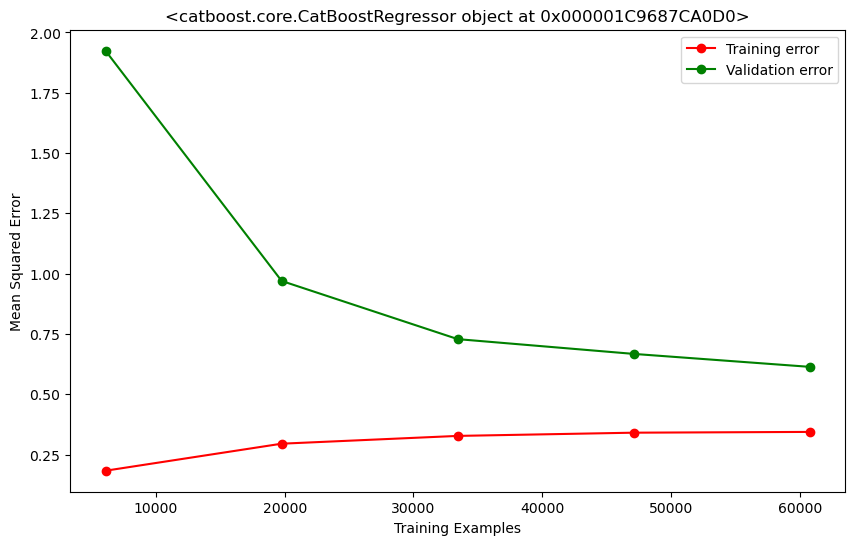

In [24]:
# Define the models and their parameter distributions
models = {
    'LightGBM': (LGBMRegressor(), {
        'n_estimators': randint(100, 500),
        'learning_rate': uniform(0.001, 0.1),
        'max_depth': randint(3, 10),
        'num_leaves': [31, 63, 127]  

    }),
    'CatBoost': (CatBoostRegressor(), {
        'n_estimators': randint(100, 500),
        'learning_rate': uniform(0.001, 0.1),
        'max_depth': randint(3, 10)  

    })
}

# Define a function to plot learning curves
def plot_learning_curves(model, X_train_pca, y_train):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train_pca, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5, scoring='neg_mean_squared_error'
    )
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation error')
    plt.xlabel('Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.title(model)
    plt.legend()
    plt.show()

# Perform model tuning and evaluation
results = []
lc_results = []

for model_name, (model, param_dist) in models.items():
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, refit=True)
    random_search.fit(X_train_pca, y_train)

    best_model = random_search.best_estimator_
    best_model.fit(X_train_pca, y_train)

    y_pred = best_model.predict(X_valid_pca)
    mse = mean_squared_error(y_valid, y_pred)
    r2 = r2_score(y_valid, y_pred)

    result = {
        'Model': model_name,
        'Best Parameters': random_search.best_params_,
        'Best Negative MSE': random_search.best_score_,
        'Test MSE': mse,
        'R-squared': r2
    }
    results.append(result)

    # Calculate learning curve results
    train_sizes, train_scores, test_scores = learning_curve(
        best_model, X_train_pca, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=3, scoring='neg_mean_squared_error'
    )
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    
    # Append learning curve results
    lc_result = {
        'Model': model_name,
        'Train Sizes': train_sizes,
        'Train MSE': train_scores_mean,
        'Validation MSE': test_scores_mean
    }
    lc_results.append(lc_result)

    # Plot learning curve for the best model
    plot_learning_curves(best_model, X_train_pca, y_train)

# Create DataFrames for results and learning curve results
results_df = pd.DataFrame(results)
lc_results_df = pd.DataFrame(lc_results)


In [25]:
results_df

,Model,Best Parameters,Best Negative MSE,Test MSE,R-squared
0,LightGBM,"{'learning_rate': 0.0834780701215233, 'max_dep...",-0.70,0.58,0.99
1,CatBoost,"{'learning_rate': 0.0805547481397802, 'max_dep...",-0.61,0.50,0.99


In [26]:
lc_results_df

,Model,Train Sizes,Train MSE,Validation MSE
0,LightGBM,"[5066, 16466, 27866, 39266, 50666]","[0.1179407512986903, 0.2568974224867398, 0.317...","[2.6601410991602443, 1.2560400321004759, 0.940..."
1,CatBoost,"[5066, 16466, 27866, 39266, 50666]","[0.1643305943180353, 0.2833999270530209, 0.317...","[2.237084941730714, 1.0805671721432928, 0.8028..."


In [27]:
#mse LightGBM
lc_results_df["Validation MSE"][0]

array([2.6601411 , 1.25604003, 0.94053087, 0.82911143, 0.76210959])

In [28]:
#mrse LightGBM
np.sqrt(lc_results_df["Validation MSE"][0])

array([1.6309939 , 1.12073192, 0.96980971, 0.91055556, 0.87298888])

In [29]:
#mse CatBoost
lc_results_df["Validation MSE"][1]

array([2.23708494, 1.08056717, 0.80280074, 0.72198843, 0.64288996])

In [30]:
#mrse CatBoost
np.sqrt(lc_results_df["Validation MSE"][1])

array([1.49568879, 1.03950333, 0.89599148, 0.84969902, 0.80180419])

# summary

After carefully analyzing the data in this notebook, I found that using the StandardScaler preprocessing technique consistently gives better results. Thus, I've decided to make StandardScaler a crucial method to be utilized for my data preprocessing.

I also explored Principal Component Analysis (PCA), finding that the optimal range for the number of principal components is between 20 and 23 which had driven me to chose 22 principal components (the most effective number of this range). 

In building and evaluating the used models, I tried various techniques, starting from a linear regression and progressing to more complex algorithms such as random forest, adaboost, and catboost. From all of these models, the catboost has performed in an exceptional manner with the least error among the previous mentioned models.

For optimizing heart rate prediction, I experimented with two regression techniques: Polynomial Regression and Linear Regression: For polynomial regression, I tested different degrees to capture complex relationships and It worked well with  providing flexibility in modeling intricate patterns. Regarding linear regression, I used it after the polynomial regression as a simpler model with retained benefits but was easier to interpret.

By combining these techniques, I achieved accurate heart rate predictions while taking into consideration to avoid the overfitting. Moreover, this approach balances accuracy and simplicity, making it effective for heart rate prediction. 